
This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


The case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.



##### 1. 'application_data.csv' 
It contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

##### 2. 'previous_application.csv'
It contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

##### 3. 'columns_description.csv' 
It is data dictionary which describes the meaning of the variables.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools
import os 

## Importing Data

In [3]:
application_data = pd.read_csv("/Users/nehasheth/Desktop/Sem 1/Data, Stats /Loan Default Prediction/Code/data/application_data.csv")
previous_application = pd.read_csv("/Users/nehasheth/Desktop/Sem 1/Data, Stats /Loan Default Prediction/Code/data/previous_application.csv")
columns_description = pd.read_csv("/Users/nehasheth/Desktop/Sem 1/Data, Stats /Loan Default Prediction/Code/data/columns_description.csv",skiprows=1)

## Data Dimensions

In [4]:
print ("application_data     :",application_data.shape)
print ("previous_application :",previous_application.shape)
print ("columns_description  :",columns_description.shape)

application_data     : (307511, 122)
previous_application : (1670214, 37)
columns_description  : (159, 5)


## First Few rows of Data

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display("application_data")
display(application_data.head(3))

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

In [6]:
display("previous_application ")
display(previous_application.head(3))

'previous_application '

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0


## Term Dictionary 

In [7]:
display("columns_description")
pd.set_option('display.max_colwidth', -1)
columns_description=columns_description.drop(['1'],axis=1)
display(columns_description)

'columns_description'

application_data                    SK_ID_CURR  \
0    application_data          TARGET                         
1    application_data          NAME_CONTRACT_TYPE             
2    application_data          CODE_GENDER                    
3    application_data          FLAG_OWN_CAR                   
4    application_data          FLAG_OWN_REALTY                
5    application_data          CNT_CHILDREN                   
6    application_data          AMT_INCOME_TOTAL               
7    application_data          AMT_CREDIT                     
8    application_data          AMT_ANNUITY                    
9    application_data          AMT_GOODS_PRICE                
10   application_data          NAME_TYPE_SUITE                
11   application_data          NAME_INCOME_TYPE               
12   application_data          NAME_EDUCATION_TYPE            
13   application_data          NAME_FAMILY_STATUS             
14   application_data          NAME_HOUSING_TYPE              
15   application_data          REGION_POPULATION_RELATIVE     
16   application_data          DAYS_BIRTH                     
17   application_data          DAYS_EMPLOYED                  
18   application_data          DAYS_REGISTRATION              
19   application_data          DAYS_ID_PUBLISH                
20   application_data          OWN_CAR_AGE                    
21   application_data          FLAG_MOBIL                     
22   application_data          FLAG_EMP_PHONE                 
23   application_data          FLAG_WORK_PHONE                
24   application_data          FLAG_CONT_MOBILE               
25   application_data          FLAG_PHONE                     
26   application_data          FLAG_EMAIL                     
27   application_data          OCCUPATION_TYPE                
28   application_data          CNT_FAM_MEMBERS                
29   application_data          REGION_RATING_CLIENT           
30   application_data          REGION_RATING_CLIENT_W_CITY    
31   application_data          WEEKDAY_APPR_PROCESS_START     
32   application_data          HOUR_APPR_PROCESS_START        
33   application_data          REG_REGION_NOT_LIVE_REGION     
34   application_data          REG_REGION_NOT_WORK_REGION     
35   application_data          LIVE_REGION_NOT_WORK_REGION    
36   application_data          REG_CITY_NOT_LIVE_CITY         
37   application_data          REG_CITY_NOT_WORK_CITY         
38   application_data          LIVE_CITY_NOT_WORK_CITY        
39   application_data          ORGANIZATION_TYPE              
40   application_data          EXT_SOURCE_1                   
41   application_data          EXT_SOURCE_2                   
42   application_data          EXT_SOURCE_3                   
43   application_data          APARTMENTS_AVG                 
44   application_data          BASEMENTAREA_AVG               
45   application_data          YEARS_BEGINEXPLUATATION_AVG    
46   application_data          YEARS_BUILD_AVG                
47   application_data          COMMONAREA_AVG                 
48   application_data          ELEVATORS_AVG                  
49   application_data          ENTRANCES_AVG                  
50   application_data          FLOORSMAX_AVG                  
51   application_data          FLOORSMIN_AVG                  
52   application_data          LANDAREA_AVG                   
53   application_data          LIVINGAPARTMENTS_AVG           
54   application_data          LIVINGAREA_AVG                 
55   application_data          NONLIVINGAPARTMENTS_AVG        
56   application_data          NONLIVINGAREA_AVG              
57   application_data          APARTMENTS_MODE                
58   application_data          BASEMENTAREA_MODE              
59   application_data          YEARS_BEGINEXPLUATATION_MODE   
60   application_data          YEARS_BUILD_MODE               
61   application_data          COMMONAREA_MODE                
62   application_data          ELEVATORS_MOD

## Percentage of Missing values in previous_application

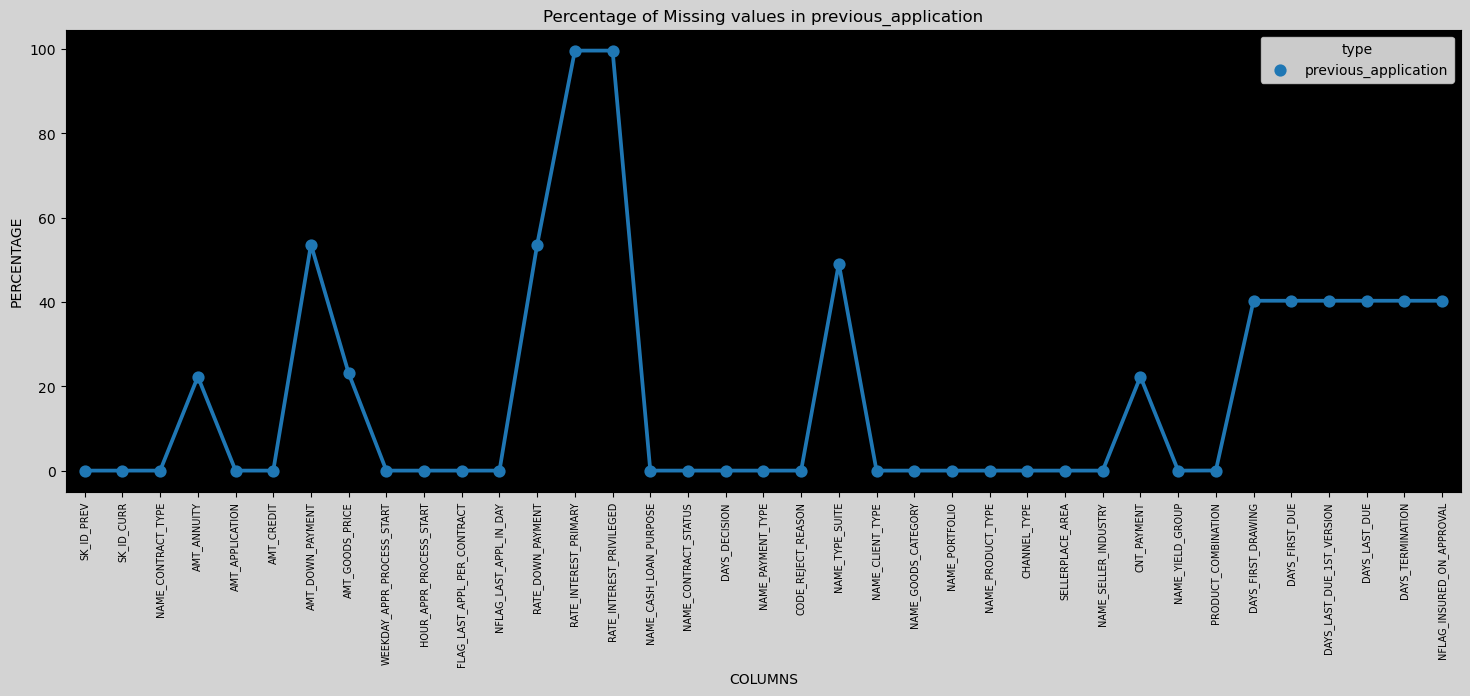

In [8]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [9]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                     0.00 
SK_ID_CURR                     0.00 
NAME_CONTRACT_TYPE             0.00 
AMT_ANNUITY                    22.29
AMT_APPLICATION                0.00 
AMT_CREDIT                     0.00 
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START     0.00 
HOUR_APPR_PROCESS_START        0.00 
FLAG_LAST_APPL_PER_CONTRACT    0.00 
NFLAG_LAST_APPL_IN_DAY         0.00 
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         0.00 
NAME_CONTRACT_STATUS           0.00 
DAYS_DECISION                  0.00 
NAME_PAYMENT_TYPE              0.00 
CODE_REJECT_REASON             0.00 
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE               0.00 
NAME_GOODS_CATEGORY            0.00 
NAME_PORTFOLIO                 0.00 
NAME_PRODUCT_TYPE              0.00 
CHANNEL_TYPE                   0.00 
SELLERPLACE_AREA               0.00 
N

### Removing columns with missing values more than 50%

#### key point
As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [10]:
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

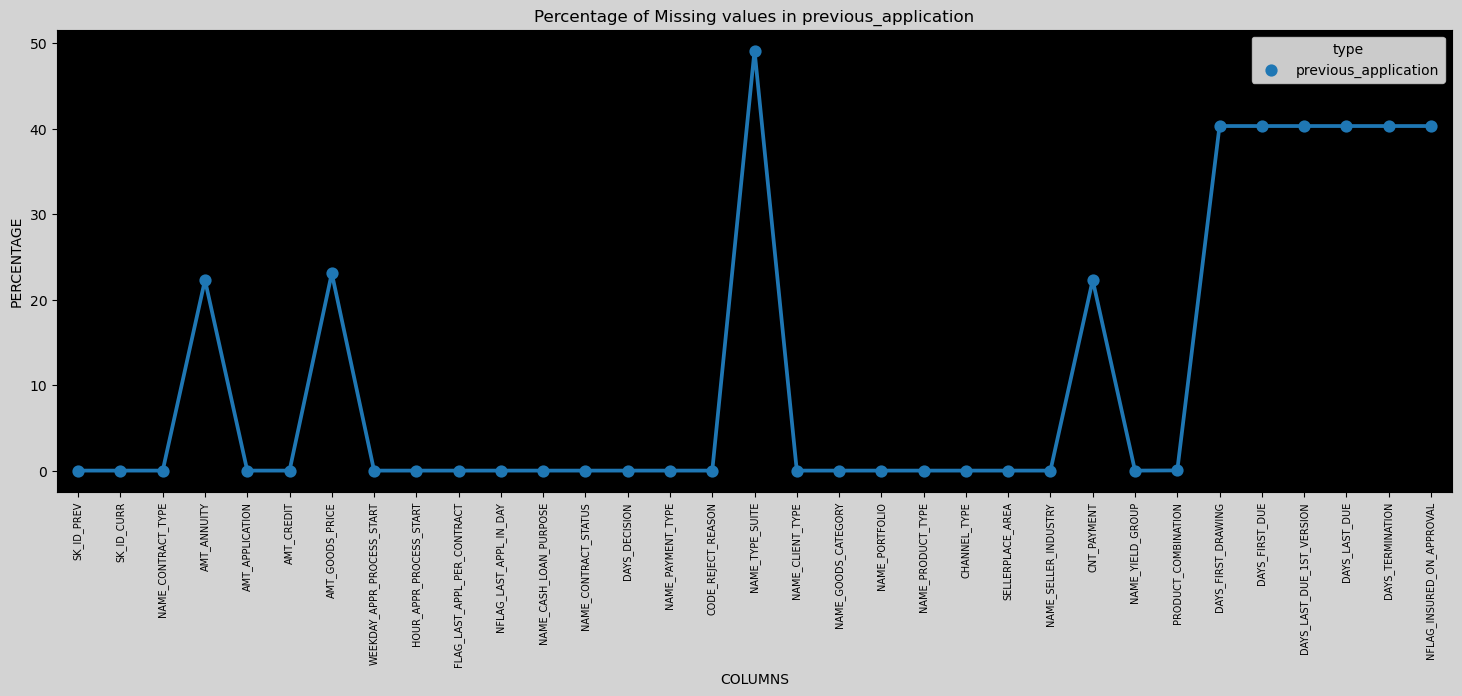

In [11]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [12]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                     0.00 
SK_ID_CURR                     0.00 
NAME_CONTRACT_TYPE             0.00 
AMT_ANNUITY                    22.29
AMT_APPLICATION                0.00 
AMT_CREDIT                     0.00 
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START     0.00 
HOUR_APPR_PROCESS_START        0.00 
FLAG_LAST_APPL_PER_CONTRACT    0.00 
NFLAG_LAST_APPL_IN_DAY         0.00 
NAME_CASH_LOAN_PURPOSE         0.00 
NAME_CONTRACT_STATUS           0.00 
DAYS_DECISION                  0.00 
NAME_PAYMENT_TYPE              0.00 
CODE_REJECT_REASON             0.00 
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE               0.00 
NAME_GOODS_CATEGORY            0.00 
NAME_PORTFOLIO                 0.00 
NAME_PRODUCT_TYPE              0.00 
CHANNEL_TYPE                   0.00 
SELLERPLACE_AREA               0.00 
NAME_SELLER_INDUSTRY           0.00 
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP               0.00 
PRODUCT_COMBINATION            0.02 
D

### MISSING values Suggestion

In [13]:
print("AMT_ANNUITY NULL COUNT:" ,previous_application['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY NULL COUNT: 372235


In [14]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

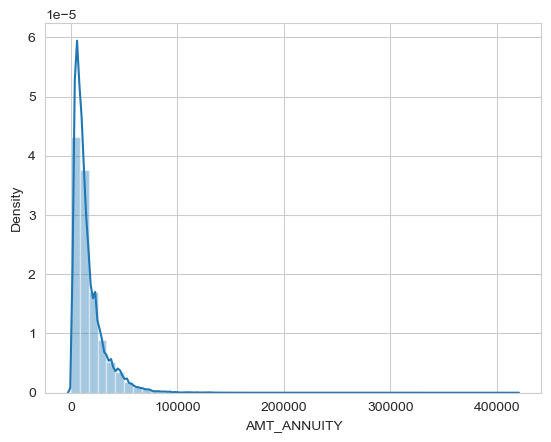

In [15]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_ANNUITY']) 
plt.show()


### Suggestion
We can Fill NA with 15955 i.e. Mean for this field 

In [16]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 385515


In [17]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

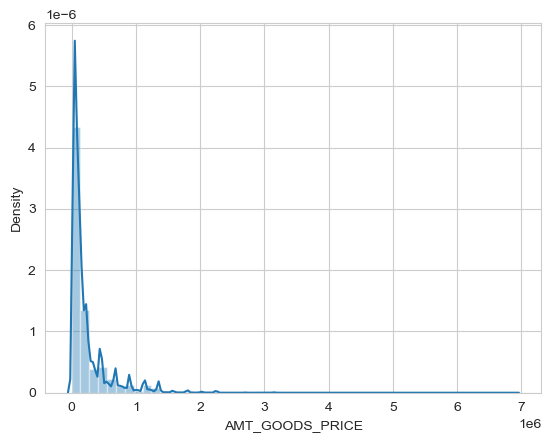

In [18]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_GOODS_PRICE']) 
plt.show()


### Suggestion
We can Fill NA with 112320 i.e. Median for this field 

In [19]:
print("NAME_TYPE_SUITE NULL COUNT:" ,previous_application['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE NULL COUNT: 820405


In [20]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner    67069 
Children           31566 
Other_B            17624 
Other_A            9077  
Group of people    2240  
Name: NAME_TYPE_SUITE, dtype: int64

### Suggestion
We can Fill NA with Unaccompanied  i.e. Mode for this field 

In [21]:
print("CNT_PAYMENT NULL COUNT:" ,previous_application['CNT_PAYMENT'].isnull().sum())

CNT_PAYMENT NULL COUNT: 372230


In [22]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

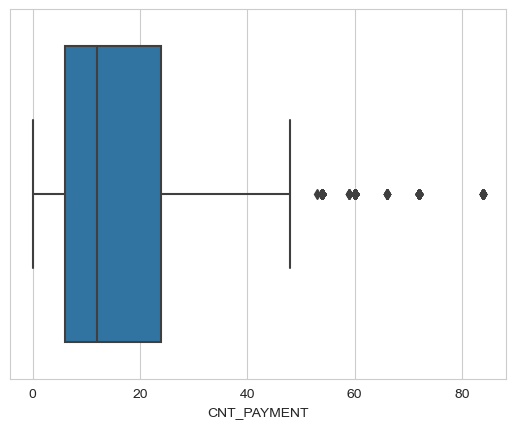

In [23]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['CNT_PAYMENT']) 
plt.show()

### Suggestion
We can Fill NA with 12 i.e. Median for this field 

In [24]:
print("DAYS_FIRST_DRAWING :" ,previous_application['CNT_PAYMENT'].isnull().sum())

DAYS_FIRST_DRAWING : 372230


In [25]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std      88916.115834 
min     -2922.000000  
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

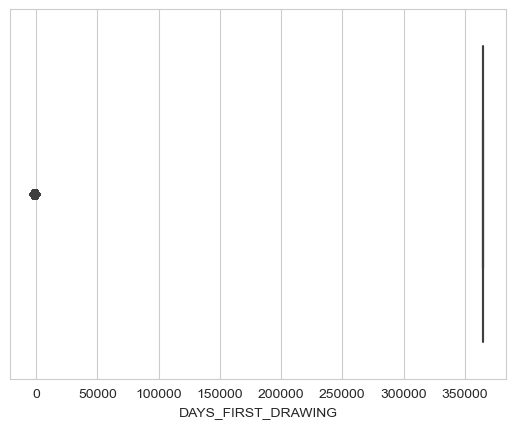

In [26]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DRAWING']) 
plt.show()

### Suggestion
We can Fill NA with 365243 i.e. Median for this field 

In [27]:
print("DAYS_FIRST_DUE :" ,previous_application['DAYS_FIRST_DUE'].isnull().sum())

DAYS_FIRST_DUE : 673065


In [28]:
previous_application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean     13826.269337 
std      72444.869708 
min     -2892.000000  
25%     -1628.000000  
50%     -831.000000   
75%     -411.000000   
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

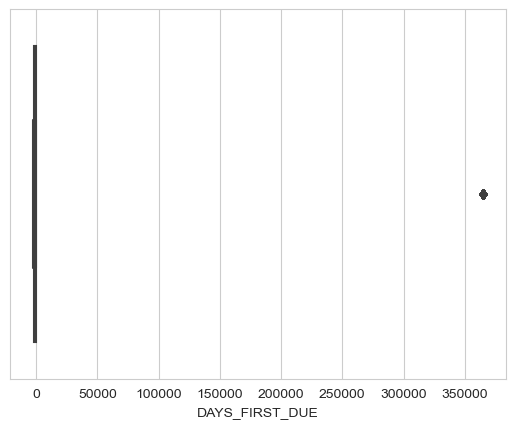

In [29]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DUE']) 
plt.show()

### Suggestion
We can Fill NA with -831 i.e. Median for this field 

In [30]:
print("DAYS_LAST_DUE_1ST_VERSION :" ,previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum())

DAYS_LAST_DUE_1ST_VERSION : 673065


In [31]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean     33767.774054 
std      106857.034789
min     -2801.000000  
25%     -1242.000000  
50%     -361.000000   
75%      129.000000   
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

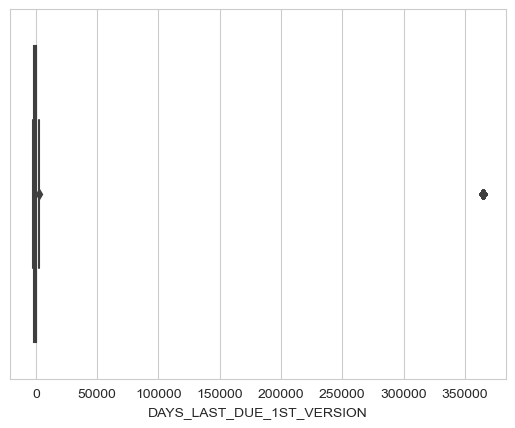

In [32]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE_1ST_VERSION']) 
plt.show()

### Suggestion
We can Fill NA with -361 i.e. Median for this field 

In [33]:
print("DAYS_LAST_DUE:" ,previous_application['DAYS_LAST_DUE'].isnull().sum())

DAYS_LAST_DUE: 673065


In [34]:
previous_application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean     76582.403064 
std      149647.415123
min     -2889.000000  
25%     -1314.000000  
50%     -537.000000   
75%     -74.000000    
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

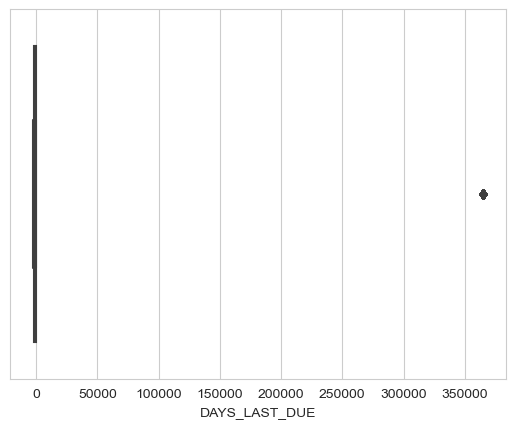

In [35]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE']) 
plt.show()

### Suggestion
We can Fill NA with -537 i.e. Median for this field 

In [36]:
print("DAYS_TERMINATION :" ,previous_application['DAYS_TERMINATION'].isnull().sum())

DAYS_TERMINATION : 673065


In [37]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean     81992.343838 
std      153303.516729
min     -2874.000000  
25%     -1270.000000  
50%     -499.000000   
75%     -44.000000    
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

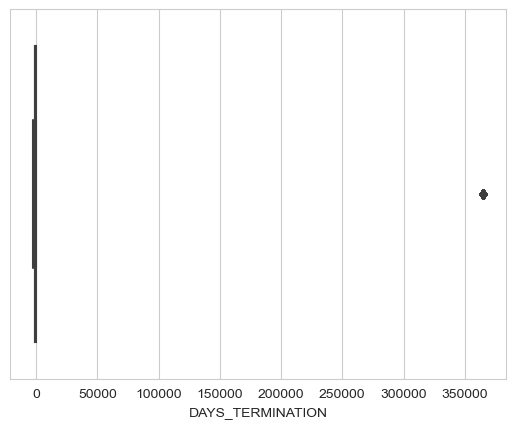

In [38]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_TERMINATION']) 
plt.show()

### Suggestion
We can Fill NA with -499 i.e. Median for this field 

In [39]:
print("NFLAG_INSURED_ON_APPROVAL:" ,previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())

NFLAG_INSURED_ON_APPROVAL: 673065


In [40]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

### Suggestion
We can Fill NA with 0 i.e. Mode for this field 

In [41]:
previous_application.isnull().sum()

SK_ID_PREV                     0     
SK_ID_CURR                     0     
NAME_CONTRACT_TYPE             0     
AMT_ANNUITY                    372235
AMT_APPLICATION                0     
AMT_CREDIT                     1     
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START     0     
HOUR_APPR_PROCESS_START        0     
FLAG_LAST_APPL_PER_CONTRACT    0     
NFLAG_LAST_APPL_IN_DAY         0     
NAME_CASH_LOAN_PURPOSE         0     
NAME_CONTRACT_STATUS           0     
DAYS_DECISION                  0     
NAME_PAYMENT_TYPE              0     
CODE_REJECT_REASON             0     
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE               0     
NAME_GOODS_CATEGORY            0     
NAME_PORTFOLIO                 0     
NAME_PRODUCT_TYPE              0     
CHANNEL_TYPE                   0     
SELLERPLACE_AREA               0     
NAME_SELLER_INDUSTRY           0     
CNT_PAYMENT                    372230
NAME_YIELD_GROUP               0     
PRODUCT_COMB

In [42]:
print("AMT_CREDIT :" ,previous_application['AMT_CREDIT'].isnull().sum())

AMT_CREDIT : 1


In [43]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

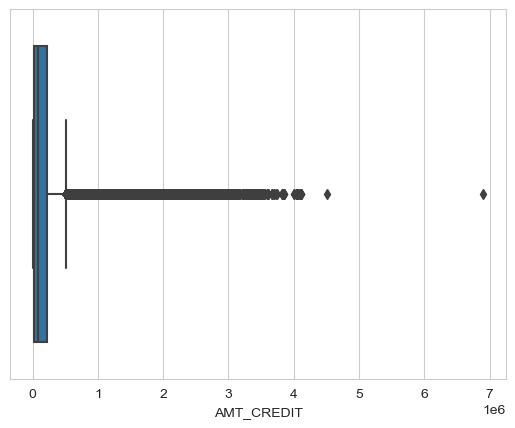

In [44]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['AMT_CREDIT']) 
plt.show()


### Suggestion
We can Fill NA with 80541 i.e. Median for this field 

In [45]:
print("PRODUCT_COMBINATION :" ,previous_application['PRODUCT_COMBINATION'].isnull().sum())

PRODUCT_COMBINATION : 346


In [46]:
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest        98833 
POS household without interest    82908 
Card X-Sell                       80582 
Cash Street: high                 59639 
Cash X-Sell: high                 59301 
Cash Street: middle               34658 
Cash Street: low                  33834 
POS mobile without interest       24082 
POS other with interest           23879 
POS industry without interest     12602 
POS others without interest       2555  
Name: PRODUCT_COMBINATION, dtype: int64

### Suggestion
We can Fill NA with Cash i.e. Mode for this field 

In [47]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Separating numerical and categorical columns from previous_application

In [48]:
obj_dtypes = [i for i in previous_application.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in previous_application.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [49]:
print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])


Categorical Columns 

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [50]:
print(color.BOLD + color.PURPLE + 'Numerical' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Numerical 

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION



## Percentage of Missing values in application_data

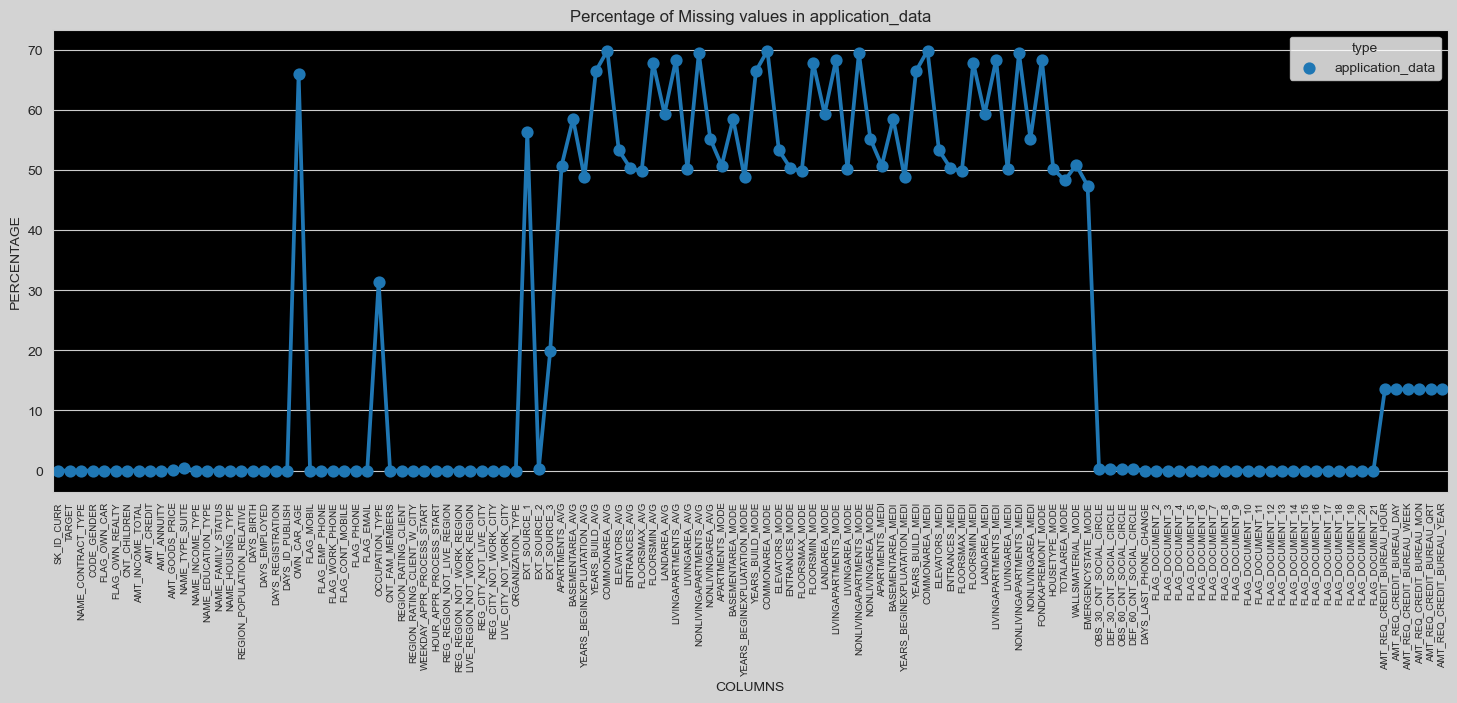

In [51]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [52]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                      0.00 
TARGET                          0.00 
NAME_CONTRACT_TYPE              0.00 
CODE_GENDER                     0.00 
FLAG_OWN_CAR                    0.00 
FLAG_OWN_REALTY                 0.00 
CNT_CHILDREN                    0.00 
AMT_INCOME_TOTAL                0.00 
AMT_CREDIT                      0.00 
AMT_ANNUITY                     0.00 
AMT_GOODS_PRICE                 0.09 
NAME_TYPE_SUITE                 0.42 
NAME_INCOME_TYPE                0.00 
NAME_EDUCATION_TYPE             0.00 
NAME_FAMILY_STATUS              0.00 
NAME_HOUSING_TYPE               0.00 
REGION_POPULATION_RELATIVE      0.00 
DAYS_BIRTH                      0.00 
DAYS_EMPLOYED                   0.00 
DAYS_REGISTRATION               0.00 
DAYS_ID_PUBLISH                 0.00 
OWN_CAR_AGE                     65.99
FLAG_MOBIL                      0.00 
FLAG_EMP_PHONE                  0.00 
FLAG_WORK_PHONE                 0.00 
FLAG_CONT_MOBILE                0.00 
FLAG_PHONE  

### Removing columns with missing values more than 40%

As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [53]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

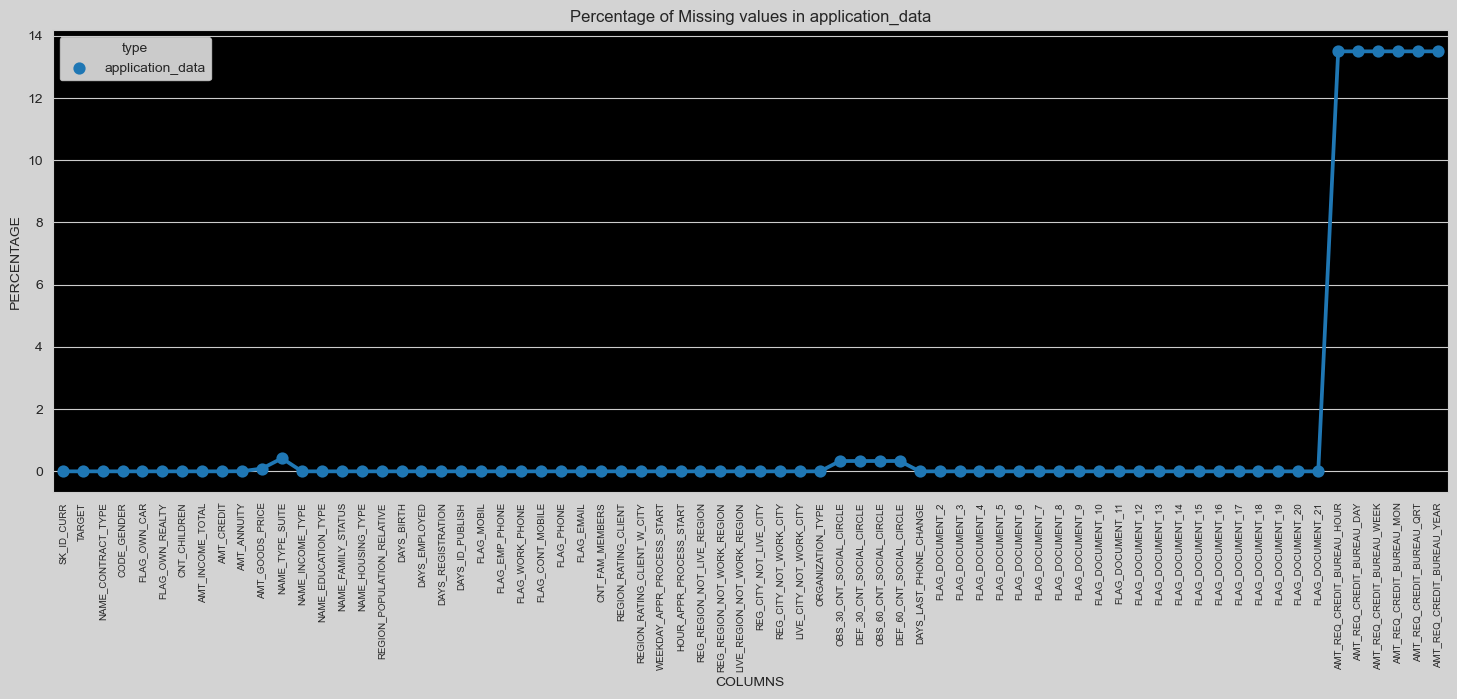

In [54]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [55]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                     0.00 
TARGET                         0.00 
NAME_CONTRACT_TYPE             0.00 
CODE_GENDER                    0.00 
FLAG_OWN_CAR                   0.00 
FLAG_OWN_REALTY                0.00 
CNT_CHILDREN                   0.00 
AMT_INCOME_TOTAL               0.00 
AMT_CREDIT                     0.00 
AMT_ANNUITY                    0.00 
AMT_GOODS_PRICE                0.09 
NAME_TYPE_SUITE                0.42 
NAME_INCOME_TYPE               0.00 
NAME_EDUCATION_TYPE            0.00 
NAME_FAMILY_STATUS             0.00 
NAME_HOUSING_TYPE              0.00 
REGION_POPULATION_RELATIVE     0.00 
DAYS_BIRTH                     0.00 
DAYS_EMPLOYED                  0.00 
DAYS_REGISTRATION              0.00 
DAYS_ID_PUBLISH                0.00 
FLAG_MOBIL                     0.00 
FLAG_EMP_PHONE                 0.00 
FLAG_WORK_PHONE                0.00 
FLAG_CONT_MOBILE               0.00 
FLAG_PHONE                     0.00 
FLAG_EMAIL                     0.00 
C

### MISSING values Suggestion

In [56]:
print("AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 41519


In [57]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean     0.007000     
std      0.110757     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      9.000000     
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [58]:
print("AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT : 41519


In [59]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean     0.006402     
std      0.083849     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      4.000000     
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [60]:
print("AMT_REQ_CREDIT_BUREAU_MON NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_MON NAN COUNT : 41519


In [61]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean     0.267395     
std      0.916002     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      27.000000    
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [62]:
print("AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT : 41519


### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [63]:
print("AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT : 41519


In [64]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean     0.034362     
std      0.204685     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      8.000000     
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [65]:
print("AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT : 41519


In [66]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean     1.899974     
std      1.869295     
min      0.000000     
25%      0.000000     
50%      1.000000     
75%      3.000000     
max      25.000000    
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [67]:
print("DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT : 1021


In [68]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean     0.143421     
std      0.446698     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      34.000000    
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [69]:
print("DEF_30_CNT_SOCIAL_CIRCLE :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_30_CNT_SOCIAL_CIRCLE : 1021


In [70]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean     0.143421     
std      0.446698     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      34.000000    
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [71]:
print("OBS_60_CNT_SOCIAL_CIRCLE :" ,application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

OBS_60_CNT_SOCIAL_CIRCLE : 1021


In [72]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean     1.405292     
std      2.379803     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      2.000000     
max      344.000000   
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [73]:
print("DEF_60_CNT_SOCIAL_CIRCLE :" ,application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_60_CNT_SOCIAL_CIRCLE : 1021


In [74]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean     0.100049     
std      0.362291     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      24.000000    
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [75]:
application_data.isnull().sum()

SK_ID_CURR                     0    
TARGET                         0    
NAME_CONTRACT_TYPE             0    
CODE_GENDER                    0    
FLAG_OWN_CAR                   0    
FLAG_OWN_REALTY                0    
CNT_CHILDREN                   0    
AMT_INCOME_TOTAL               0    
AMT_CREDIT                     0    
AMT_ANNUITY                    12   
AMT_GOODS_PRICE                278  
NAME_TYPE_SUITE                1292 
NAME_INCOME_TYPE               0    
NAME_EDUCATION_TYPE            0    
NAME_FAMILY_STATUS             0    
NAME_HOUSING_TYPE              0    
REGION_POPULATION_RELATIVE     0    
DAYS_BIRTH                     0    
DAYS_EMPLOYED                  0    
DAYS_REGISTRATION              0    
DAYS_ID_PUBLISH                0    
FLAG_MOBIL                     0    
FLAG_EMP_PHONE                 0    
FLAG_WORK_PHONE                0    
FLAG_CONT_MOBILE               0    
FLAG_PHONE                     0    
FLAG_EMAIL                     0    
C

In [76]:
print("AMT_ANNUITY  :" ,application_data['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY  : 12


In [77]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean     27108.573909 
std      14493.737315 
min      1615.500000  
25%      16524.000000 
50%      24903.000000 
75%      34596.000000 
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

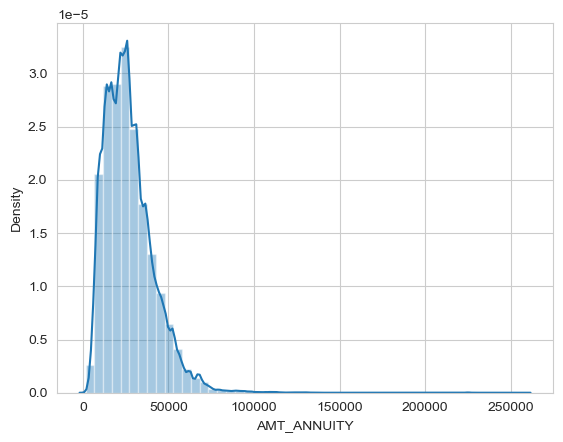

In [78]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_ANNUITY']) 
plt.show()

### Suggestion
We can Fill NA with 0 i.e. Mean for this field as it's right skewed graph

In [79]:
print("AMT_GOODS_PRICE   :" ,application_data['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE   : 278


In [80]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

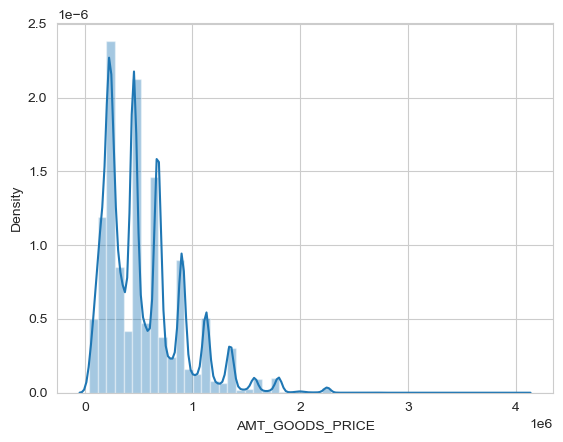

In [81]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_GOODS_PRICE']) 
plt.show()

### Suggestion
We can Fill NA with 0 i.e. Mean for this field as it's right skewed graph

In [82]:
print("NAME_TYPE_SUITE :" ,application_data['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE : 1292


In [83]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family             40149 
Spouse, partner    11370 
Children           3267  
Other_B            1770  
Other_A            866   
Group of people    271   
Name: NAME_TYPE_SUITE, dtype: int64

### Suggestion
We can Fill NA with "Unaccompanied" i.e. Mode for this field 

In [84]:
print("CNT_FAM_MEMBERS :" ,application_data['CNT_FAM_MEMBERS'].isnull().sum())

CNT_FAM_MEMBERS : 2


In [85]:
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean     2.152665     
std      0.910682     
min      1.000000     
25%      2.000000     
50%      2.000000     
75%      3.000000     
max      20.000000    
Name: CNT_FAM_MEMBERS, dtype: float64

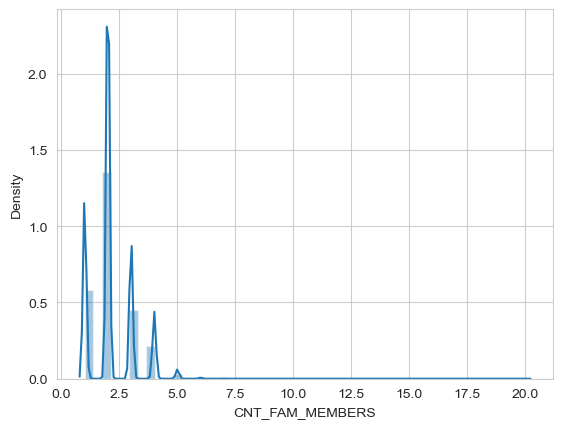

In [86]:
sns.set_style('whitegrid') 
sns.distplot(application_data['CNT_FAM_MEMBERS']) 
plt.show()

### Suggestion
We can Fill NA with 2 i.e. Median for this field, Mean is not be used as this field needs to be Whole number

In [87]:
print("DAYS_LAST_PHONE_CHANGE :" ,application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

DAYS_LAST_PHONE_CHANGE : 1


In [88]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean    -962.858788   
std      826.808487   
min     -4292.000000  
25%     -1570.000000  
50%     -757.000000   
75%     -274.000000   
max      0.000000     
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [89]:
import statistics 
statistics.mode(application_data['DAYS_LAST_PHONE_CHANGE'])

0.0

### Suggestion
We can Fill NA with 0 i.e. Mode for this field

## Print the information about the attributes of application_data

In [90]:
print(type(application_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Converting negative values to absolute values


In [91]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])



In [92]:
display("application_data")
display(application_data.head())

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0  351000.0         Unaccompanied   Working           
1  1129500.0        Family          State servant     
2  135000.0         Unaccompanied   Working           
3  297000.0         Unaccompanied   Working           
4  513000.0         Unaccompanied   Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Civil marriage        House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.010032                    19046      -225           -4260.0              
3  0.008019                    19005      -3039          -9833.0              
4  0.028663                    19932      -3038          -4311.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  2531             1           1               1                 
3  2437             1           1               0                 
4  3458             1           1               0                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           1.0               
3  1                 0           0           2.0               
4  1                 0           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  2                     2                             
3  2                     2                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0  WEDNESDAY                  10                        
1  MONDAY                     11                        
2  MONDAY                     9                         
3  WEDNESDAY                  17                        
4  THURSDAY                   11                        

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                            

   LIVE_REGION_

### Separating numerical and categorical  in application_data


In [93]:
obj_dtypes = [i for i in application_data.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in application_data.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']] 

In [94]:
print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x]) 

Categorical Columns 

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [95]:
print(color.BOLD + color.PURPLE +"Numerical Columns" + color.END, "\n")
for x in range(len(num_dtypes)): 
    print(num_dtypes[x])

Numerical Columns 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU


## Imbalance percentage

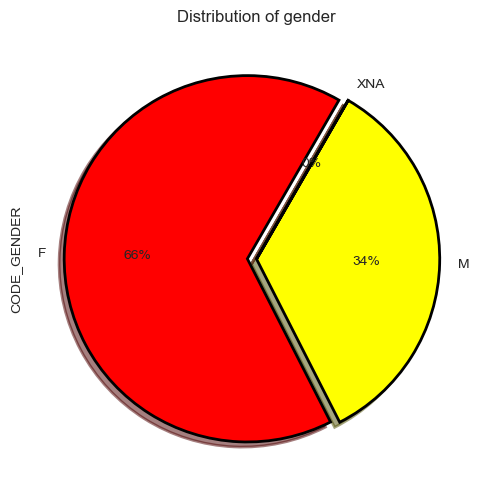

In [96]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

### Point to infer from the graph
It's non balanced data


## Distribution of Target variable

TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)


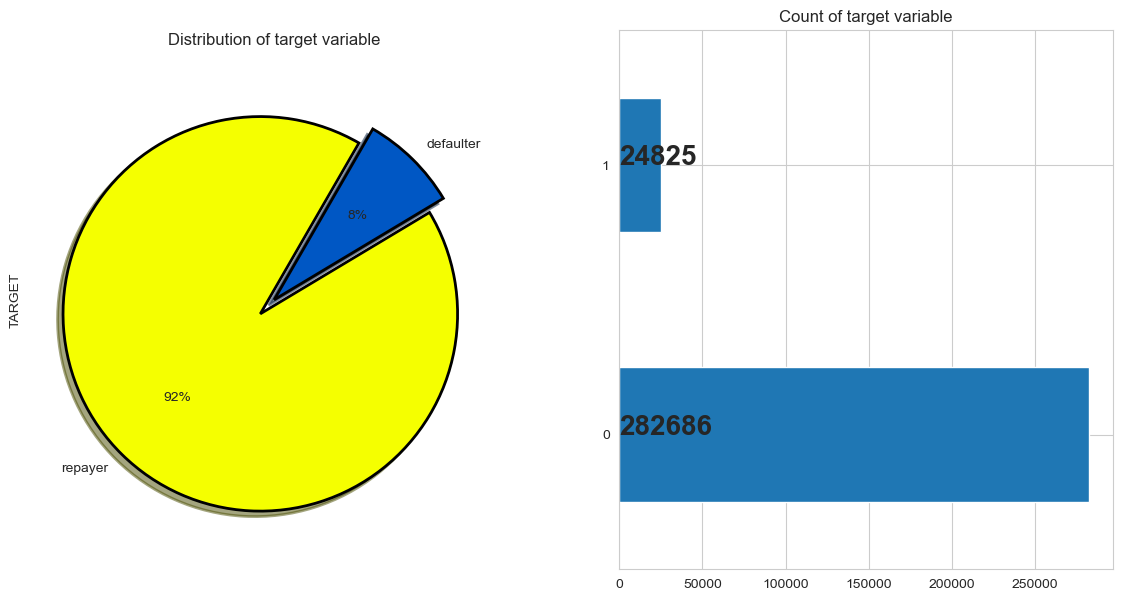

In [97]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

### Point to infer from the graph
8% out of total client population have difficulties in repaying loans.

### Concatenating application_data and previous_application

In [98]:
application_data_x = application_data[[x for x in application_data.columns if x not in ["TARGET"]]]
previous_application_x = previous_application[[x for x in previous_application.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0) 

## Distribution in Contract types in application_data 

NAME_CONTRACT_TYPE : Identification if loan is cash , consumer or revolving


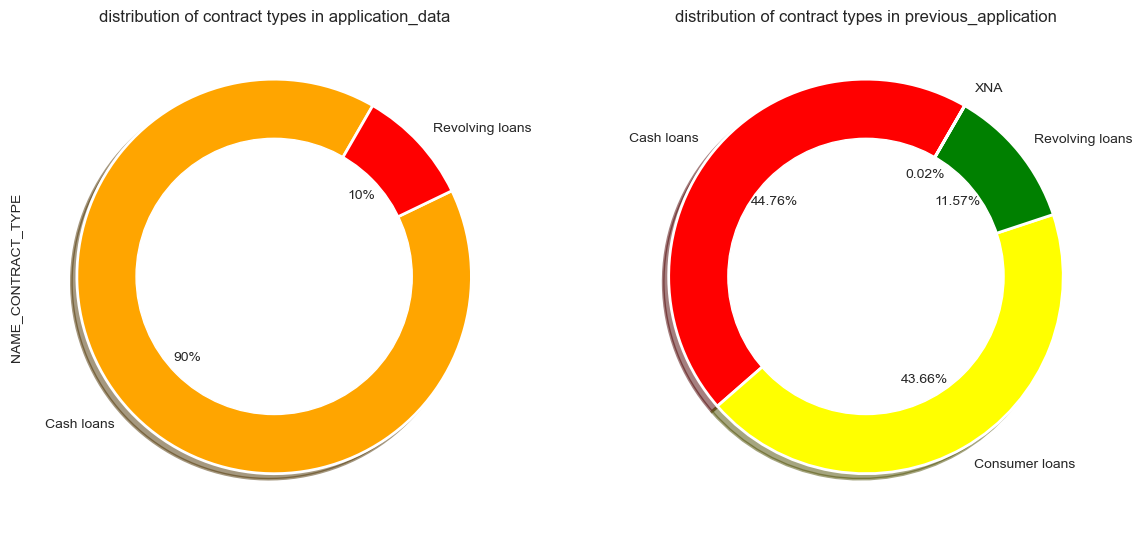

In [99]:
plt.figure(figsize=(14,7))
plt.subplot(121)
data[data["type"] == "application_data"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in application_data")

plt.subplot(122)
data[data["type"] == "previous_application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",colors = ["red","yellow","green",'BLACK'],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

plt.show()

### Point to infer from the graph

The percentage of revolving loans and cash loans are 10% & 90%.

## Gender Distribution in application_data 

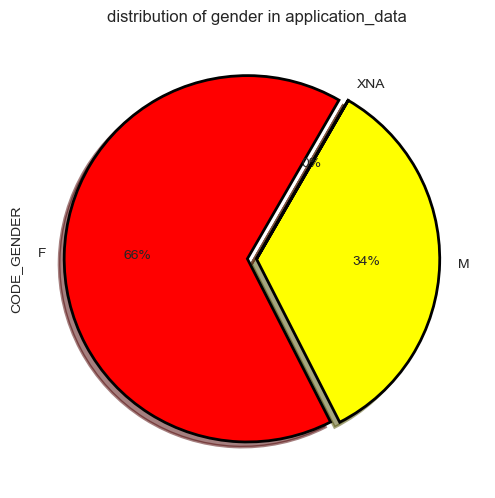

In [100]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
data[data["type"] == "application_data"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of gender in application_data")
plt.show()

### Point to infer from the graph

Female : 66% 

Male : 34% 

## Distribution of Contract type by gender

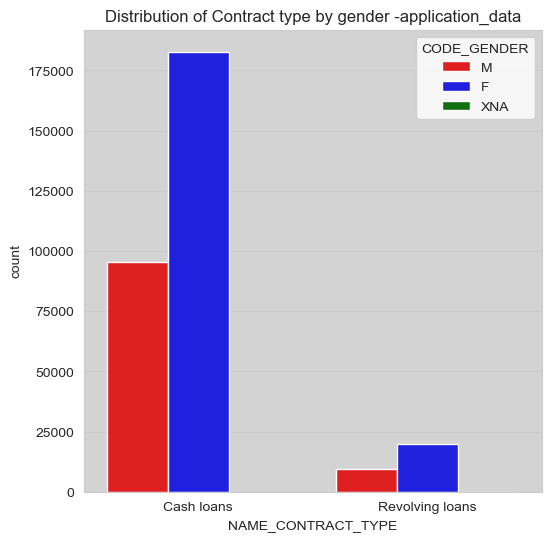

In [101]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=data[data["type"] == "application_data"],palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender -application_data")


plt.show()


### Point to infer from the graph

Cash loans is always prefered over Revolving loans by both genders

## Distribution of client owning a car and by gender

FLAG_OWN_CAR Flag if the client owns a car .

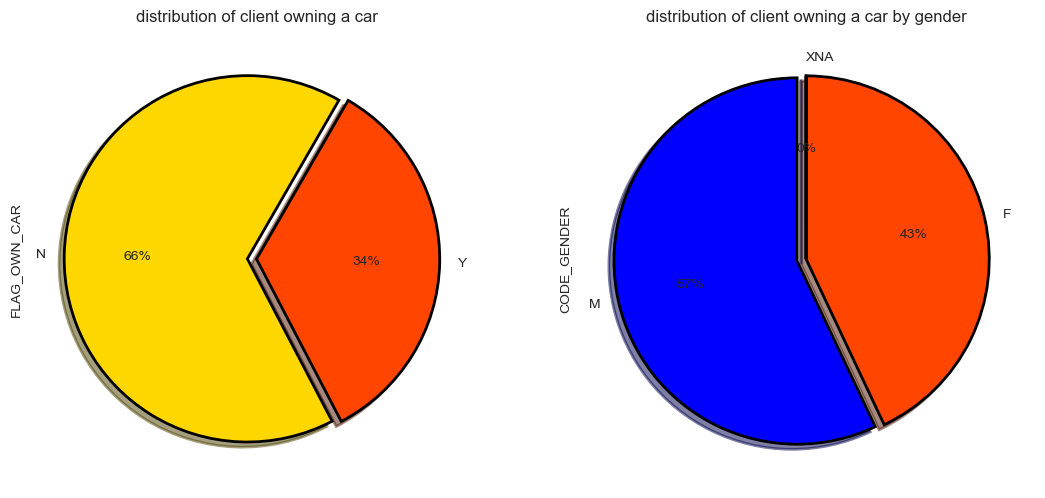

In [102]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

### Point to infer from the graph

SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car .

SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.

## Distribution of client owning a house or flat and by gender

FLAG_OWN_REALTY - Flag if client owns a house or flat

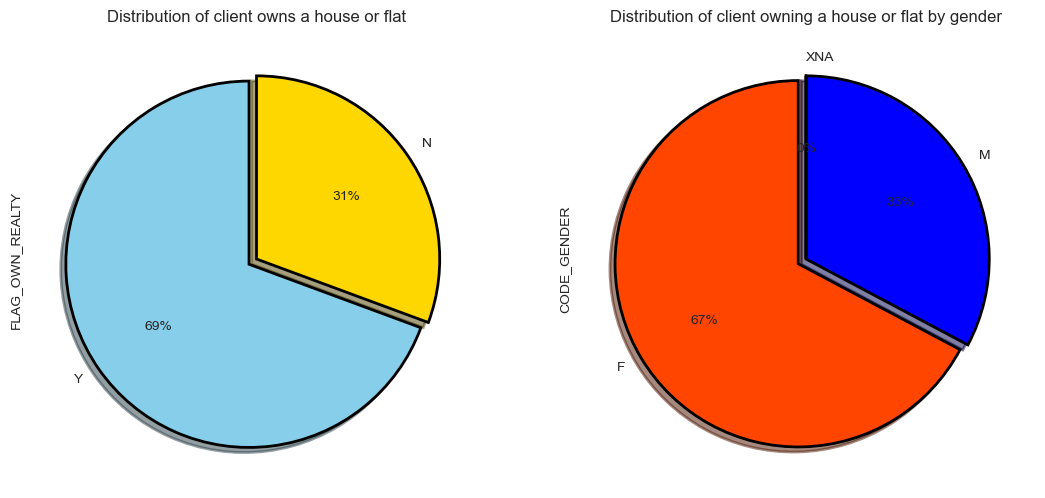

In [103]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

### Point to infer from the graph

SUBPLOT 1 : Distribution of client owning a house or flat . 69% of clients own a flat or house .

SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.

## Distribution of Number of children and family members of client by repayment status.

CNT_CHILDREN - Number of children the client has.

CNT_FAM_MEMBERS - How many family members does client have.

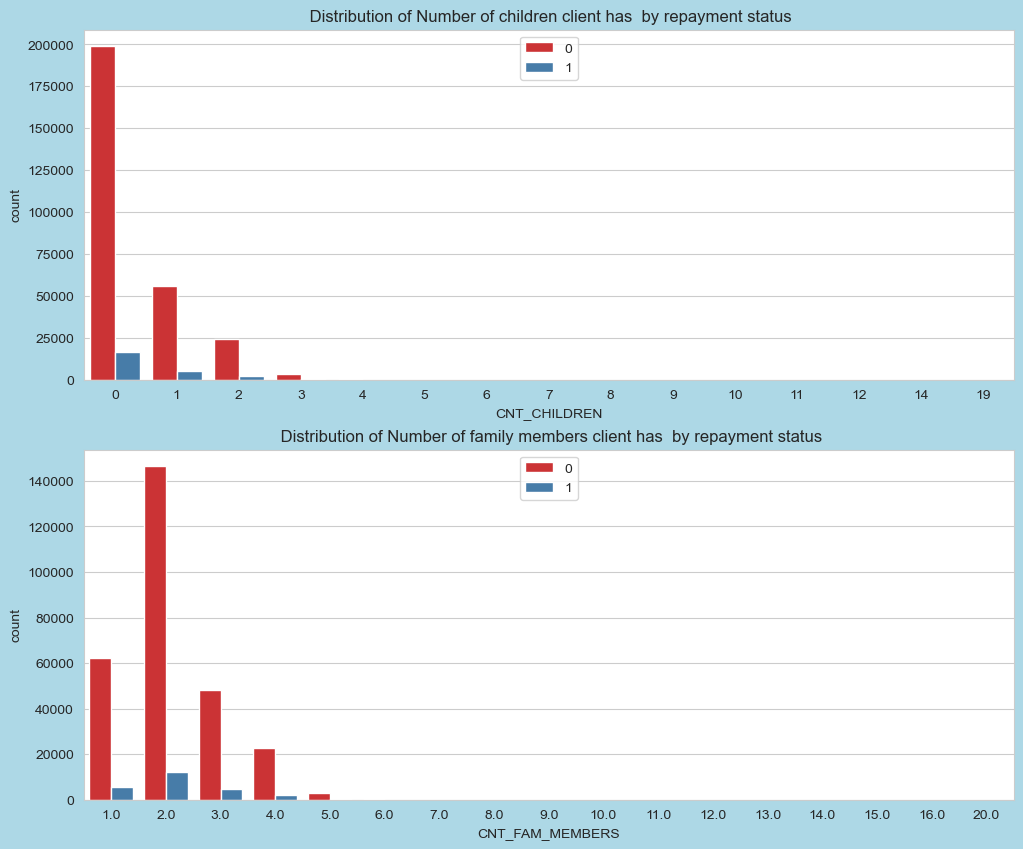

In [104]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(application_data["CNT_CHILDREN"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(application_data["CNT_FAM_MEMBERS"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")


## Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

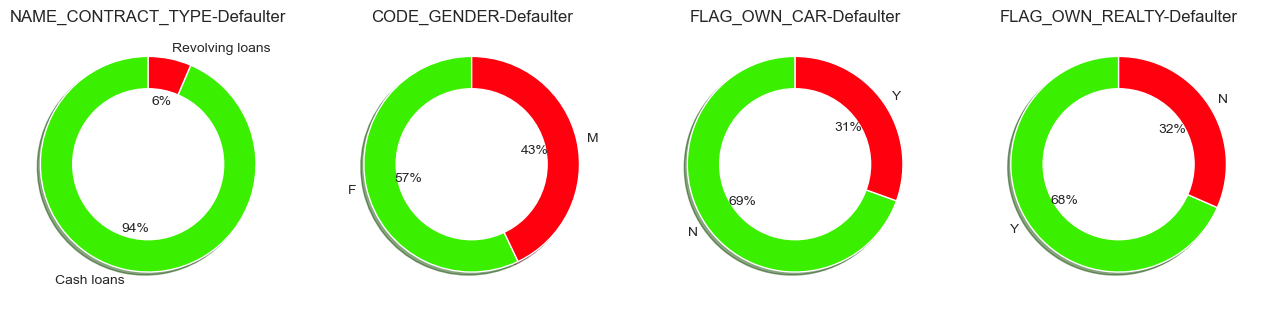

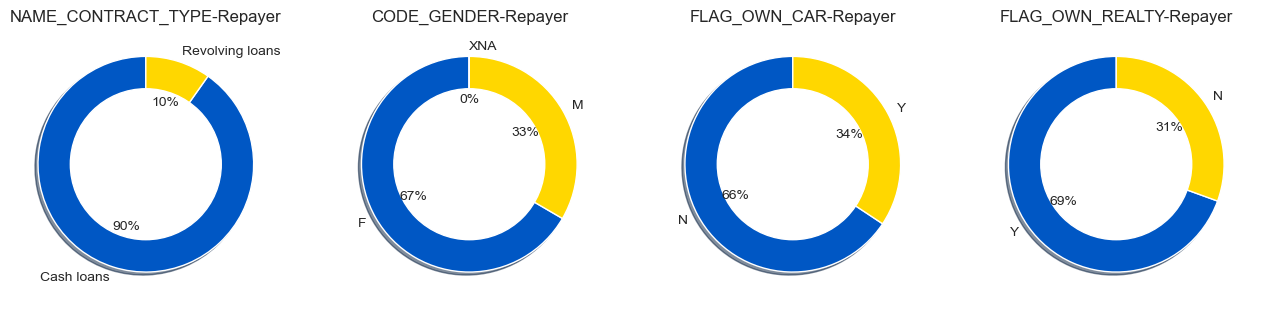

In [105]:
default = application_data[application_data["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = application_data[application_data["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

### Point to infer from the graph

Percentage of males is 10% more in defaults than non defaulters.

Percentage of Cash Loans is 4% more in defaults than Revolving Loans.

### Distribution of amount data

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

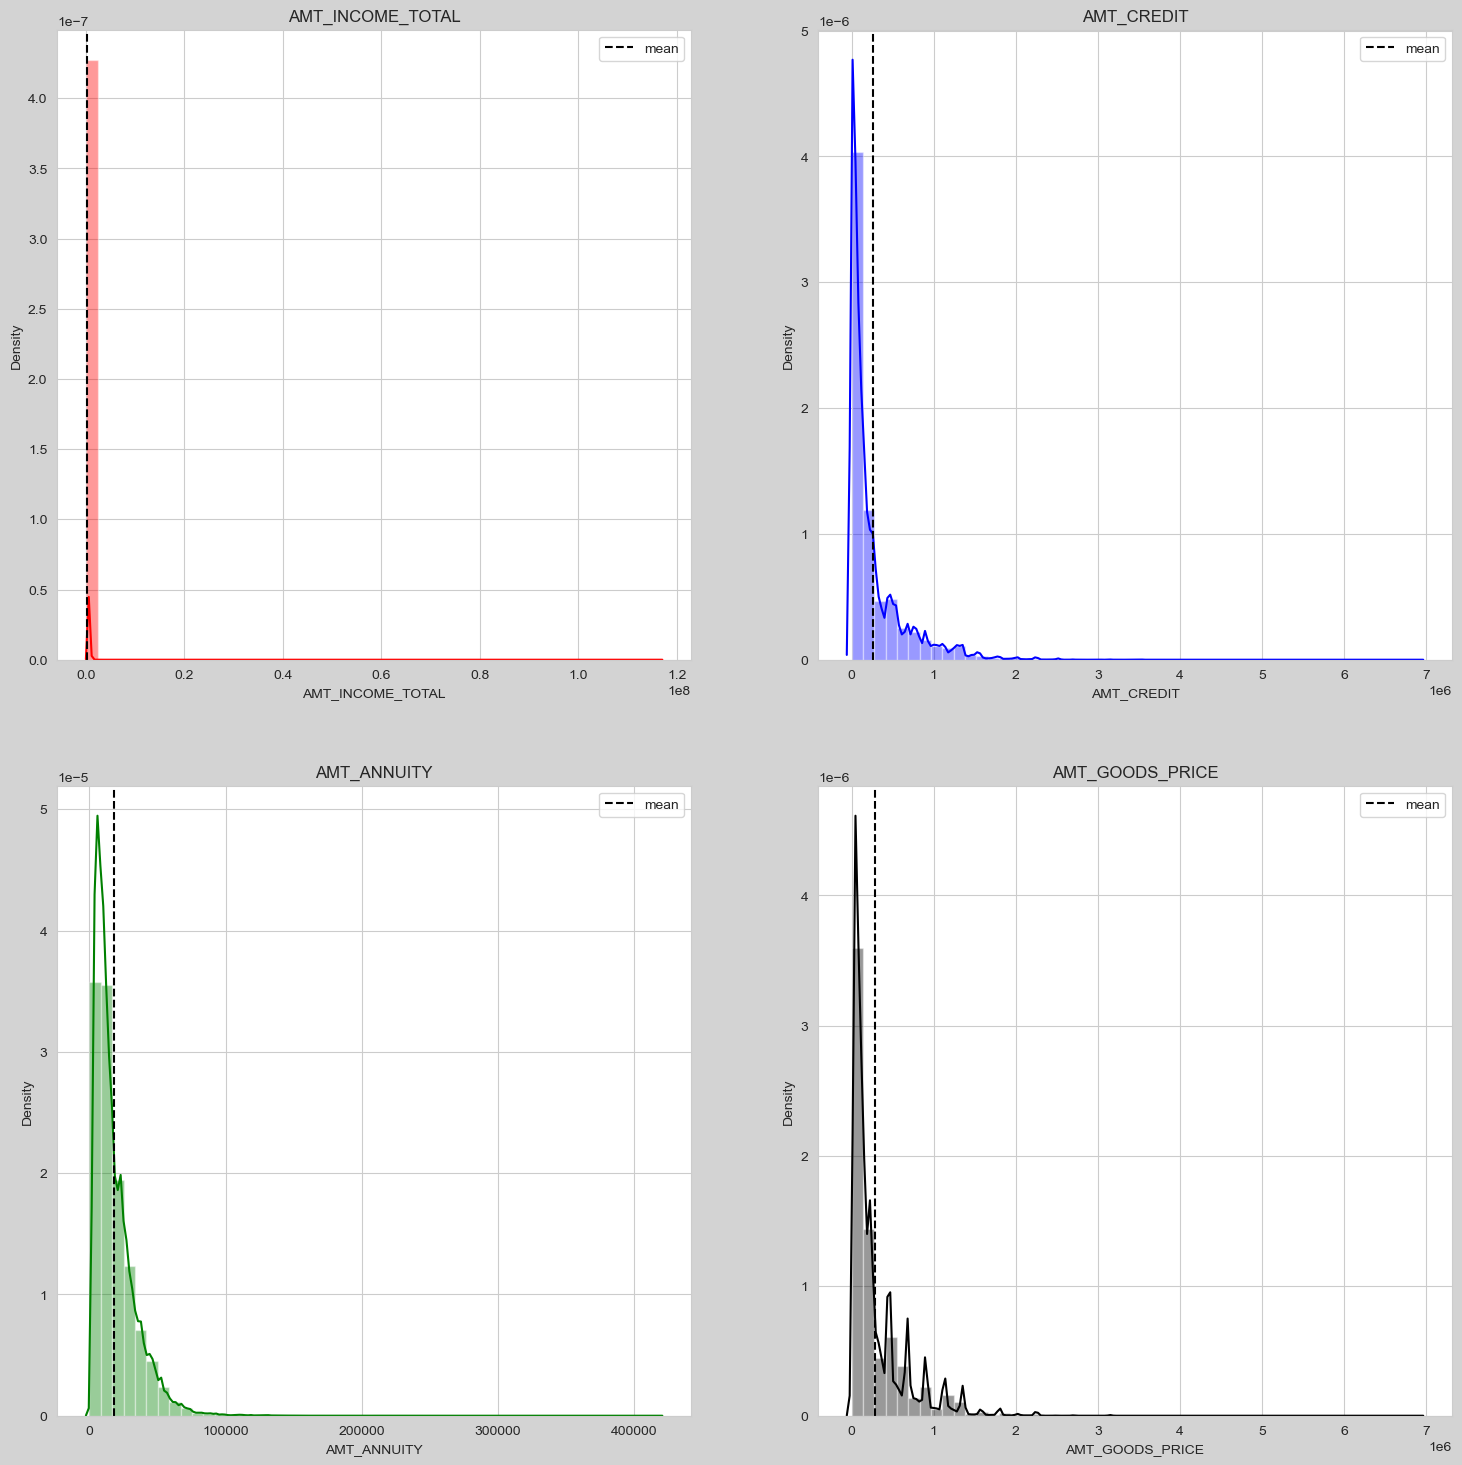

In [106]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(data[data[i].notnull()][i],color=k)
    plt.axvline(data[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)


## Comparing summary statistics between defaulters and non - defaulters for loan amounts.



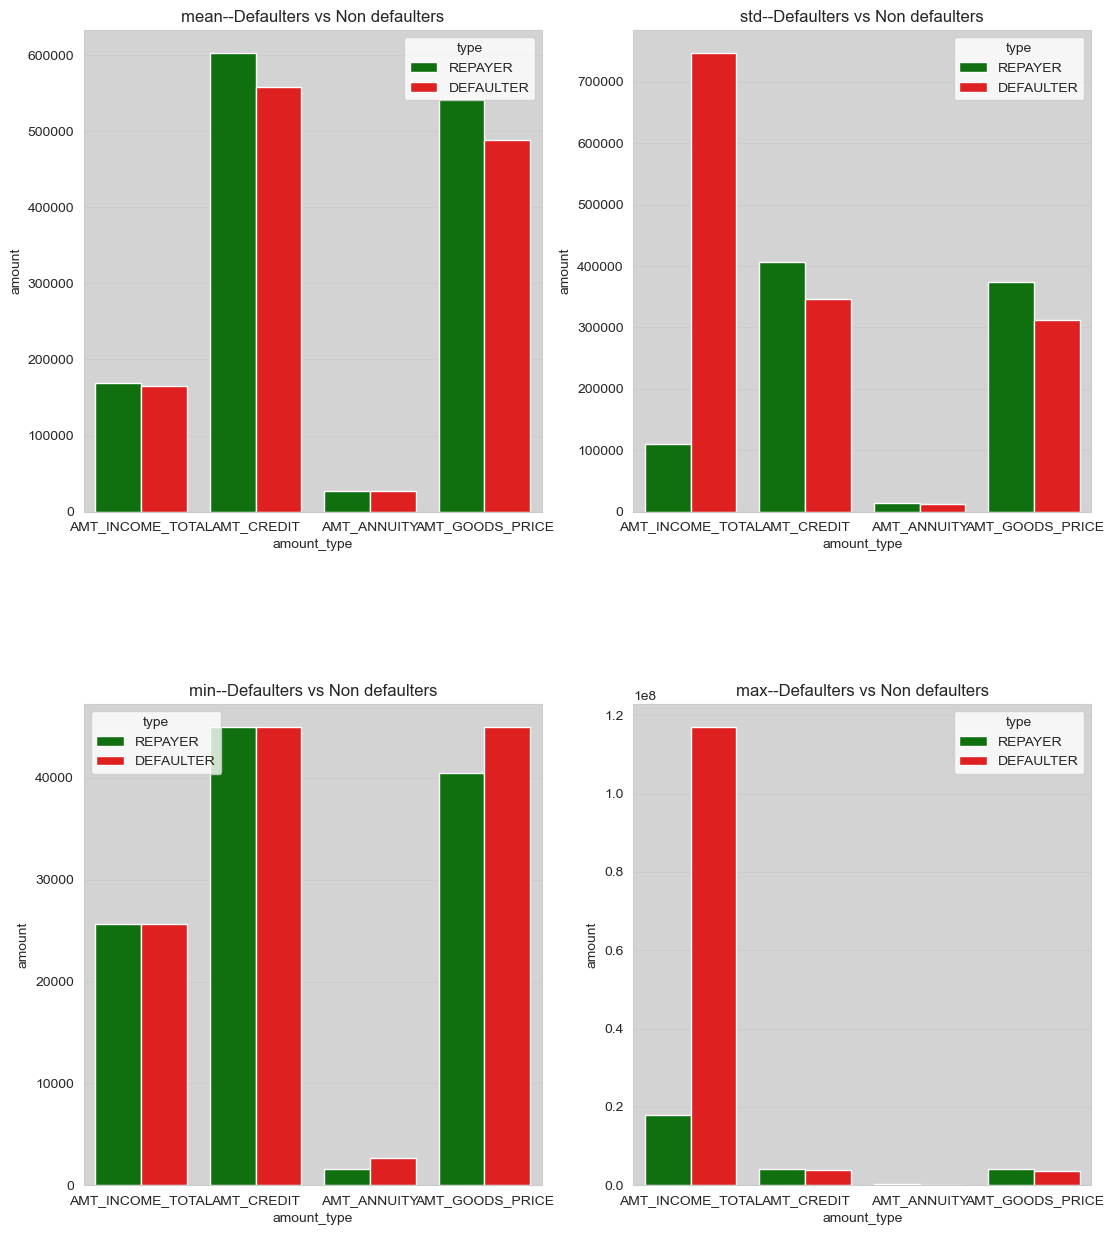

In [107]:
df = application_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")

### Point to infer from the graph

#### Income of client -

1 . Average income of clients who default and who do not are almost same.

2 . Standard deviation in income of client who default is very high compared to who do not default.

3 . Clients who default also has maximum income earnings

#### Credit amount of the loan ,Loan annuity,Amount goods price -

1 . Statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

## Average Income,credit,annuity & goods_price by gender


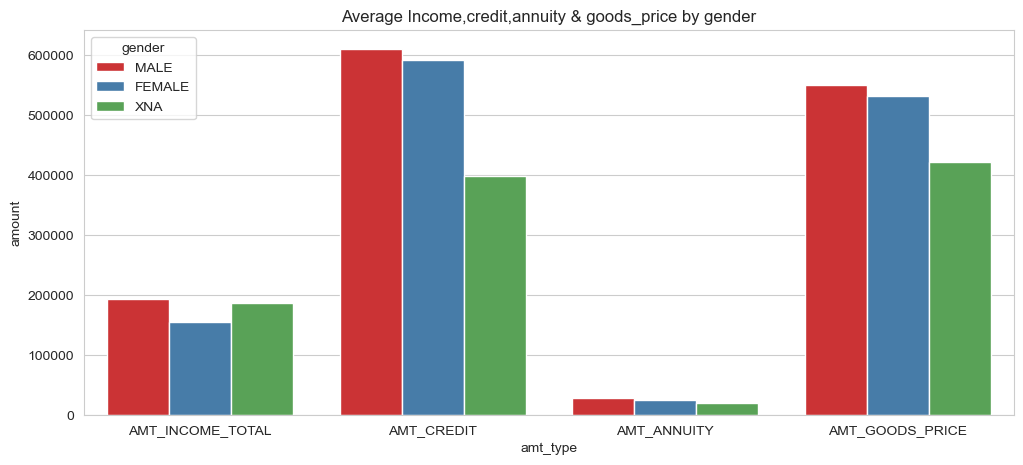

In [108]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df1 = data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

## Scatter plot between credit amount and annuity amount

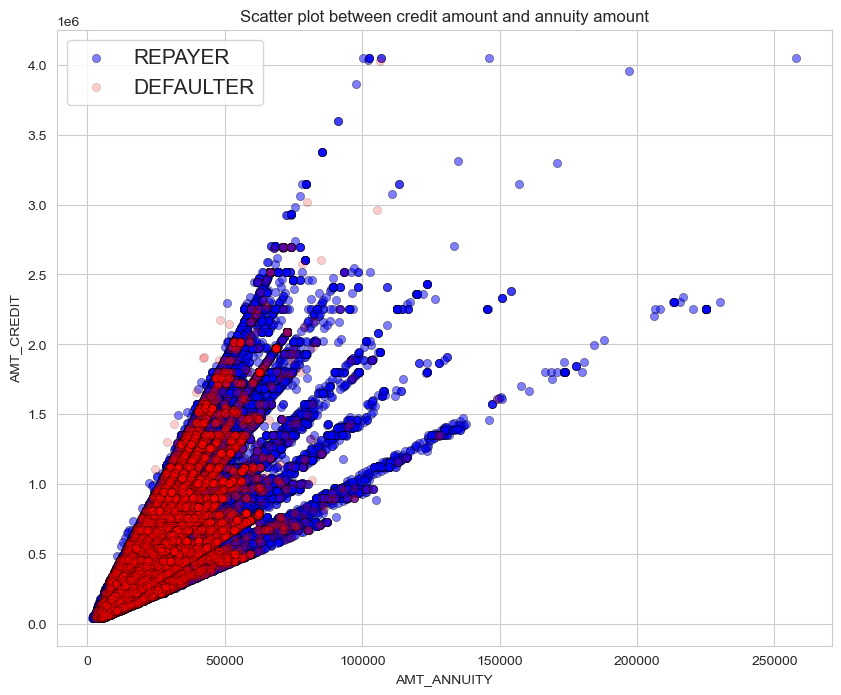

In [109]:
fig = plt.figure(figsize=(10,8))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

## Pair Plot between amount variables

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

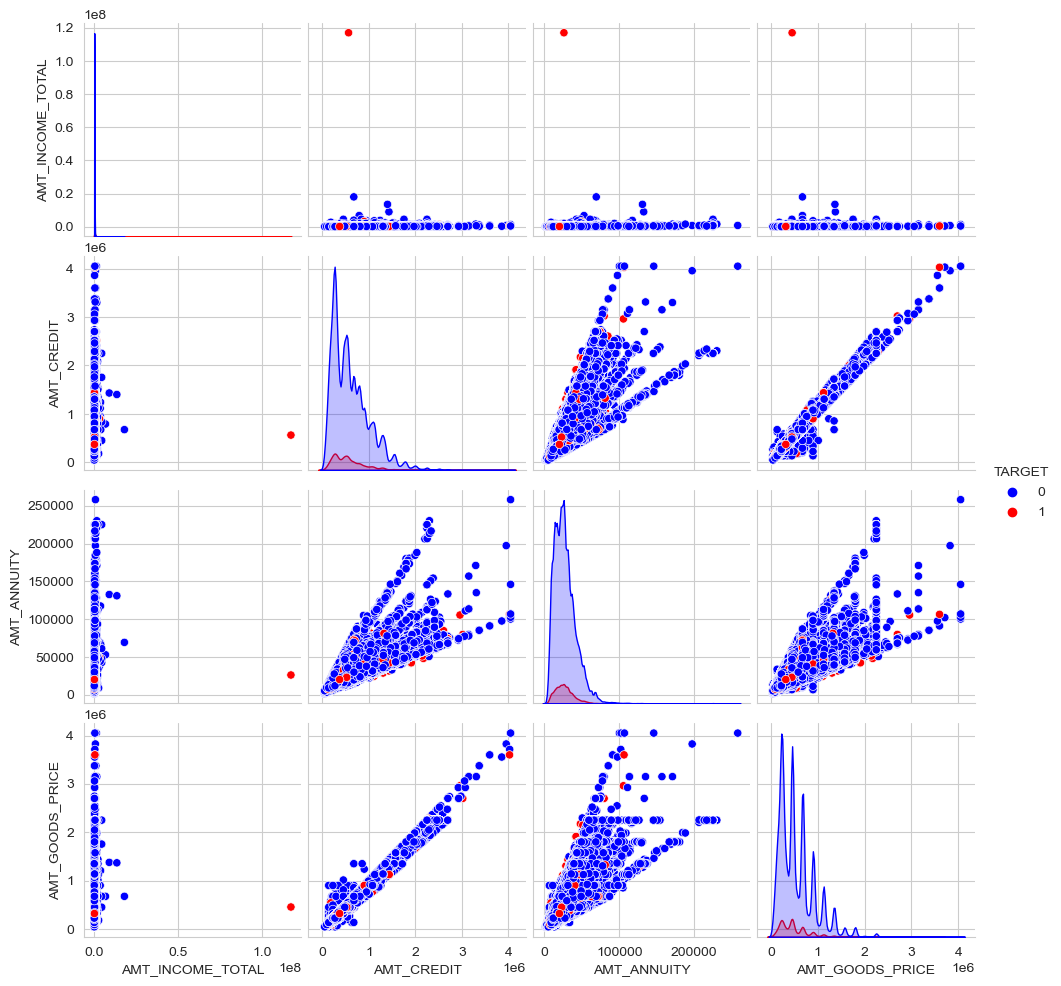

In [110]:
amt = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

# Distribution of Suite type

NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

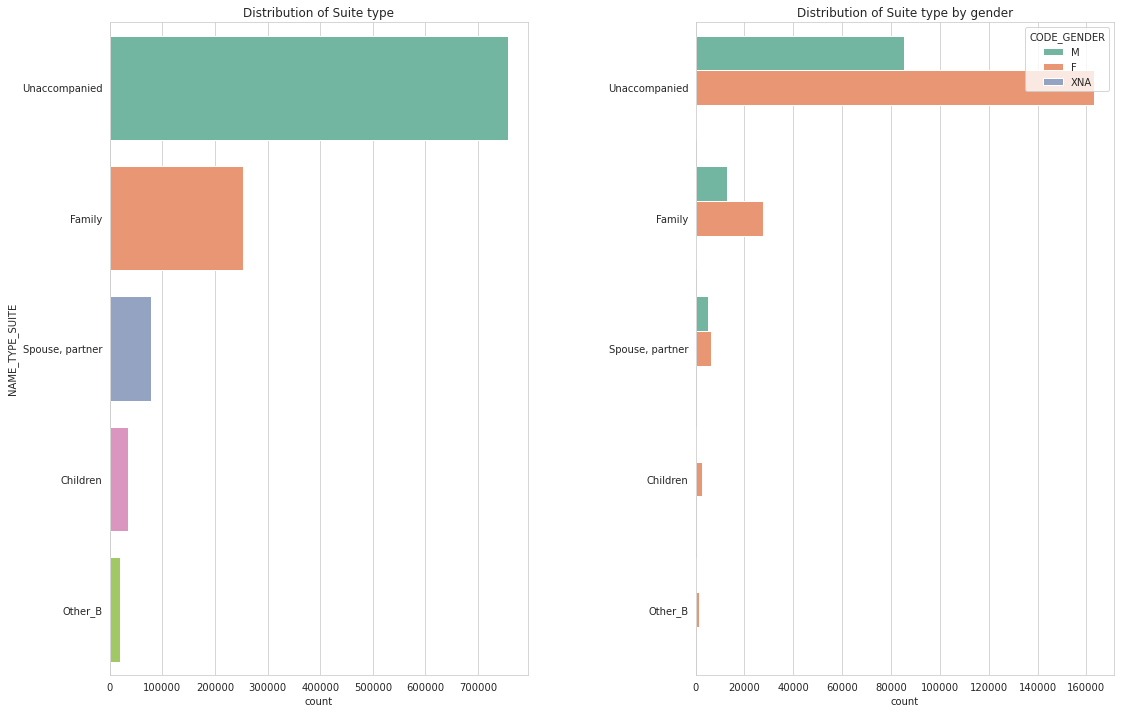

In [110]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["NAME_TYPE_SUITE"],
              palette="Set2",
              order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=data["NAME_TYPE_SUITE"],
              hue=data["CODE_GENDER"],palette="Set2",
              order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

### Distribution of client income type

NAME_INCOME_TYPE Clients income type (businessman, working, maternity leave,…)

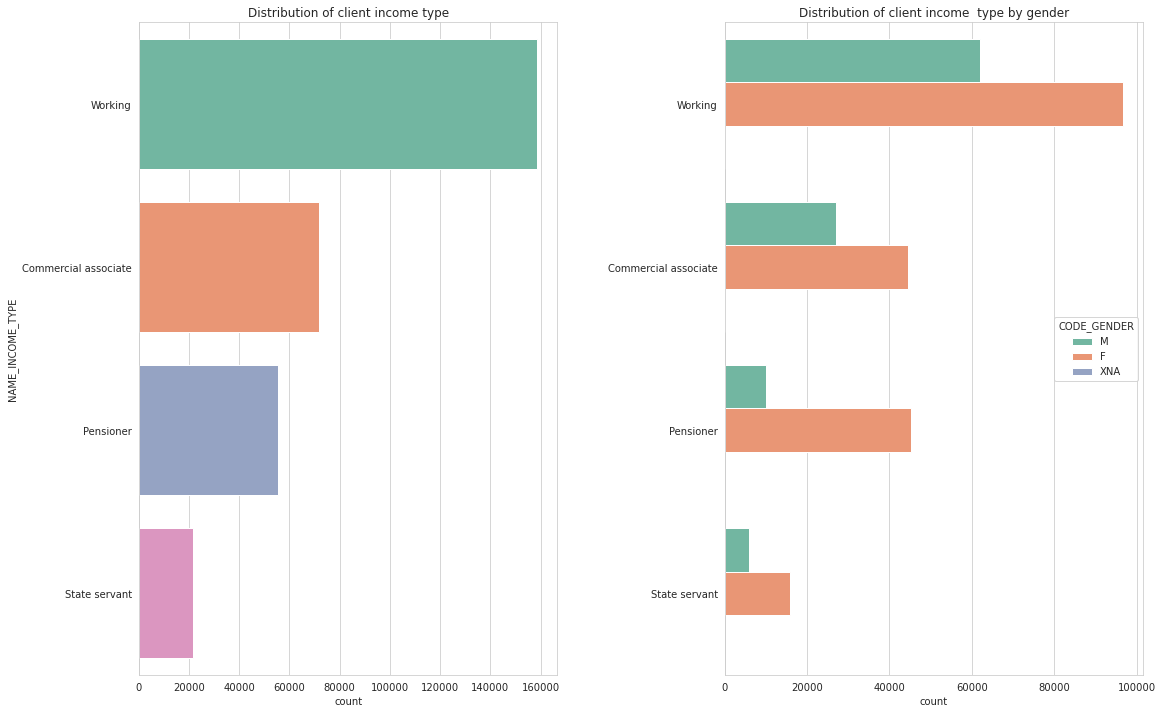

In [111]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              palette="Set2",
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              hue=data["CODE_GENDER"],
              palette="Set2",
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)


### Distribution of Education type by loan repayment status

NAME_EDUCATION_TYPE Level of highest education the client achieved..



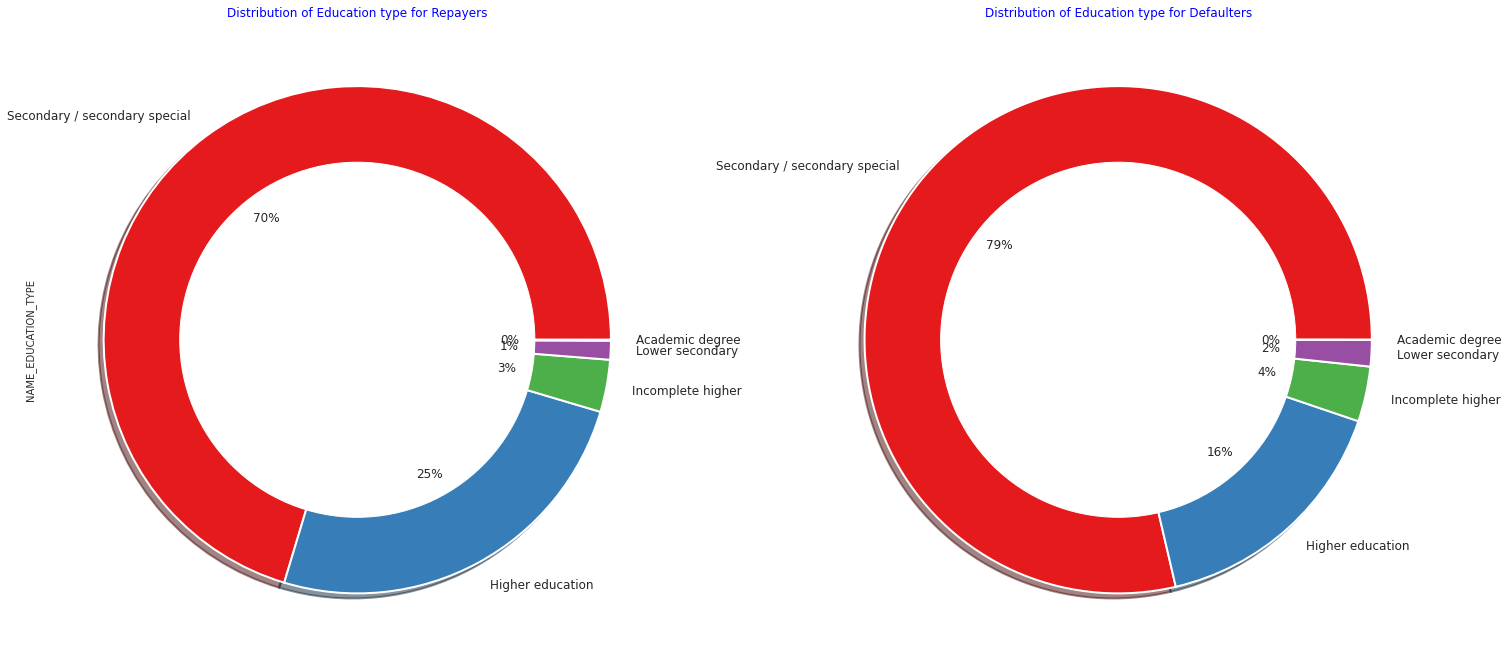

In [112]:
plt.figure(figsize=(25,25))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Point to infer from the graph

Clients who default have proportionally 9% less higher education compared to clients who do not default.

### Average Earnings by different professions and education types

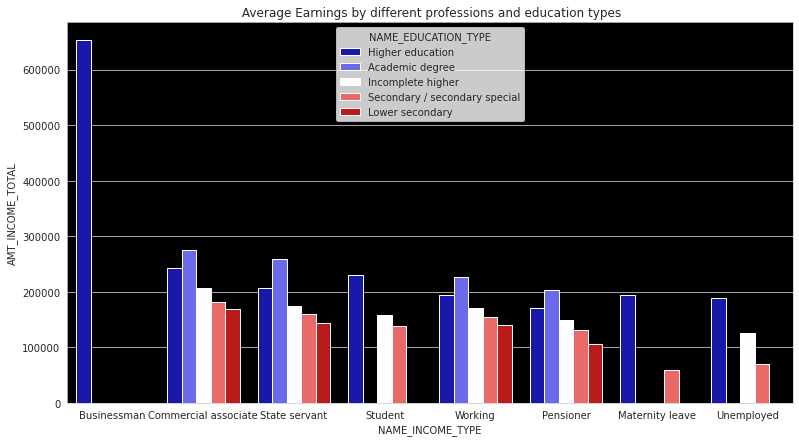

In [113]:
edu = data.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types")
plt.show()


### Distribution of Education type by loan repayment status

NAME_FAMILY_STATUS - Family status of the client

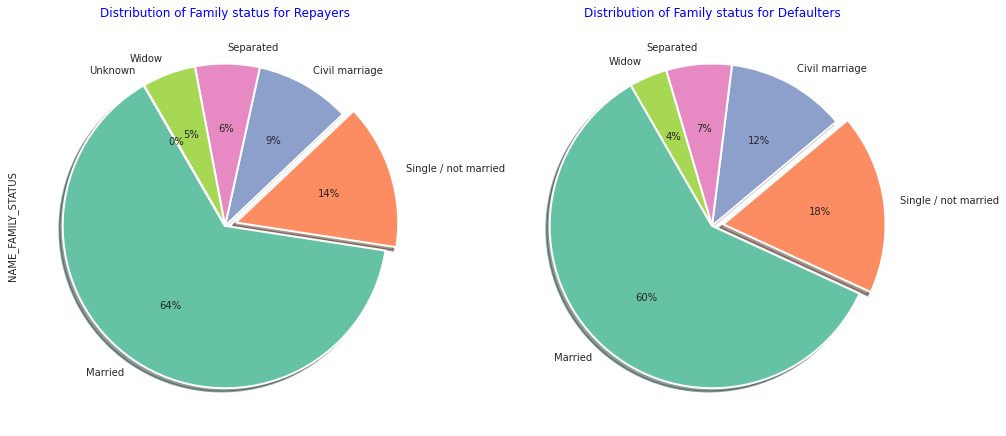

In [114]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Point to infer from the graph

Percentage of single people are more in defaulters than non defaulters.


### Distribution of Housing type by loan repayment status

NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)

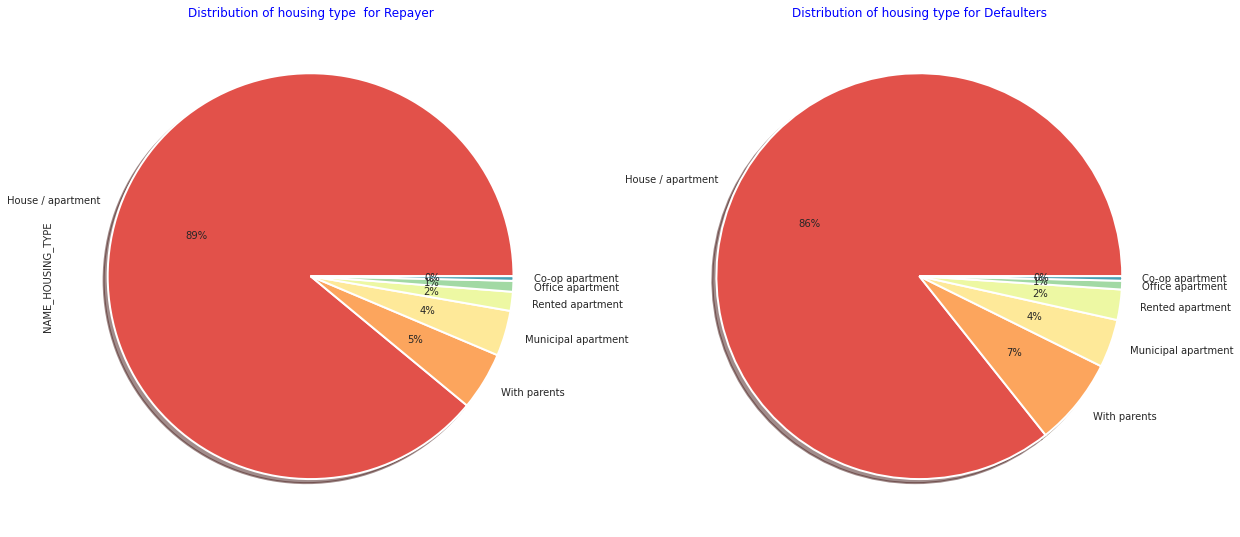

In [115]:
plt.figure(figsize=(20,20))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                             colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                    colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of housing type for Defaulters",color="b")
plt.ylabel("")
plt.show()


### Distribution normalized population of region where client lives by loan repayment status

REGION_POPULATION_RELATIVE - Normalized population of region where client lives (higher number means the client lives in more populated region).



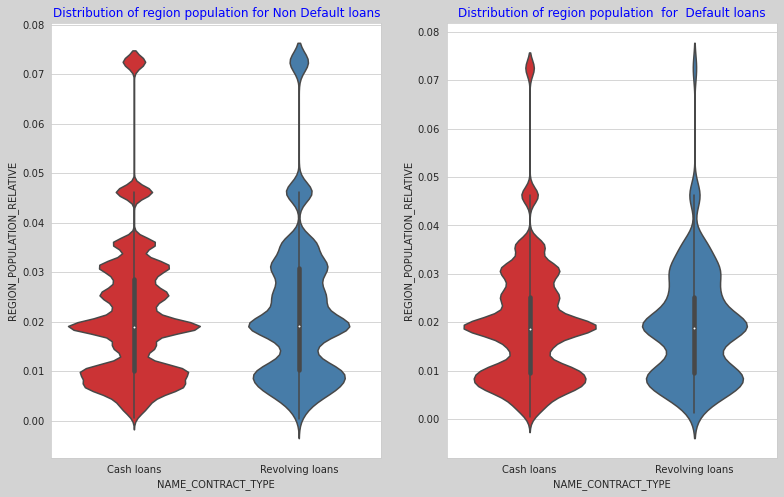

In [116]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=application_data[application_data["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==0]["NAME_CONTRACT_TYPE"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")
plt.subplot(122)
sns.violinplot(y = application_data[application_data["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==1]["NAME_CONTRACT_TYPE"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

### Point to infer from the graph

In High population density regions people are less likely to default on loans.


### Client's age

DAYS_BIRTH - Client's age in days at the time of application.



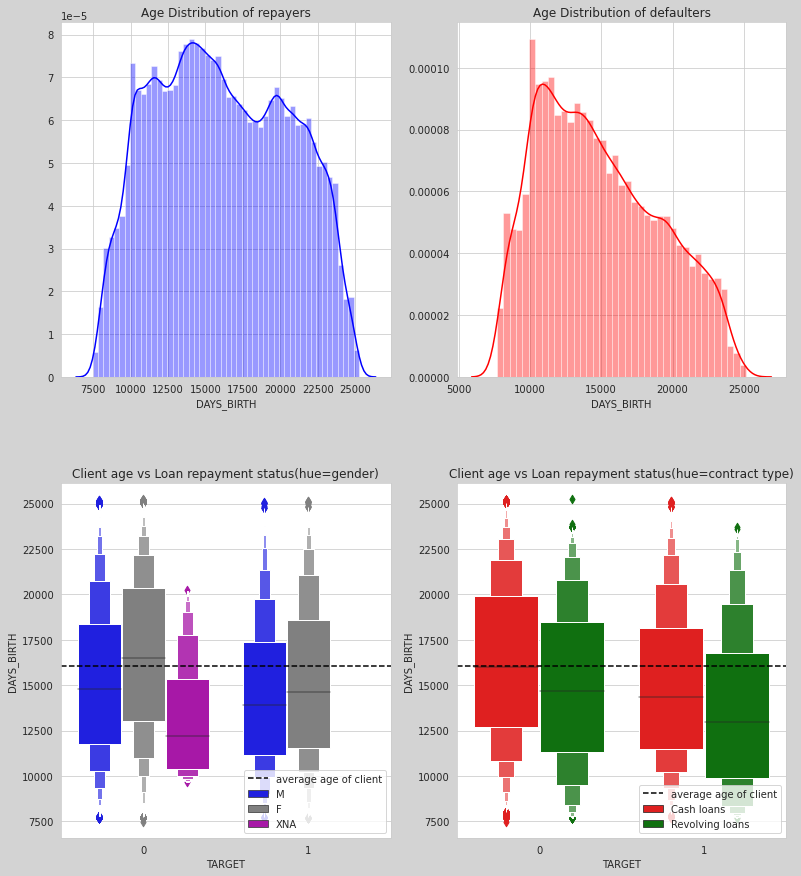

In [117]:
fig = plt.figure(figsize=(13,15))

plt.subplot(221)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_BIRTH"],color="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_BIRTH"],color="r")
plt.title("Age Distribution of defaulters")

plt.subplot(223)
sns.lvplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["CODE_GENDER"],palette=["b","grey","m"])
plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=gender)")

plt.subplot(224)
sns.lvplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["NAME_CONTRACT_TYPE"],palette=["r","g"])
plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=contract type)")

plt.subplots_adjust(wspace = .2,hspace = .3)

fig.set_facecolor("lightgrey")

### Point to infer from the graph

Average clients age is comparatively less in non repayers than repayers in every aspect.

Younger people tend to default more than elder people.

### Distribution of days employed for target variable.

DAYS_EMPLOYED - How many days before the application for target variable the person started current employment

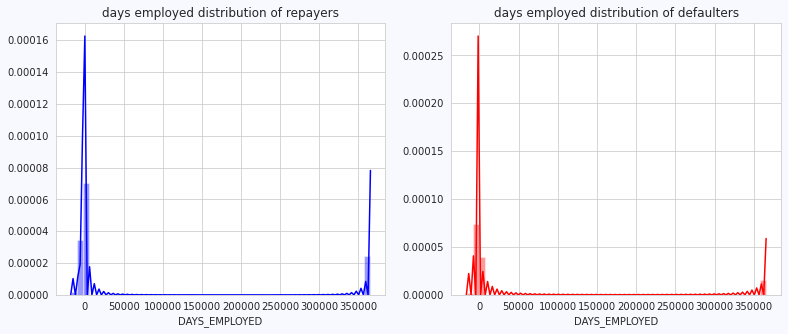

In [118]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

### Distribution of registration days for target variable.

DAYS_REGISTRATION How many days before the application did client change his registration

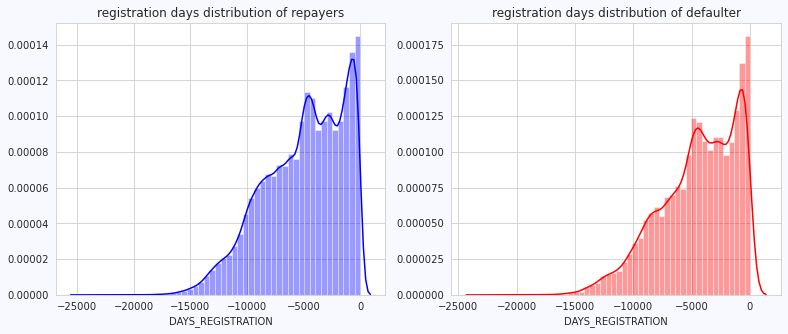

In [119]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

### Distribution in contact information provided by client

FLAG_MOBIL - Did client provide mobile phone (1=YES, 0=NO)

FLAG_EMP_PHONE - Did client provide work phone (1=YES, 0=NO)

FLAG_WORK_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_CONT_MOBILE - Was mobile phone reachable (1=YES, 0=NO)

FLAG_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_EMAIL - Did client provide email (1=YES, 0=NO)

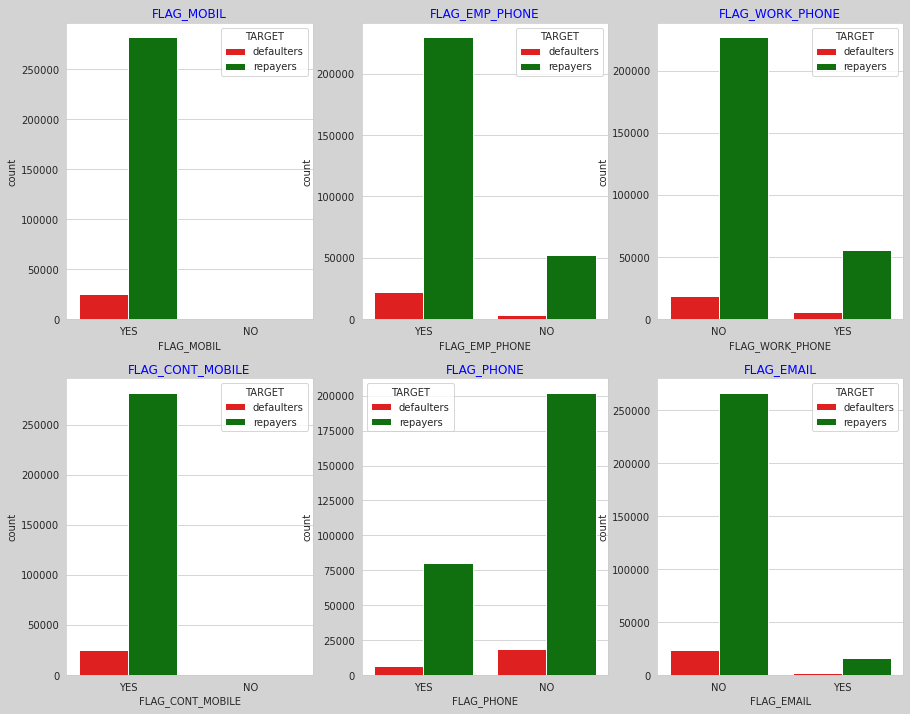

In [120]:
x   = application_data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x  = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig = plt.figure(figsize=(15,12))
fig.set_facecolor("lightgrey")

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"],palette=["r","g"])
    plt.title(i,color="b")


### Distribution of registration days for target variable.

REGION_RATING_CLIENT - Home credit rating of the region where client lives (1,2,3).

REGION_RATING_CLIENT_W_CITY - Home credit rating of the region where client lives with taking city into account (1,2,3). Percentage of defaulters are less in 1-rated regions compared to repayers.

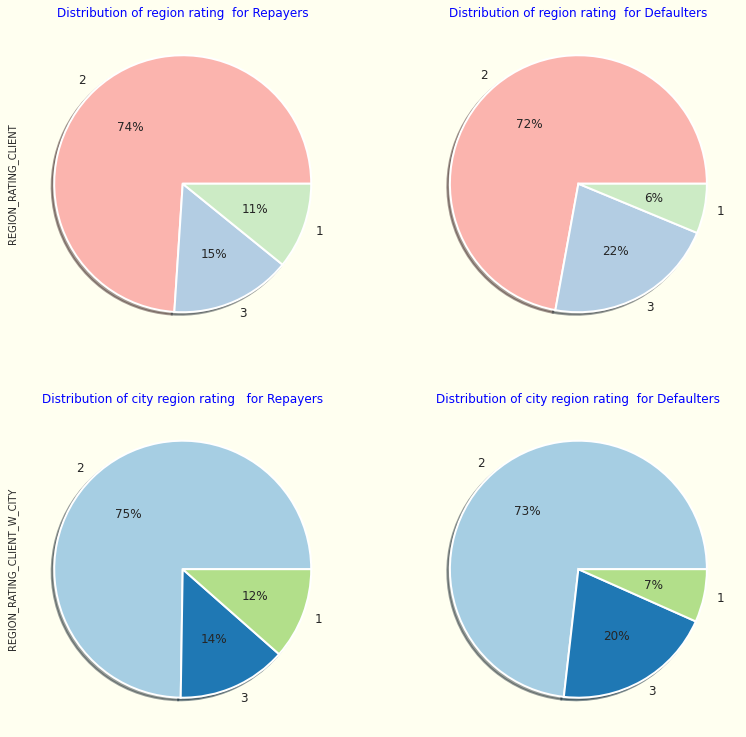

In [121]:
fig = plt.figure(figsize=(13,13))
plt.subplot(221)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")

### Point to infer from the graph

Percentage of defaulters are less in 1-rated regions compared to repayers.

Percentage of defaulters are more in 3-rated regions compared to repayers.

### Peak days and hours for applying loans (defaulters vs repayers)

WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for the loan.

HOUR_APPR_PROCESS_START - Approximately at what hour did the client apply for the loan.



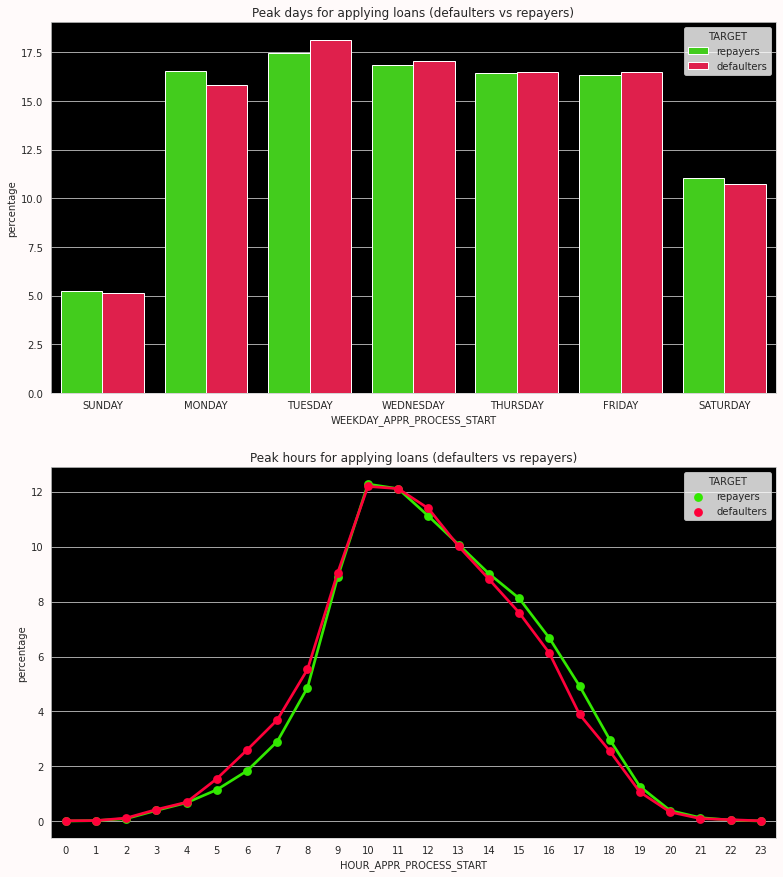

In [122]:
day = application_data.groupby("TARGET").agg({"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.rename(columns={"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.reset_index()
day_0 = day[:7]
day_1 = day[7:]
day_0["percentage"] = day_0["value_counts"]*100/day_0["value_counts"].sum()
day_1["percentage"] = day_1["value_counts"]*100/day_1["value_counts"].sum()
days = pd.concat([day_0,day_1],axis=0)
days["TARGET"] = days.replace({1:"defaulters",0:"repayers"})

fig = plt.figure(figsize=(13,15))
plt.subplot(211)
order = ['SUNDAY', 'MONDAY','TUESDAY', 'WEDNESDAY','THURSDAY', 'FRIDAY', 'SATURDAY']
ax= sns.barplot("WEEKDAY_APPR_PROCESS_START","percentage",data=days,
                hue="TARGET",order=order,palette="prism")
ax.set_facecolor("k")
ax.set_title("Peak days for applying loans (defaulters vs repayers)")

hr = application_data.groupby("TARGET").agg({"HOUR_APPR_PROCESS_START":"value_counts"})
hr = hr.rename(columns={"HOUR_APPR_PROCESS_START":"value_counts"}).reset_index()
hr_0 = hr[hr["TARGET"]==0]
hr_1 = hr[hr["TARGET"]==1]
hr_0["percentage"] = hr_0["value_counts"]*100/hr_0["value_counts"].sum()
hr_1["percentage"] = hr_1["value_counts"]*100/hr_1["value_counts"].sum()
hrs = pd.concat([hr_0,hr_1],axis=0)
hrs["TARGET"] = hrs["TARGET"].replace({1:"defaulters",0:"repayers"})
hrs = hrs.sort_values(by="HOUR_APPR_PROCESS_START",ascending=True)

plt.subplot(212)
ax1 = sns.pointplot("HOUR_APPR_PROCESS_START","percentage",
                    data=hrs,hue="TARGET",palette="prism")
ax1.set_facecolor("k")
ax1.set_title("Peak hours for applying loans (defaulters vs repayers)")
fig.set_facecolor("snow")

### Point to infer from the graph

On tuesdays , percentage of defaulters applying for loans is greater than that of repayers.

From morning 4'O clock to 9'O clock percentage of defaulters applying for loans is greater than that of repayers.


### Distribution in organization types for repayers and defaulters

ORGANIZATION_TYPE - Type of organization where client works.



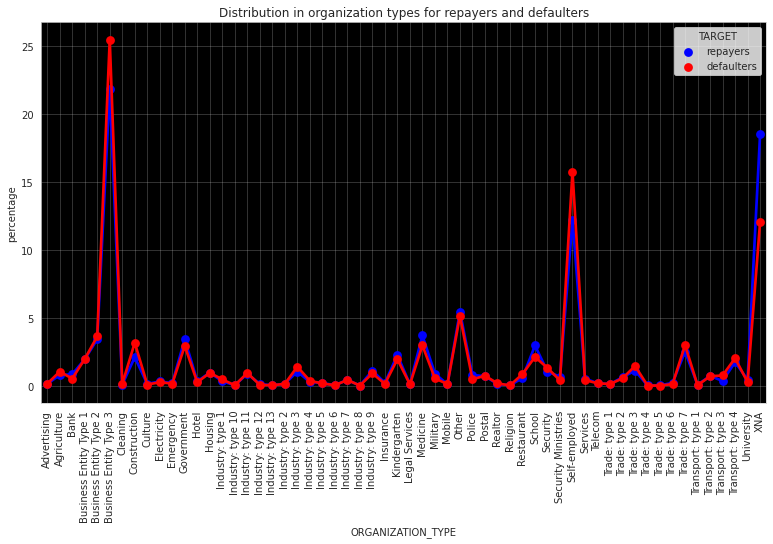

In [123]:
org = application_data.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(13,7))
ax = sns.pointplot("ORGANIZATION_TYPE","percentage",
                   data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
ax.set_facecolor("k")
ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

### Point to infer from the graph

Organizations like Business Entity Type 3,Construction,Self-employed percentage of defaulters are higher than repayers.

### Distribution client's social surroundings with observed and defaulted 30 DPD (days past due)

OBS_30_CNT_SOCIAL_CIRCLE- How many observation of client's social surroundings with observable 30 DPD (days past due) default.

DEF_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 30 DPD (days past due) .

OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default.

DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD.

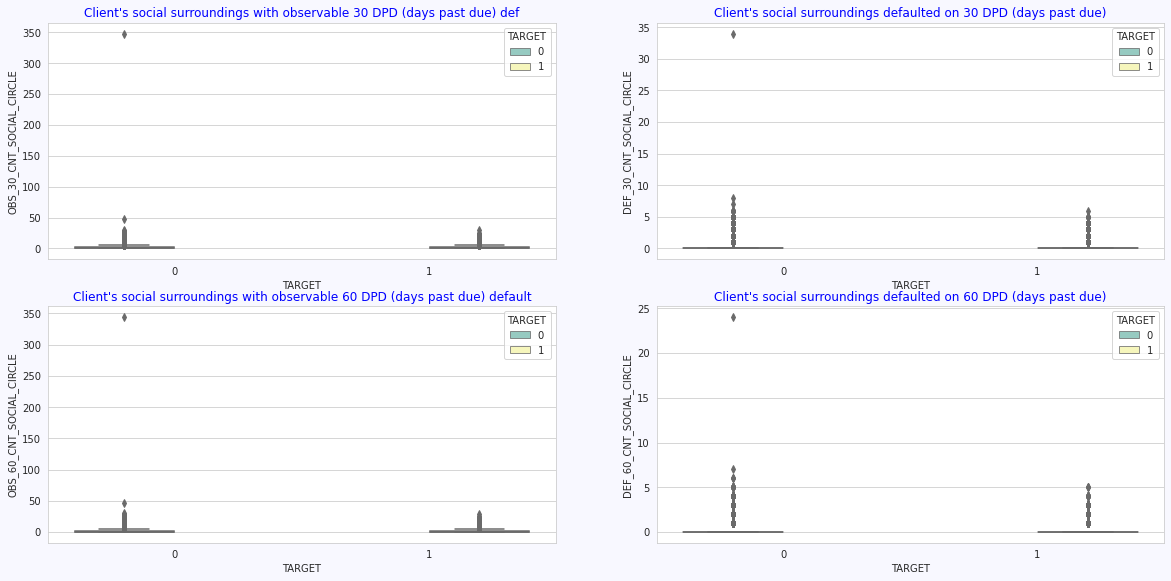

In [124]:
fig = plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(data=application_data,x='TARGET',y='OBS_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 30 DPD (days past due) def",color="b")
plt.subplot(422)
sns.boxplot(data=application_data,x='TARGET',y='DEF_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 30 DPD (days past due)",color="b")
plt.subplot(423)
sns.boxplot(data=application_data,x='TARGET',y='OBS_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 60 DPD (days past due) default",color="b")
plt.subplot(424)
sns.boxplot(data=application_data,x='TARGET',y='DEF_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 60 DPD (days past due)",color="b")
fig.set_facecolor("ghostwhite")

### Number of days before application client changed phone .

DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone.



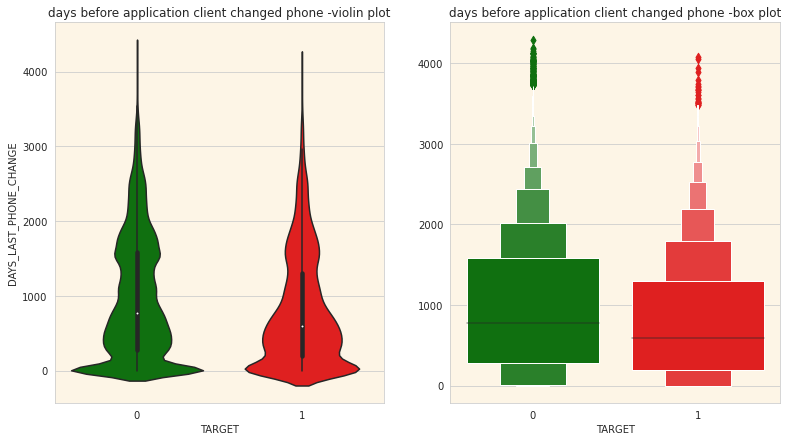

In [125]:
plt.figure(figsize=(13,7))
plt.subplot(121)
ax = sns.violinplot(application_data["TARGET"],
                    application_data["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax.set_facecolor("oldlace")
ax.set_title("days before application client changed phone -violin plot")
plt.subplot(122)
ax1 = sns.lvplot(application_data["TARGET"],
                 application_data["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax1.set_facecolor("oldlace")
ax1.set_ylabel("")
ax1.set_title("days before application client changed phone -box plot")
plt.subplots_adjust(wspace = .2)

### Point to infer from the graph

Average days of defaulters phone change is less than average days of repayers phone change.

### Documents provided by the clients.

FLAG_DOCUMENT - Did client provide documents.(1,0)

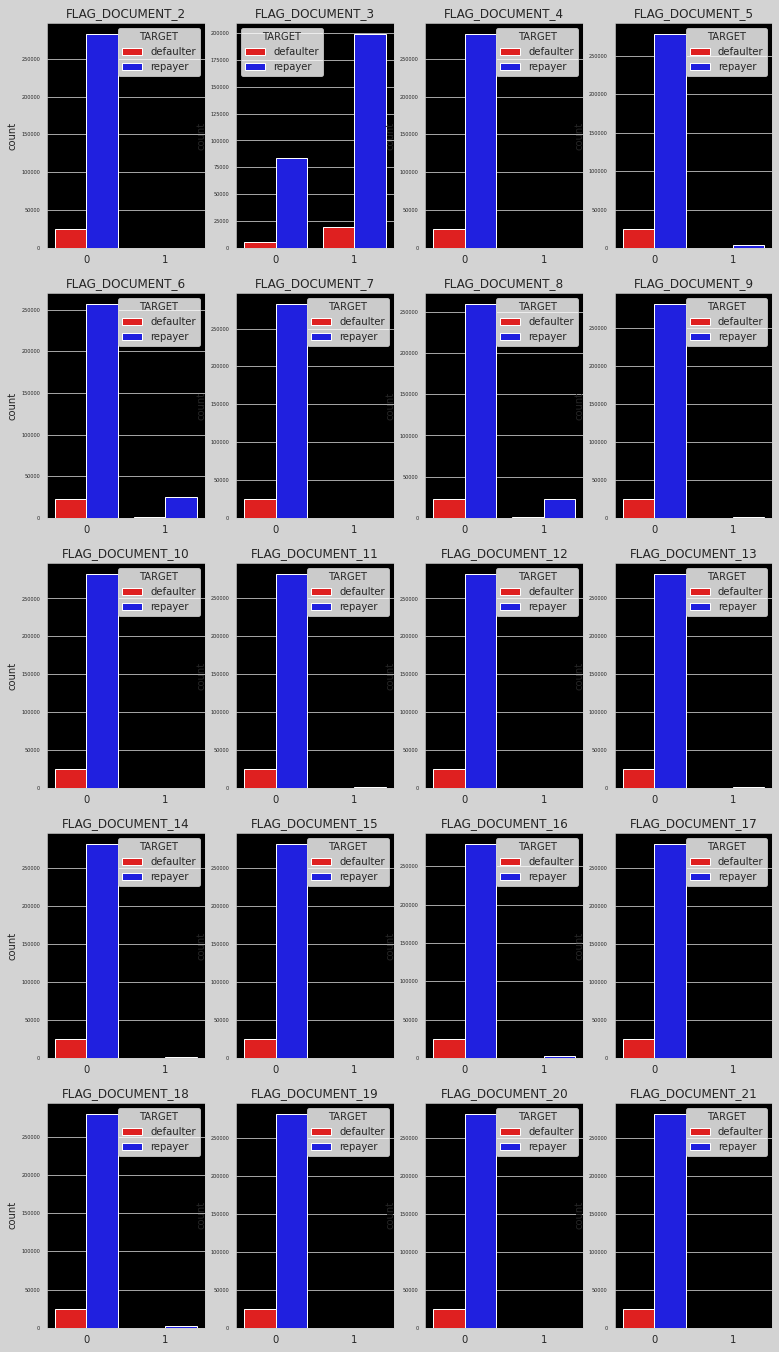

In [126]:
cols = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = application_data[cols+["TARGET"]]

length = len(cols)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"defaulter",0:"repayer"})

fig = plt.figure(figsize=(13,24))
fig.set_facecolor("lightgrey")
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)
    ax.set_facecolor("k")

### Equiries to Credit Bureau about the client before application.

AMT_REQ_CREDIT_BUREAU_HOUR - Number of enquiries to Credit Bureau about the client one hour before application.

AMT_REQ_CREDIT_BUREAU_DAY - Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application).

AMT_REQ_CREDIT_BUREAU_WEEK - Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application).

AMT_REQ_CREDIT_BUREAU_MON - Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application).

AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application).

AMT_REQ_CREDIT_BUREAU_YEAR - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application).

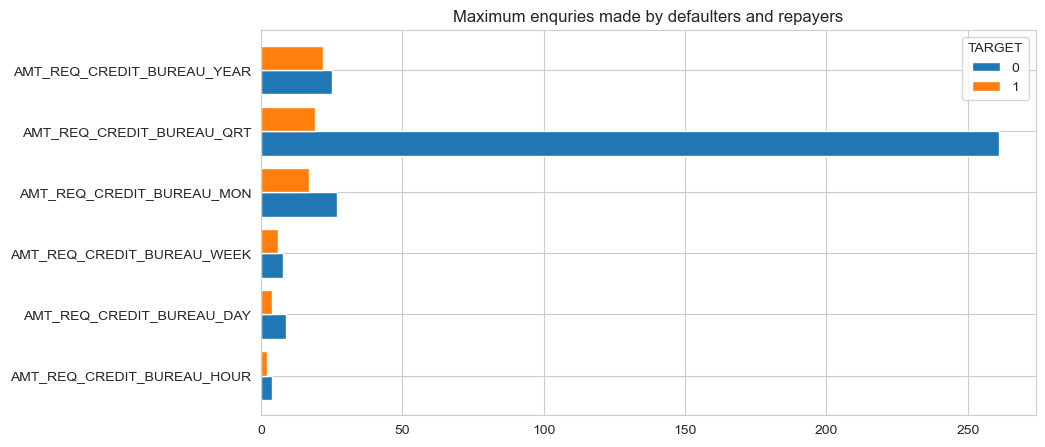

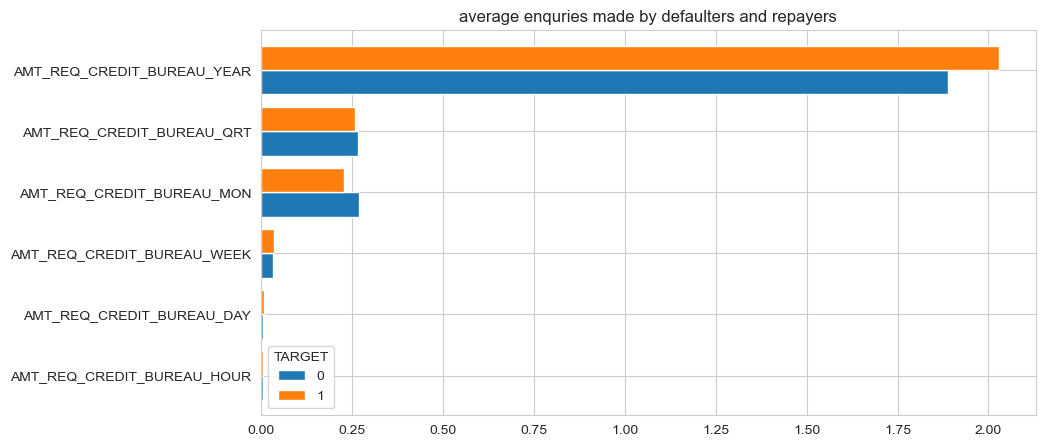

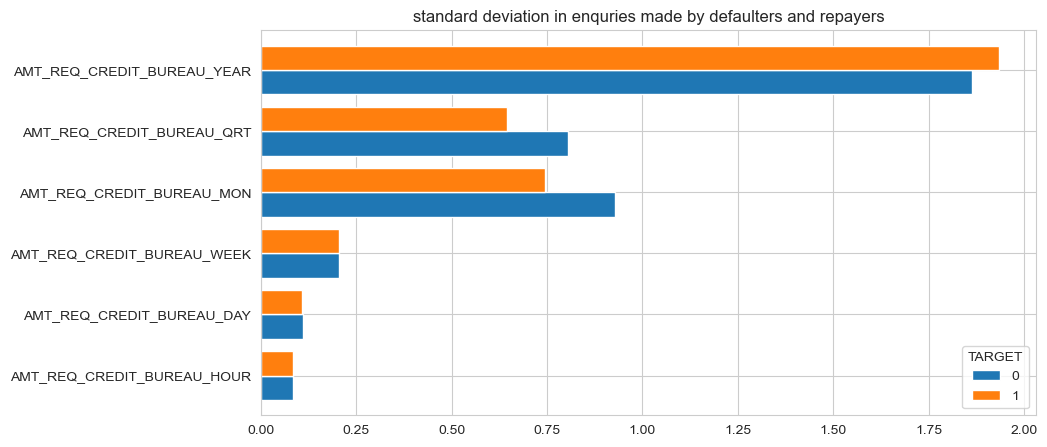

In [111]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_data.groupby("TARGET")[cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("Maximum enquries made by defaulters and repayers")
application_data.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")
application_data.groupby("TARGET")[cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()


### Current loan id having previous loan applications.

SK_ID_PREV - ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit).

SK_ID_CURR ID of loan in our sample.


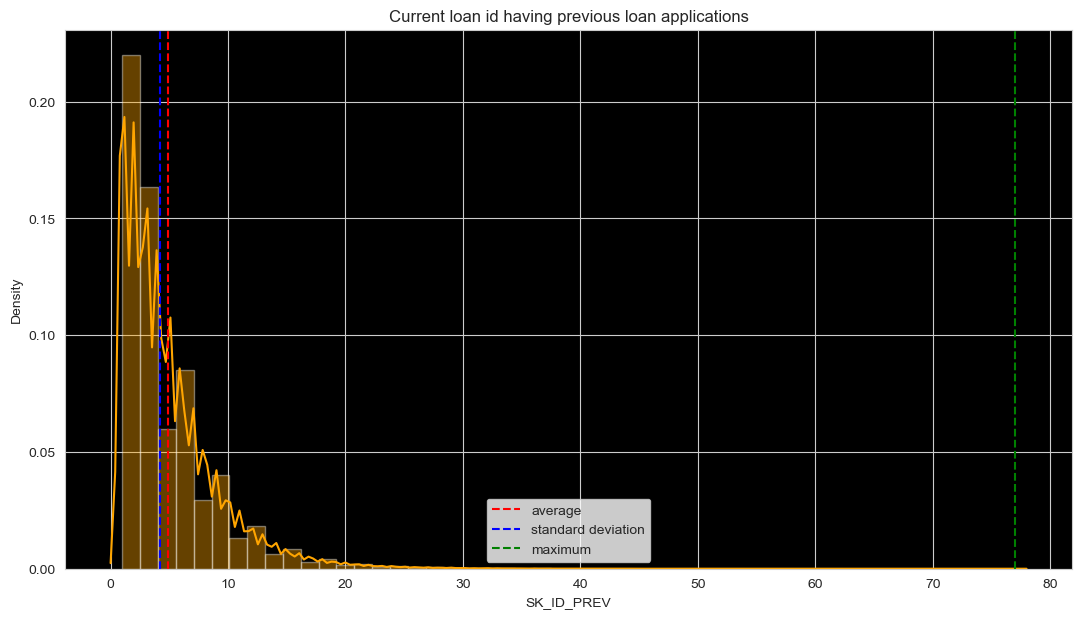

In [112]:
x = previous_application.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="orange")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan id having previous loan applications")
ax.set_facecolor("k")

### Point to infer from the graph
On average current loan ids have 4 to 5 loan applications previously


### Contract types in previous applications

NAME_CONTRACT_TYPE Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.


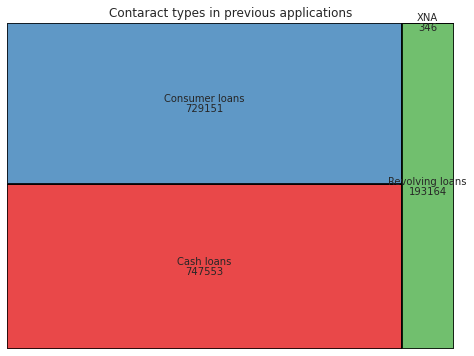

In [129]:
cnts = previous_application["NAME_CONTRACT_TYPE"].value_counts()
import squarify
plt.figure(figsize=(8,6))
squarify.plot(cnts.values,label=cnts.keys(),value=cnts.values,linewidth=2,edgecolor="k",alpha=.8,color=sns.color_palette("Set1"))
plt.axis("off")
plt.title("Contaract types in previous applications")
plt.show()

### Point to infer from the graph


Cash loan applications are maximum followed by consumer loan applications.

### Previous loan amounts applied and loan amounts credited.

AMT_APPLICATION-For how much credit did client ask on the previous application.

AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT.

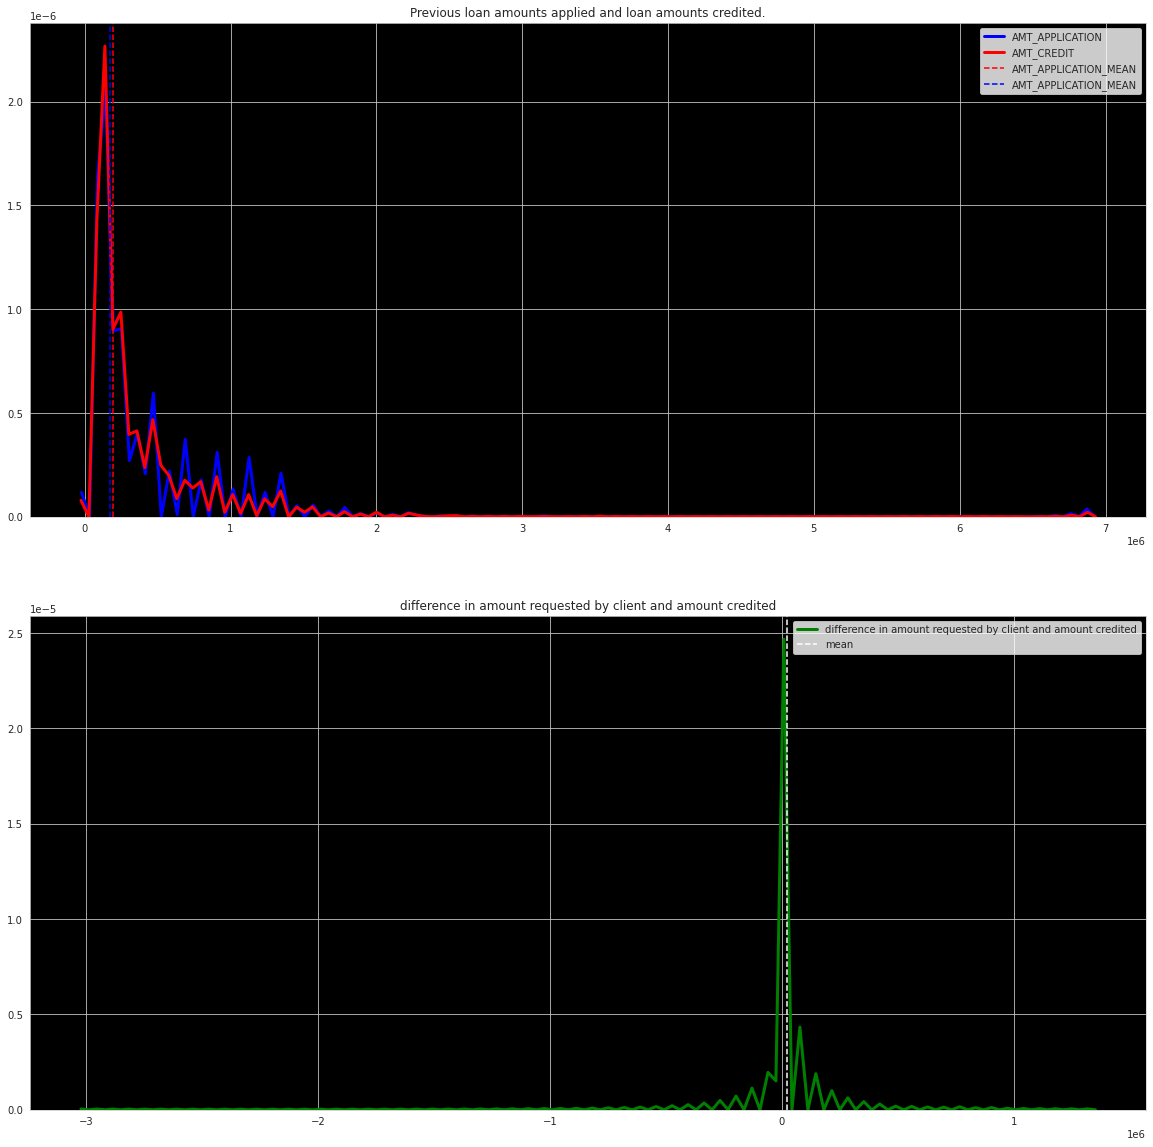

In [130]:
plt.figure(figsize=(20,20))
plt.subplot(211)
ax = sns.kdeplot(previous_application["AMT_APPLICATION"],color="b",linewidth=3)
ax = sns.kdeplot(previous_application[previous_application["AMT_CREDIT"].notnull()]["AMT_CREDIT"],color="r",linewidth=3)
plt.axvline(previous_application[previous_application["AMT_CREDIT"].notnull()]["AMT_CREDIT"].mean(),color="r",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.axvline(previous_application["AMT_APPLICATION"].mean(),color="b",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.legend(loc="best")
plt.title("Previous loan amounts applied and loan amounts credited.")
ax.set_facecolor("k")

plt.subplot(212)
diff = (previous_application["AMT_CREDIT"] - previous_application["AMT_APPLICATION"]).reset_index()
diff = diff[diff[0].notnull()]
ax1 = sns.kdeplot(diff[0],color="g",linewidth=3,label = "difference in amount requested by client and amount credited")
plt.axvline(diff[0].mean(),color="white",linestyle="dashed",label = "mean")
plt.title("difference in amount requested by client and amount credited")
ax1.legend(loc="best")
ax1.set_facecolor("k")

### Total and average amounts applied and credited in previous applications

AMT_APPLICATION-For how much credit did client ask on the previous application. >AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client.

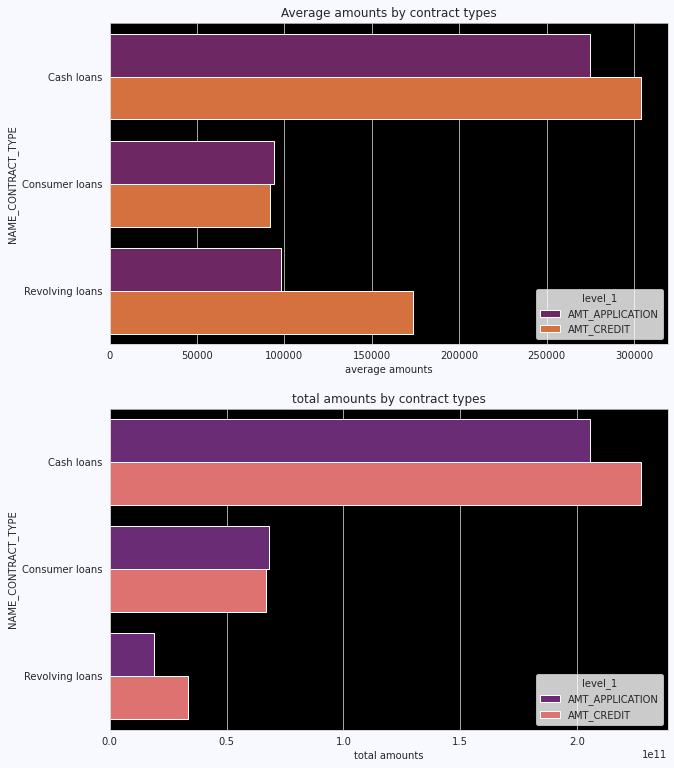

In [131]:
mn = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].mean().stack().reset_index()
tt = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].sum().stack().reset_index()
fig = plt.figure(figsize=(10,13))
fig.set_facecolor("ghostwhite")
plt.subplot(211)
ax = sns.barplot(0,"NAME_CONTRACT_TYPE",data=mn[:6],hue="level_1",palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("average amounts")
ax.set_title("Average amounts by contract types")

plt.subplot(212)
ax1 = sns.barplot(0,"NAME_CONTRACT_TYPE",data=tt[:6],hue="level_1",palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("total amounts")
ax1.set_title("total amounts by contract types")
plt.subplots_adjust(hspace = .2)
plt.show()

### Annuity of previous application

AMT_ANNUITY - Annuity of previous application

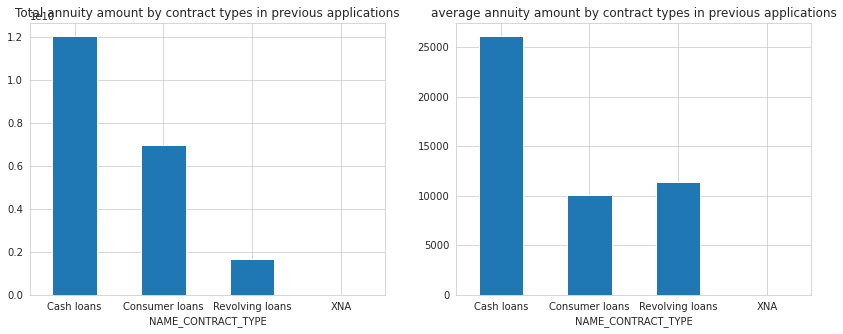

In [132]:
plt.figure(figsize=(14,5))
plt.subplot(121)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()  


### Count of application status by application type.

NAME_CONTRACT_TYPE -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

NAME_CONTRACT_STATUS -Contract status (approved, cancelled, ...) of previous application.



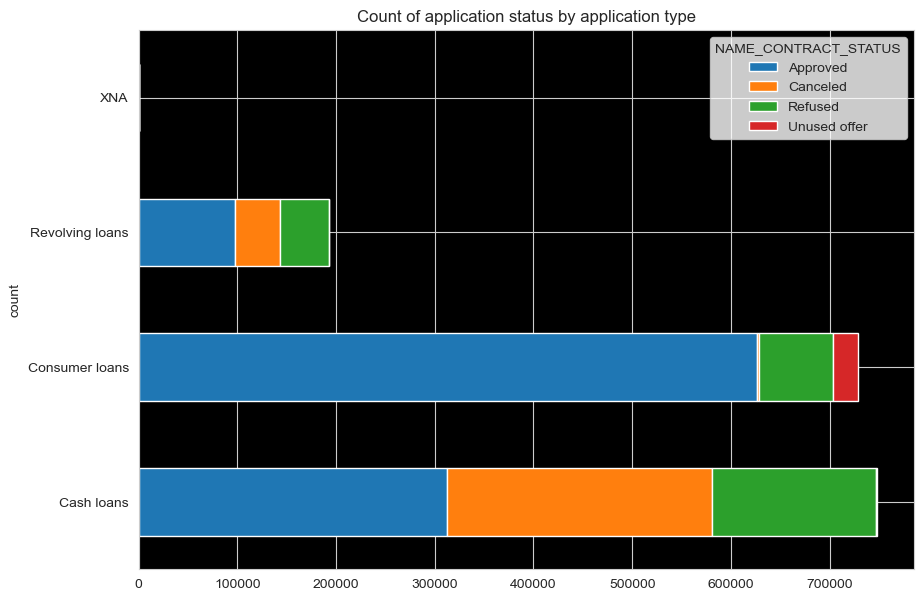

In [113]:
ax = pd.crosstab(previous_application["NAME_CONTRACT_TYPE"],previous_application["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

### Point to infer from the graph

Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.

### Contract status by weekdays

WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for previous application

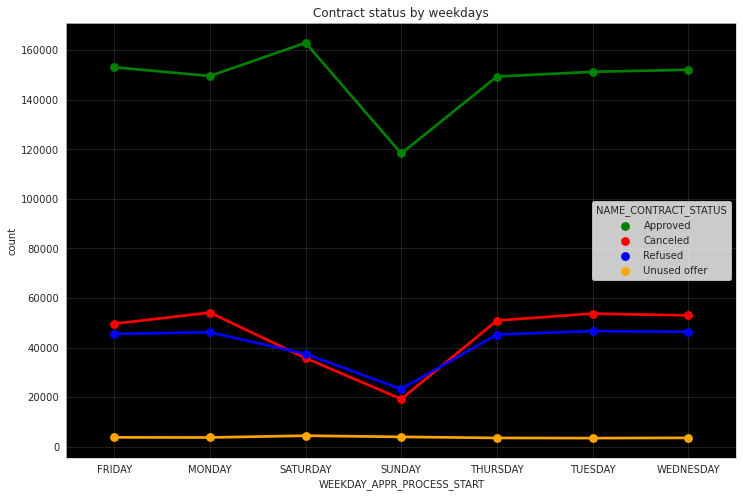

In [134]:
hr = pd.crosstab(previous_application["WEEKDAY_APPR_PROCESS_START"],previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["WEEKDAY_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by weekdays")
plt.grid(True,alpha=.2)



### Contract status by hour of the day

HOUR_APPR_PROCESS_START - Approximately at what day hour did the client apply for the previous application.



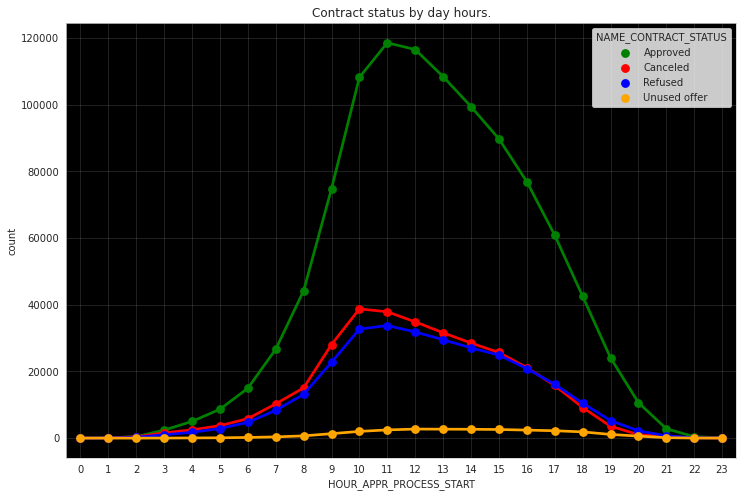

In [135]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by day hours.")
plt.grid(True,alpha=.2)

### Point to infer from the graph

Morning 11'o clock have maximum number of approvals.

Morning 10'o clock have maximum number of refused and cancelled contracts.

### Peak hours for week days for applying loans.

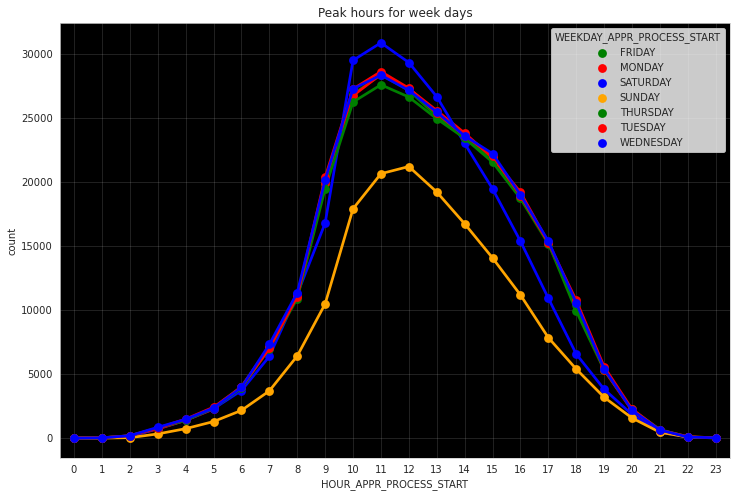

In [136]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["WEEKDAY_APPR_PROCESS_START"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["WEEKDAY_APPR_PROCESS_START"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Peak hours for week days")
plt.grid(True,alpha=.2)


### Percentage of applications accepted,cancelled,refused and unused for different loan purposes.

NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.

NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application.



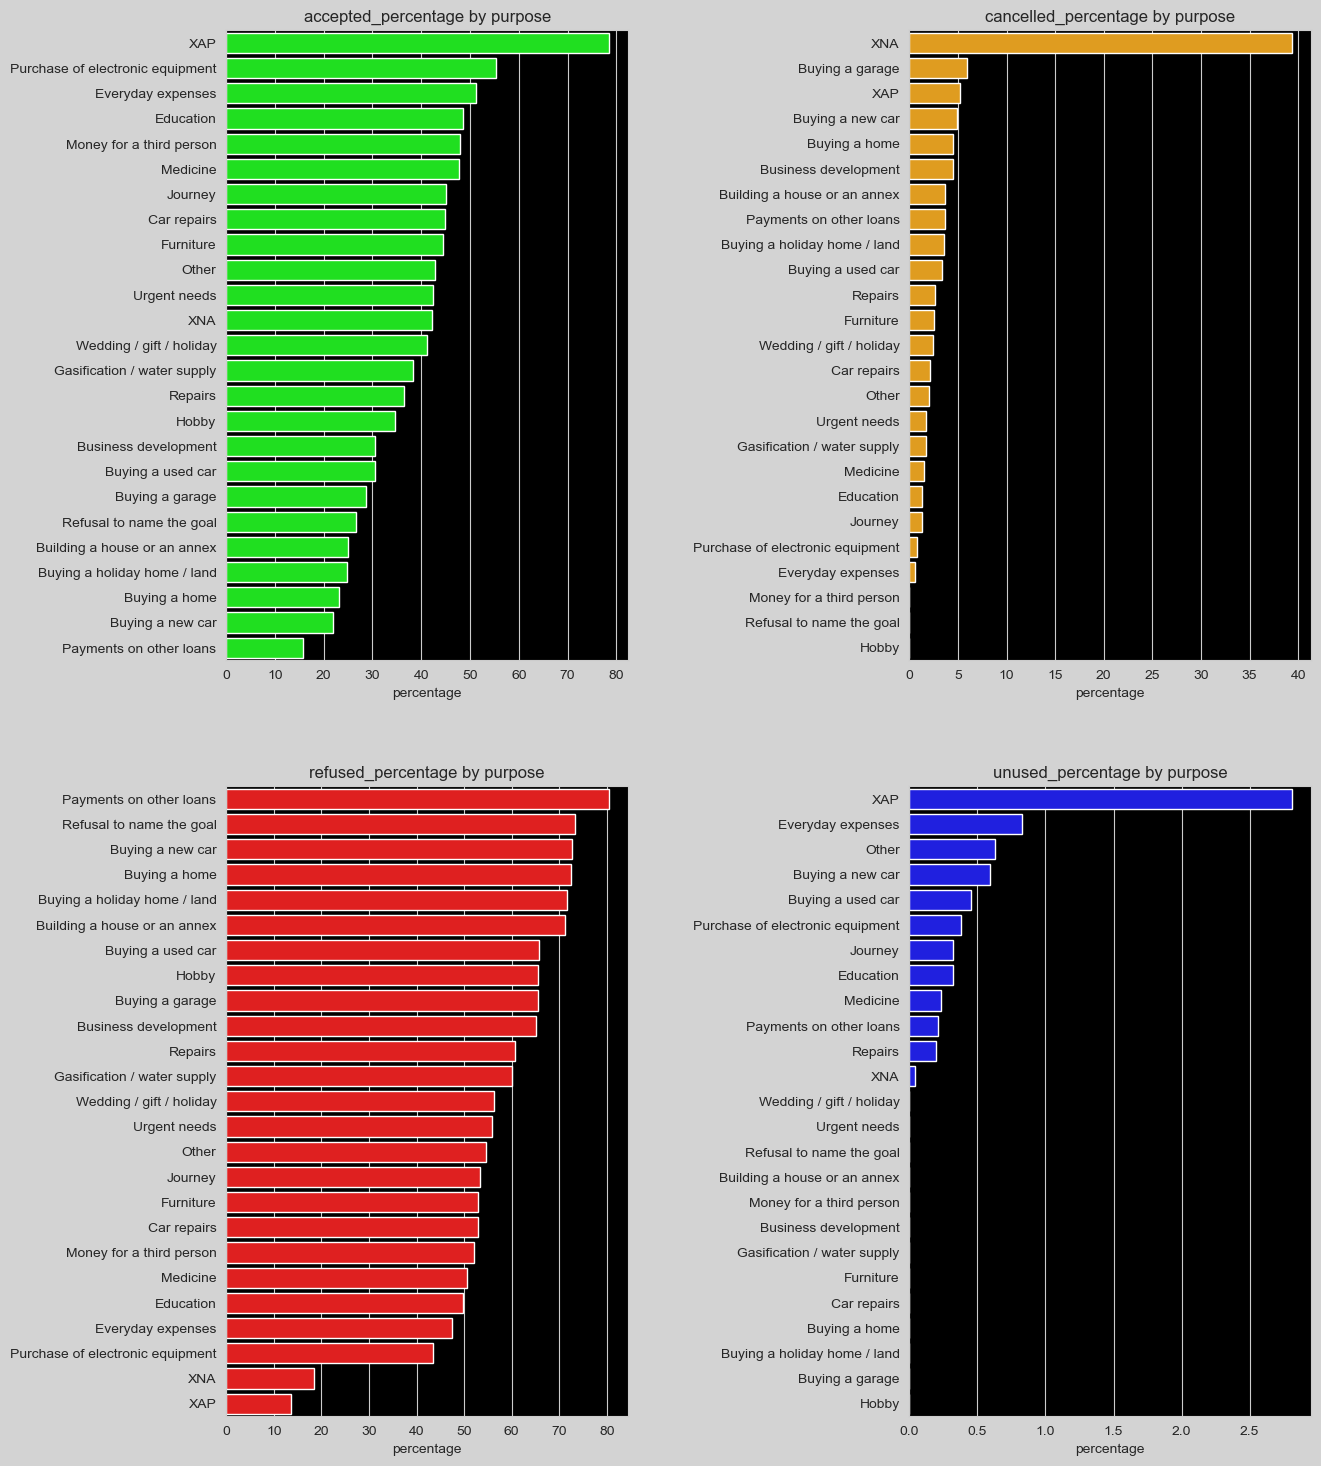

In [114]:
previous_application[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(previous_application["NAME_CASH_LOAN_PURPOSE"],previous_application["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
                                                               "r":"refused_percentage","u":"unused_percentage"})

lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
fig.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace = .7)
    ax.set_facecolor("k")


### Point to infer from the graph
Purposes like XAP ,electronic eqipment ,everey day expences and education have maximum loan acceptance.

Loan puposes like payment of other loans ,refusal to name goal ,buying new home or car have most refusals.

40% of XNA purpose loans are cancalled.

### Contract status relative to decision made about previous application.

DAYS_DECISION - Relative to current application when was the decision about previous application made.



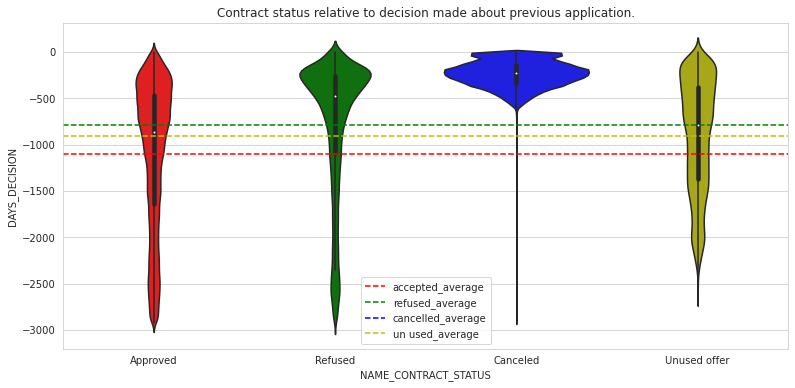

In [138]:
plt.figure(figsize=(13,6))
sns.violinplot(y= previous_application["DAYS_DECISION"],
               x = previous_application["NAME_CONTRACT_STATUS"],palette=["r","g","b","y"])
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Approved"]["DAYS_DECISION"].mean(),
            color="r",linestyle="dashed",label="accepted_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Refused"]["DAYS_DECISION"].mean(),
            color="g",linestyle="dashed",label="refused_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Cancelled"]["DAYS_DECISION"].mean(),color="b",
            linestyle="dashed",label="cancelled_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Unused offer"]["DAYS_DECISION"].mean(),color="y",
            linestyle="dashed",label="un used_average")
plt.legend(loc="best")

plt.title("Contract status relative to decision made about previous application.")
plt.show()

### Point to infer from the graph

On average approved contract types have higher number of decision days compared to cancelled and refused contracts.


### Client payment methods & reasons for application rejections

NAME_PAYMENT_TYPE - Payment method that client chose to pay for the previous application.

CODE_REJECT_REASON - Why was the previous application rejected.



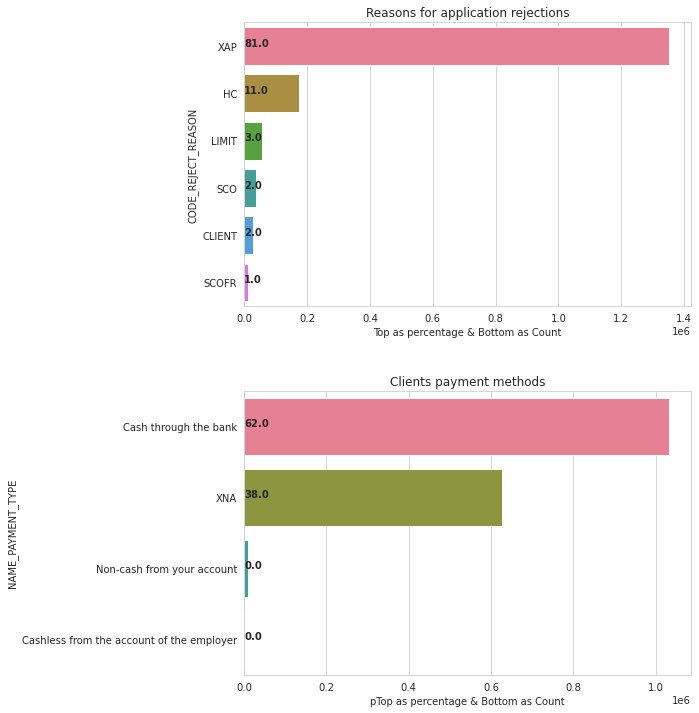

In [139]:
plt.figure(figsize=(8,12))
plt.subplot(211)
rej = previous_application["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.7,i,j,weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

plt.subplot(212)
pay = previous_application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
    ax1.text(.7,i,j,weight="bold")
plt.xlabel("pTop as percentage & Bottom as Count")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")
plt.subplots_adjust(hspace = .3)

### Point to infer from the graph

Around 81% of rejected applications the reason is XAP.

62% of chose to pay through cash by bank for previous applications.


#### Distribution in Client suite type & client type.

NAME_TYPE_SUITE - Who accompanied client when applying for the previous application.

NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application.



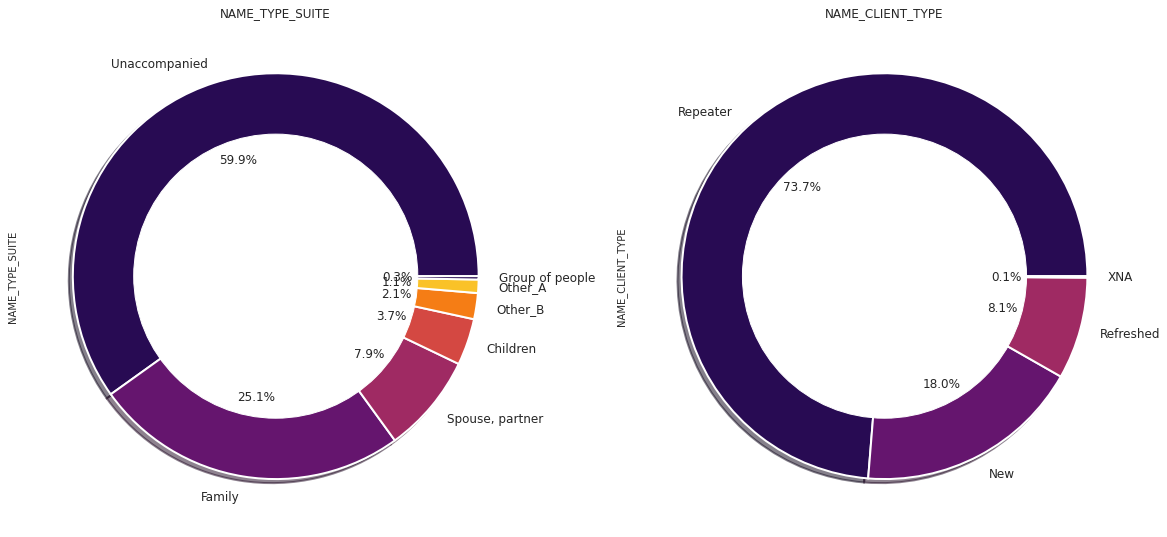

In [140]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
previous_application["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()

### Point to infer from the graph
About 60% clients are un-accompained when applying for loans.

73% clients are old clients


## Popular goods for applying loans

NAME_GOODS_CATEGORY - What kind of goods did the client apply for in the previous application.



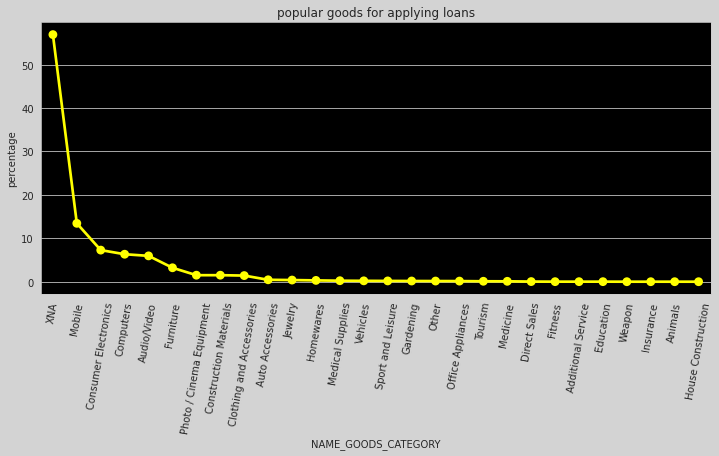

In [141]:
goods = previous_application["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.pointplot("index","percentage",data=goods,color="yellow")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")
ax.set_facecolor("k")
fig.set_facecolor('lightgrey')

### Point to infer from the graph
XNA ,Mobiles ,Computers and consumer electronics are popular goods for applying loans


### Previous applications portfolio and product types

NAME_PORTFOLIO - Was the previous application for CASH, POS, CAR, …

NAME_PRODUCT_TYPE - Was the previous application x-sell o walk-in.

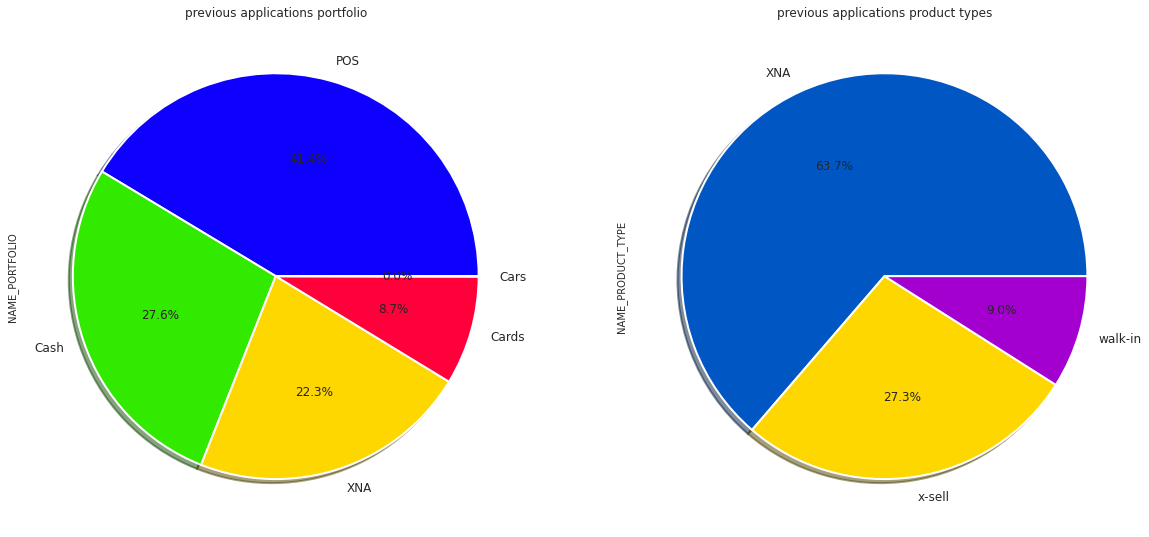

In [142]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",5),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                               shadow =True)
plt.title("previous applications portfolio")
plt.subplot(122)
previous_application["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",3),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True)
plt.title("previous applications product types")
plt.show()


### Approval,canceled and refusal rates by channel types.

CHANNEL_TYPE - Through which channel we acquired the client on the previous application.

NAME_CONTRACT_STATUS- Contract status (approved, cancelled, ...) of previous application.



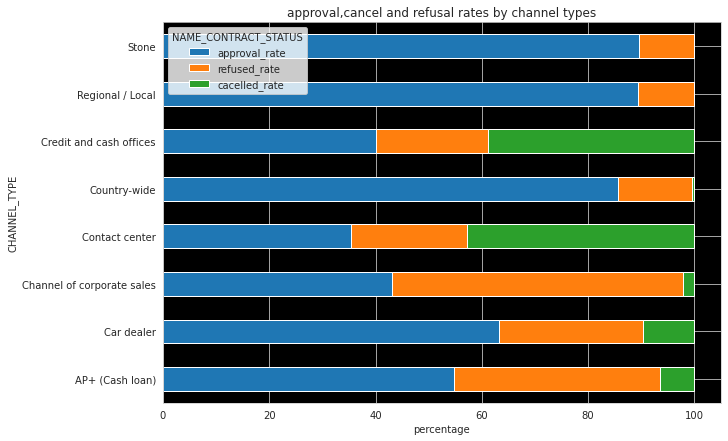

In [143]:
app = pd.crosstab(previous_application["CHANNEL_TYPE"],previous_application["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

### Point to infer from the graph

Channel types like Stone ,regional and country-wide have maximum approval rates.

Channel of coorporate sales have maximum refusal rate.

Credit-cash centres and Contact centres have maximum cancellation rates.

### Highest amount credited seller areas and industries.

SELLERPLACE_AREA - Selling area of seller place of the previous application.

NAME_SELLER_INDUSTRY - The industry of the seller.

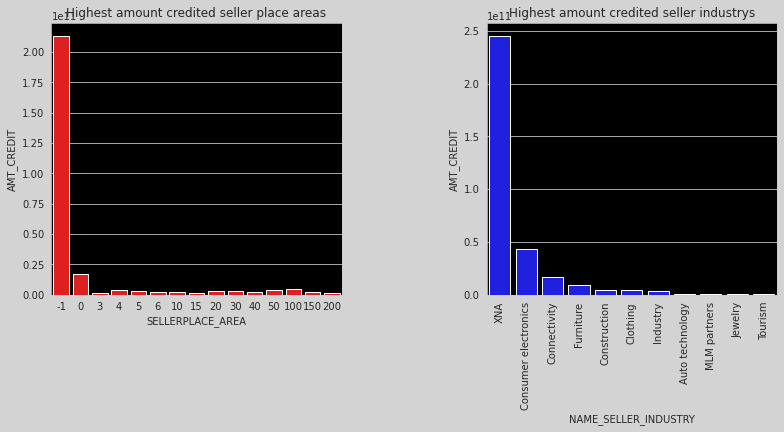

In [144]:
fig = plt.figure(figsize=(13,5))
plt.subplot(121)
are = previous_application.groupby("SELLERPLACE_AREA")["AMT_CREDIT"].sum().reset_index()
are = are.sort_values(by ="AMT_CREDIT",ascending = False)
ax = sns.barplot(y= "AMT_CREDIT",x ="SELLERPLACE_AREA",data=are[:15],color="r")
ax.set_facecolor("k")
ax.set_title("Highest amount credited seller place areas")

plt.subplot(122)
sell = previous_application.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT"].sum().reset_index().sort_values(by = "AMT_CREDIT",ascending = False)
ax1=sns.barplot(y = "AMT_CREDIT",x = "NAME_SELLER_INDUSTRY",data=sell,color="b")
ax1.set_facecolor("k")
ax1.set_title("Highest amount credited seller industrys")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace = .5)
fig.set_facecolor("lightgrey")


### Popular terms of previous credit at application.

CNT_PAYMENT - Term of previous credit at application of the previous application.



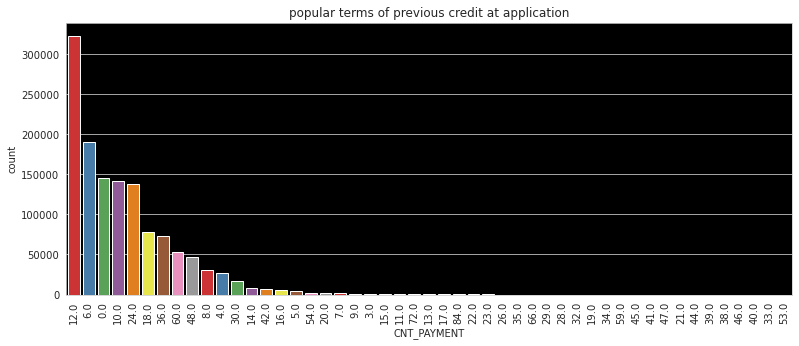

In [145]:
plt.figure(figsize=(13,5))
ax = sns.countplot(previous_application["CNT_PAYMENT"],palette="Set1",order=previous_application["CNT_PAYMENT"].value_counts().index)
ax.set_facecolor("k")
plt.xticks(rotation = 90)
plt.title("popular terms of previous credit at application")
plt.show()

### Point to infer from the graph

Popular term of previous credit are 6months ,10months ,1year ,2years & 3 years.

### Detailed product combination of the previous application

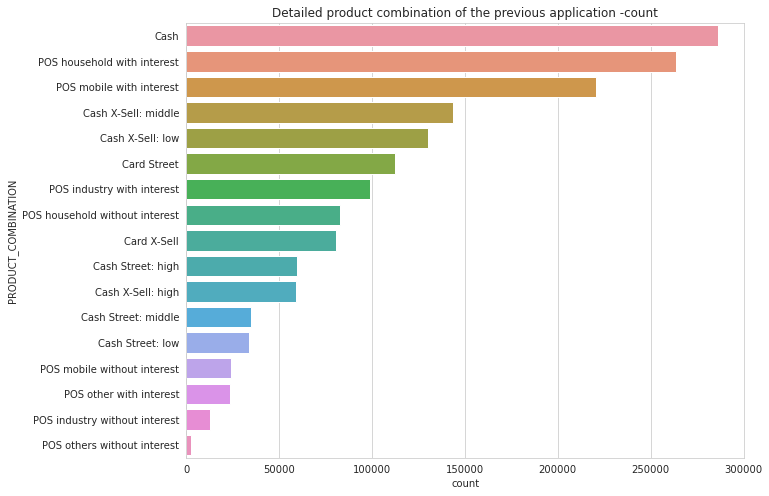

In [146]:
plt.figure(figsize=(10,8))
sns.countplot(y = previous_application["PRODUCT_COMBINATION"],order=previous_application["PRODUCT_COMBINATION"].value_counts().index)
plt.title("Detailed product combination of the previous application -count")
plt.show()


### Frequency distribution of intrest rates and client insurance requests

NAME_YIELD_GROUP - Grouped interest rate into small medium and high of the previous application.

NFLAG_INSURED_ON_APPROVAL - Did the client requested insurance during the previous application.

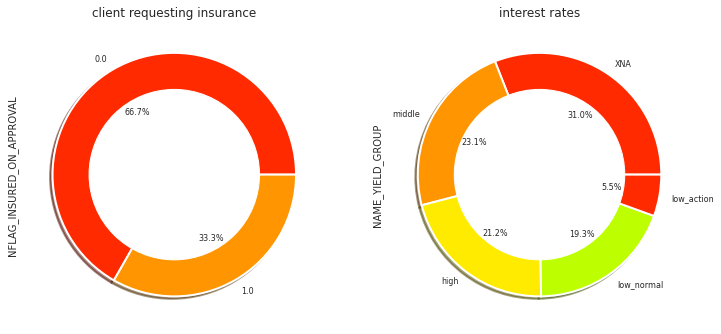

In [147]:
plt.figure(figsize=(12,6))
plt.subplot(121)
previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("client requesting insurance")

plt.subplot(122)
previous_application["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("interest rates")
plt.show()

### Days variables - Relative to application date of current application

DAYS_FIRST_DRAWING - Relative to application date of current application when was the first disbursement of the previous application.

DAYS_FIRST_DUE - Relative to application date of current application when was the first due supposed to be of the previous application.

DAYS_LAST_DUE_1ST_VERSION - Relative to application date of current application when was the first due of the previous application.

DAYS_LAST_DUE -Relative to application date of current application when was the last due date of the previous application.

DAYS_TERMINATION - Relative to application date of current application when was the expected termination of the previous application.

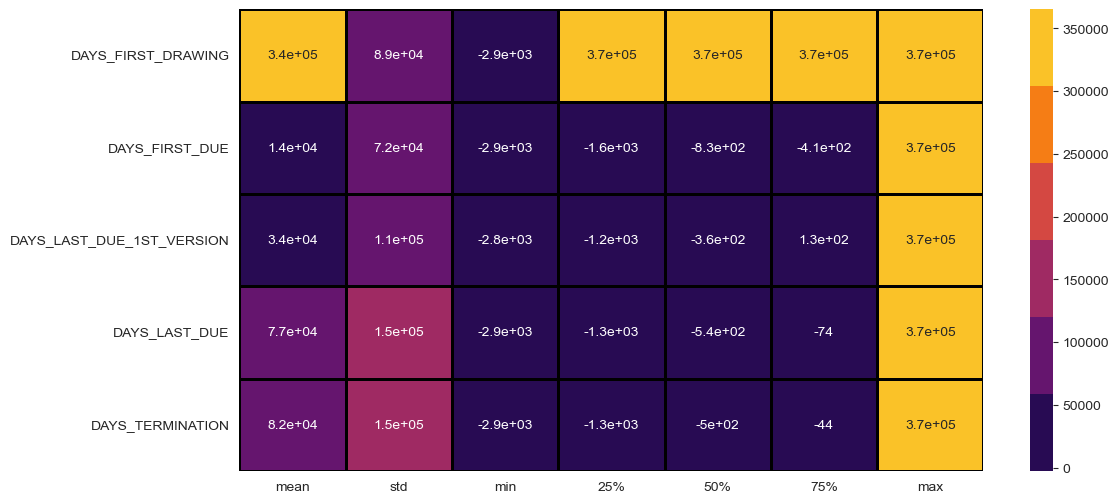

In [115]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(previous_application[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

In [169]:
application_data.to_csv("raw_application_data.csv")
previous_application.to_csv("raw_previous_data.csv")

# Corelation between variables


### Application Data

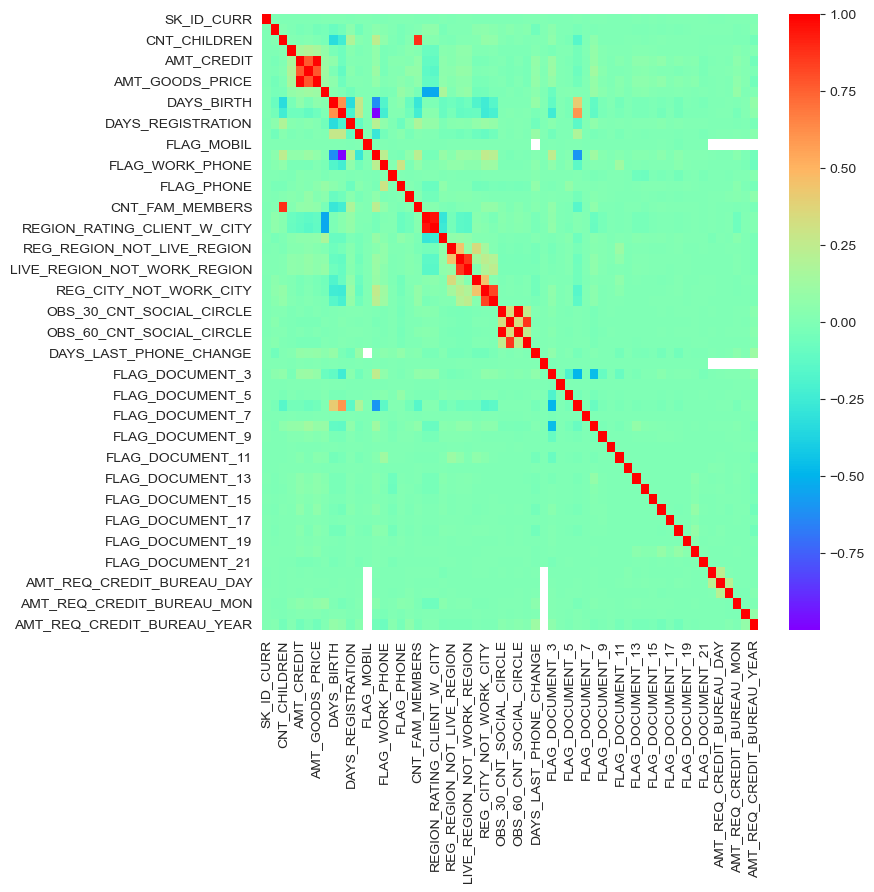

In [116]:
corrmat = application_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

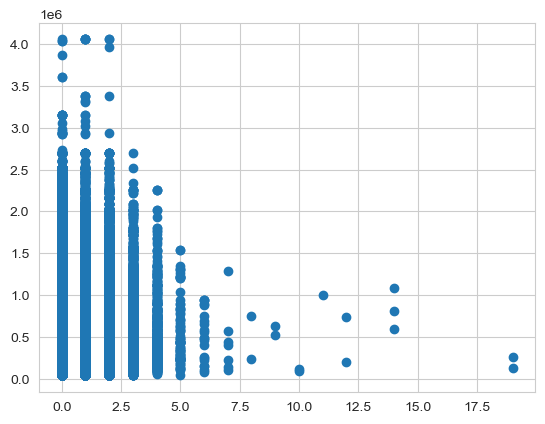

In [166]:
plt.scatter(application_data['CNT_CHILDREN'], application_data['AMT_CREDIT'])
plt.show()

In [167]:
np.corrcoef(application_data['CNT_CHILDREN'], application_data['AMT_CREDIT'])

array([[1.        , 0.00214544],
       [0.00214544, 1.        ]])

In [168]:
from scipy.stats import linregress
linregress(application_data['CNT_CHILDREN'], application_data['AMT_CREDIT'])

LinregressResult(slope=1195.8117076996377, intercept=598527.2843430347, rvalue=0.0021454434616763243, pvalue=0.23415498206670446, stderr=1005.1151333682853, intercept_stderr=838.1658402232187)


# Previous Application 

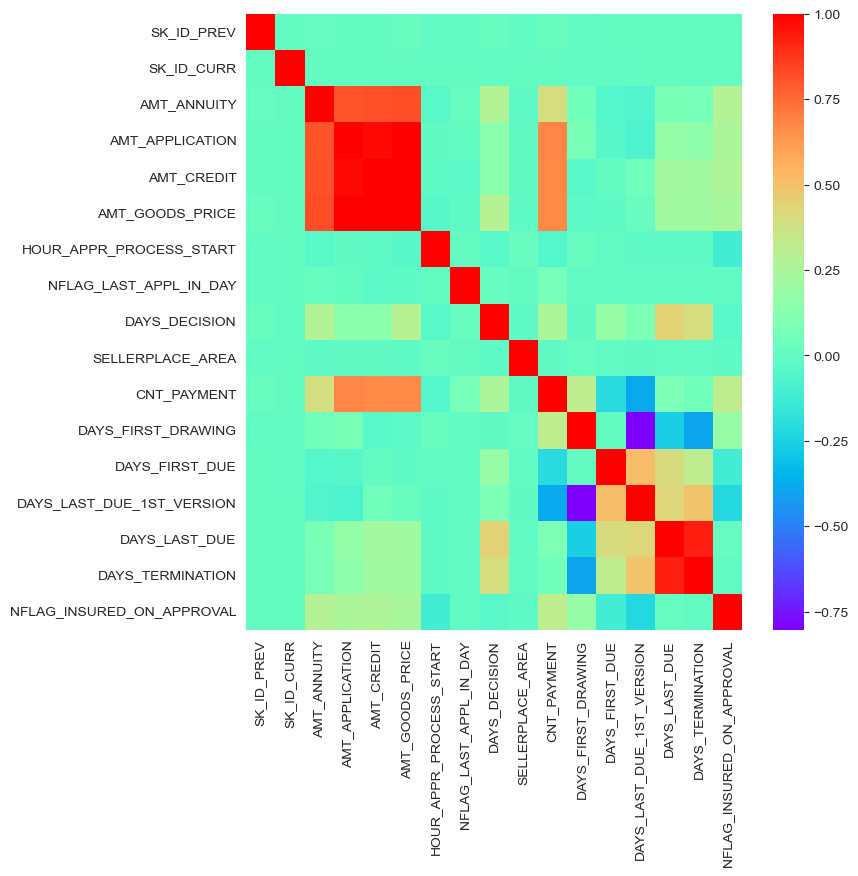

In [117]:
corrmat = previous_application.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [118]:
corrmat = previous_application.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                Var2  Correlation
88   AMT_GOODS_PRICE            AMT_APPLICATION     1.00       
89   AMT_GOODS_PRICE            AMT_CREDIT          0.99       
71   AMT_CREDIT                 AMT_APPLICATION     0.98       
269  DAYS_TERMINATION           DAYS_LAST_DUE       0.93       
87   AMT_GOODS_PRICE            AMT_ANNUITY         0.82       
70   AMT_CREDIT                 AMT_ANNUITY         0.82       
53   AMT_APPLICATION            AMT_ANNUITY         0.81       
232  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING  0.80       
173  CNT_PAYMENT                AMT_APPLICATION     0.68       
174  CNT_PAYMENT                AMT_CREDIT          0.67

# Application Data


## Top 10 Correlation Fields for Repayer

In [162]:
df_repayer = application_data[application_data['TARGET'] == 0]
df_defaulter = application_data[application_data['TARGET'] == 1]

In [164]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(50)

Var1                         Var2  Correlation
776   FLAG_EMP_PHONE               DAYS_EMPLOYED                1.00       
1798  OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     1.00       
358   AMT_GOODS_PRICE              AMT_CREDIT                   0.99       
1199  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT         0.95       
1064  CNT_FAM_MEMBERS              CNT_CHILDREN                 0.88       
1858  DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE     0.86       
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION   0.86       
1619  LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY       0.83       
359   AMT_GOODS_PRICE              AMT_ANNUITY                  0.78       
299   AMT_ANNUITY                  AMT_CREDIT                   0.77       
775   FLAG_EMP_PHONE               DAYS_BIRTH                   0.62       
539   DAYS_EMPLOYED                DAYS_BIRTH                   0.62       
2196  FLAG_DOCUMENT_6              FLAG_EMP_PHONE               0.60       
2192  FLAG_DOCUMENT_6              DAYS_EMPLOYED                0.60       
1187  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE   0.54       
1128  REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE   0.54       
2217  FLAG_DOCUMENT_6              FLAG_DOCUMENT_3              0.49       
2335  FLAG_DOCUMENT_8              FLAG_DOCUMENT_3              0.46       
1379  REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION   0.45       
1559  REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY       0.44       
298   AMT_ANNUITY                  AMT_INCOME_TOTAL             0.42       
2191  FLAG_DOCUMENT_6              DAYS_BIRTH                   0.41       
357   AMT_GOODS_PRICE              AMT_INCOME_TOTAL             0.35       
1497  REG_CITY_NOT_LIVE_CITY       REG_REGION_NOT_LIVE_REGION   0.34       
239   AMT_CREDIT                   AMT_INCOME_TOTAL             0.34       
474   DAYS_BIRTH                   CNT_CHILDREN                 0.34       
598   DAYS_REGISTRATION            DAYS_BIRTH                   0.33       
1799  OBS_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE     0.33       
1739  DEF_30_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.33       
958   FLAG_PHONE                   FLAG_WORK_PHONE              0.29       
1070  CNT_FAM_MEMBERS              DAYS_BIRTH                   0.29       
778   FLAG_EMP_PHONE               DAYS_ID_PUBLISH              0.28       
1258  HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT         0.28       
658   DAYS_ID_PUBLISH              DAYS_EMPLOYED                0.27       
657   DAYS_ID_PUBLISH              DAYS_BIRTH                   0.27       
1547  REG_CITY_NOT_WORK_CITY       FLAG_EMP_PHONE               0.26       
1259  HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY  0.26       
2015  FLAG_DOCUMENT_3              DAYS_EMPLOYED                0.25       
2019  FLAG_DOCUMENT_3              FLAG_EMP_PHONE               0.25       
1859  DEF_60_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.25       
1857  DEF_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.25       
1543  REG_CITY_NOT_WORK_CITY       DAYS_EMPLOYED                0.25       
1542  REG_CITY_NOT_WORK_CITY       DAYS_BIRTH                   0.24       
839   FLAG_WORK_PHONE              FLAG_EMP_PHONE               0.24       
835   FLAG_WORK_PHONE              DAYS_EMPLOYED                0.24       
1617  LIVE_CITY_NOT_WORK_CITY      LIVE_REGION_NOT_WORK_REGION  0.24       
1071  CNT_FAM_MEMBERS              DAYS_EMPLOYED                0.24       
769   FLAG_EMP_PHONE               CNT_CHILDREN                 0.24       
1075  CNT_FAM_MEMBERS              FLAG_EMP_PHONE               0.24       
533   DAYS_EMPLOYED                CNT_CHILDREN                 0.24

## Top 10 Correlation Fields for Defaulter

In [165]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(50)

Var1                         Var2  Correlation
1798  OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     1.00       
776   FLAG_EMP_PHONE               DAYS_EMPLOYED                1.00       
358   AMT_GOODS_PRICE              AMT_CREDIT                   0.98       
1199  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT         0.96       
1064  CNT_FAM_MEMBERS              CNT_CHILDREN                 0.89       
1858  DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE     0.87       
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION   0.85       
1619  LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY       0.78       
299   AMT_ANNUITY                  AMT_CREDIT                   0.75       
359   AMT_GOODS_PRICE              AMT_ANNUITY                  0.75       
2192  FLAG_DOCUMENT_6              DAYS_EMPLOYED                0.62       
2196  FLAG_DOCUMENT_6              FLAG_EMP_PHONE               0.62       
775   FLAG_EMP_PHONE               DAYS_BIRTH                   0.58       
539   DAYS_EMPLOYED                DAYS_BIRTH                   0.58       
2335  FLAG_DOCUMENT_8              FLAG_DOCUMENT_3              0.53       
1379  REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION   0.50       
2217  FLAG_DOCUMENT_6              FLAG_DOCUMENT_3              0.48       
1559  REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY       0.47       
1187  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE   0.45       
1128  REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE   0.44       
2191  FLAG_DOCUMENT_6              DAYS_BIRTH                   0.39       
1799  OBS_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE     0.34       
1739  DEF_30_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.33       
1497  REG_CITY_NOT_LIVE_CITY       REG_REGION_NOT_LIVE_REGION   0.32       
958   FLAG_PHONE                   FLAG_WORK_PHONE              0.31       
1258  HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT         0.29       
598   DAYS_REGISTRATION            DAYS_BIRTH                   0.29       
1259  HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY  0.28       
2019  FLAG_DOCUMENT_3              FLAG_EMP_PHONE               0.27       
2015  FLAG_DOCUMENT_3              DAYS_EMPLOYED                0.27       
474   DAYS_BIRTH                   CNT_CHILDREN                 0.26       
1859  DEF_60_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.26       
1857  DEF_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.26       
657   DAYS_ID_PUBLISH              DAYS_BIRTH                   0.25       
3239  AMT_REQ_CREDIT_BUREAU_DAY    AMT_REQ_CREDIT_BUREAU_HOUR   0.25       
1547  REG_CITY_NOT_WORK_CITY       FLAG_EMP_PHONE               0.24       
1543  REG_CITY_NOT_WORK_CITY       DAYS_EMPLOYED                0.24       
1617  LIVE_CITY_NOT_WORK_CITY      LIVE_REGION_NOT_WORK_REGION  0.24       
1557  REG_CITY_NOT_WORK_CITY       REG_REGION_NOT_WORK_REGION   0.24       
658   DAYS_ID_PUBLISH              DAYS_EMPLOYED                0.23       
778   FLAG_EMP_PHONE               DAYS_ID_PUBLISH              0.23       
2158  FLAG_DOCUMENT_5              FLAG_DOCUMENT_3              0.23       
1542  REG_CITY_NOT_WORK_CITY       DAYS_BIRTH                   0.22       
835   FLAG_WORK_PHONE              DAYS_EMPLOYED                0.21       
839   FLAG_WORK_PHONE              FLAG_EMP_PHONE               0.21       
1606  LIVE_CITY_NOT_WORK_CITY      FLAG_EMP_PHONE               0.20       
1070  CNT_FAM_MEMBERS              DAYS_BIRTH                   0.20       
1602  LIVE_CITY_NOT_WORK_CITY      DAYS_EMPLOYED                0.20       
1616  LIVE_CITY_NOT_WORK_CITY      REG_REGION_NOT_WORK_REGION   0.19       
777   FLAG_EMP_PHONE               DAYS_REGISTRATION            0.19

In [122]:
mergeddf =  pd.merge(application_data,previous_application,on='SK_ID_CURR')
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans           M           N             
1  100003      0       Cash loans           F           N             
2  100003      0       Cash loans           F           N             
3  100003      0       Cash loans           F           N             
4  100004      0       Revolving loans      M           Y             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0  Y               0             202500.0          406597.5       
1  N               0             270000.0          1293502.5      
2  N               0             270000.0          1293502.5      
3  N               0             270000.0          1293502.5      
4  Y               0             67500.0           135000.0       

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  24700.5        351000.0           Unaccompanied     Working           
1  35698.5        1129500.0          Family            State servant     
2  35698.5        1129500.0          Family            State servant     
3  35698.5        1129500.0          Family            State servant     
4  6750.0         135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                      

In [123]:
y = mergeddf.groupby('SK_ID_CURR').size()
dfA = mergeddf.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
dfA['count'] = y
display(dfA.head(10))

TARGET  count
SK_ID_CURR               
100002      1       1    
100003      0       3    
100004      0       1    
100006      0       9    
100007      0       6    
100008      0       5    
100009      0       7    
100010      0       1    
100011      0       4    
100012      0       4

In [124]:
dfA.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681      0       73   
173680      0       72   
242412      0       68   
206783      0       67   
389950      0       64   
382179      0       64   
198355      0       63   
345161      0       62   
446486      0       62   
238250      0       61

In [125]:
df_repayer = dfA[dfA['TARGET'] == 0]
df_defaulter = dfA[dfA['TARGET'] == 1]

### Repayers' Borrowing History 

In [126]:
df_repayer.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681      0       73   
173680      0       72   
242412      0       68   
206783      0       67   
382179      0       64   
389950      0       64   
198355      0       63   
446486      0       62   
345161      0       62   
280586      0       61

### Defaulters' Borrowing History 

In [127]:
df_defaulter.sort_values(by = 'count',ascending=False).head(10) 

TARGET  count
SK_ID_CURR               
100002      1       1    
333349      1       1    
333587      1       1    
333582      1       1    
333534      1       1    
333506      1       1    
333419      1       1    
333355      1       1    
333337      1       1    
334761      1       1

In [128]:
mergeddf.isnull().sum()

SK_ID_CURR                      0     
TARGET                          0     
NAME_CONTRACT_TYPE_x            0     
CODE_GENDER                     0     
FLAG_OWN_CAR                    0     
FLAG_OWN_REALTY                 0     
CNT_CHILDREN                    0     
AMT_INCOME_TOTAL                0     
AMT_CREDIT_x                    0     
AMT_ANNUITY_x                   93    
AMT_GOODS_PRICE_x               1208  
NAME_TYPE_SUITE_x               3526  
NAME_INCOME_TYPE                0     
NAME_EDUCATION_TYPE             0     
NAME_FAMILY_STATUS              0     
NAME_HOUSING_TYPE               0     
REGION_POPULATION_RELATIVE      0     
DAYS_BIRTH                      0     
DAYS_EMPLOYED                   0     
DAYS_REGISTRATION               0     
DAYS_ID_PUBLISH                 0     
FLAG_MOBIL                      0     
FLAG_EMP_PHONE                  0     
FLAG_WORK_PHONE                 0     
FLAG_CONT_MOBILE                0     
FLAG_PHONE               

In [129]:
round(100*(mergeddf.isnull().sum()/len(mergeddf.index)), 2)

SK_ID_CURR                      0.00 
TARGET                          0.00 
NAME_CONTRACT_TYPE_x            0.00 
CODE_GENDER                     0.00 
FLAG_OWN_CAR                    0.00 
FLAG_OWN_REALTY                 0.00 
CNT_CHILDREN                    0.00 
AMT_INCOME_TOTAL                0.00 
AMT_CREDIT_x                    0.00 
AMT_ANNUITY_x                   0.01 
AMT_GOODS_PRICE_x               0.09 
NAME_TYPE_SUITE_x               0.25 
NAME_INCOME_TYPE                0.00 
NAME_EDUCATION_TYPE             0.00 
NAME_FAMILY_STATUS              0.00 
NAME_HOUSING_TYPE               0.00 
REGION_POPULATION_RELATIVE      0.00 
DAYS_BIRTH                      0.00 
DAYS_EMPLOYED                   0.00 
DAYS_REGISTRATION               0.00 
DAYS_ID_PUBLISH                 0.00 
FLAG_MOBIL                      0.00 
FLAG_EMP_PHONE                  0.00 
FLAG_WORK_PHONE                 0.00 
FLAG_CONT_MOBILE                0.00 
FLAG_PHONE                      0.00 
FLAG_EMAIL  

In [130]:
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans           M           N             
1  100003      0       Cash loans           F           N             
2  100003      0       Cash loans           F           N             
3  100003      0       Cash loans           F           N             
4  100004      0       Revolving loans      M           Y             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0  Y               0             202500.0          406597.5       
1  N               0             270000.0          1293502.5      
2  N               0             270000.0          1293502.5      
3  N               0             270000.0          1293502.5      
4  Y               0             67500.0           135000.0       

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  24700.5        351000.0           Unaccompanied     Working           
1  35698.5        1129500.0          Family            State servant     
2  35698.5        1129500.0          Family            State servant     
3  35698.5        1129500.0          Family            State servant     
4  6750.0         135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                      

In [131]:
#dropping SK_ID_CURR since it all unique values

mergeddf.drop(['SK_ID_CURR'], 1, inplace = True) 


In [132]:
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  1       Cash loans           M           N            Y                
1  0       Cash loans           F           N            N                
2  0       Cash loans           F           N            N                
3  0       Cash loans           F           N            N                
4  0       Revolving loans      M           Y            Y                

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                            

   

Now we will take care of null values in each column one by one.

In [133]:
round(100*(mergeddf.isnull().sum()/len(mergeddf.index)), 2)

TARGET                          0.00 
NAME_CONTRACT_TYPE_x            0.00 
CODE_GENDER                     0.00 
FLAG_OWN_CAR                    0.00 
FLAG_OWN_REALTY                 0.00 
CNT_CHILDREN                    0.00 
AMT_INCOME_TOTAL                0.00 
AMT_CREDIT_x                    0.00 
AMT_ANNUITY_x                   0.01 
AMT_GOODS_PRICE_x               0.09 
NAME_TYPE_SUITE_x               0.25 
NAME_INCOME_TYPE                0.00 
NAME_EDUCATION_TYPE             0.00 
NAME_FAMILY_STATUS              0.00 
NAME_HOUSING_TYPE               0.00 
REGION_POPULATION_RELATIVE      0.00 
DAYS_BIRTH                      0.00 
DAYS_EMPLOYED                   0.00 
DAYS_REGISTRATION               0.00 
DAYS_ID_PUBLISH                 0.00 
FLAG_MOBIL                      0.00 
FLAG_EMP_PHONE                  0.00 
FLAG_WORK_PHONE                 0.00 
FLAG_CONT_MOBILE                0.00 
FLAG_PHONE                      0.00 
FLAG_EMAIL                      0.00 
CNT_FAM_MEMB

In [134]:
enq_cs =['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in enq_cs:
    mergeddf[i] = mergeddf[i].fillna(0)

In [135]:
amt_cs = ["AMT_ANNUITY_y","AMT_GOODS_PRICE_y"]
for i in amt_cs:
    mergeddf[i] = mergeddf[i].fillna(mergeddf[i].mean())
    

In [136]:
cols = ["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION",
        "DAYS_LAST_DUE","DAYS_TERMINATION",'CNT_PAYMENT']
for i in cols :
    mergeddf[i]  = mergeddf[i].fillna(mergeddf[i].median())

In [137]:
cols = ["NAME_TYPE_SUITE_y","NFLAG_INSURED_ON_APPROVAL"]
for i in cols :
    mergeddf[i]  = mergeddf[i].fillna(mergeddf[i].mode()[0])

In [138]:
# Rest missing values are under 1.5% so we can drop these rows.
mergeddf.dropna(inplace = True)

In [139]:
round(100*(mergeddf.isnull().sum()/len(mergeddf.index)), 2)

TARGET                          0.0
NAME_CONTRACT_TYPE_x            0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT_x                    0.0
AMT_ANNUITY_x                   0.0
AMT_GOODS_PRICE_x               0.0
NAME_TYPE_SUITE_x               0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                      0.0
CNT_FAM_MEMBERS                 0.0
REGION_RATING_CLIENT        

In [140]:
mergeddf.isnull().sum()

TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_P

In [141]:
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  1       Cash loans           M           N            Y                
1  0       Cash loans           F           N            N                
2  0       Cash loans           F           N            N                
3  0       Cash loans           F           N            N                
4  0       Revolving loans      M           Y            Y                

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                            

   

# Data Preparation

Converting some binary variables (Y/N) to 1/0

In [142]:
# List of variables to map

varlist =  ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_LAST_APPL_PER_CONTRACT']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
mergeddf[varlist] = mergeddf[varlist].apply(binary_map)
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0  1       Cash loans           M           0             1                 
1  0       Cash loans           F           0             0                 
2  0       Cash loans           F           0             0                 
3  0       Cash loans           F           0             0                 
4  0       Revolving loans      M           1             1                 

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                     

In [143]:
#dropping SK_ID_PREV since non required technical field 

mergeddf.drop(['SK_ID_PREV'], 1, inplace = True)
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0  1       Cash loans           M           0             1                 
1  0       Cash loans           F           0             0                 
2  0       Cash loans           F           0             0                 
3  0       Cash loans           F           0             0                 
4  0       Revolving loans      M           1             1                 

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                     

In [144]:
mergeddf[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
 'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
 'NFLAG_INSURED_ON_APPROVAL']]= mergeddf[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                                        'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                                        'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                                        'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                                        'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                                        'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                                        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                        'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                        'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                        'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                                        'NFLAG_INSURED_ON_APPROVAL']].astype('category')

In [145]:
obj_dtypes = [i for i in mergeddf.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in mergeddf.select_dtypes(include = np.number).columns if i not in [ 'TARGET']]

In [146]:
num_dtypes

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START_x',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'HOUR_APPR_PROCESS_START_y',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [147]:
obj_dtypes

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START_x',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'WEEKDAY_APPR_PROCESS_START_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE_y',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [148]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(mergeddf[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                                  'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                                  'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                                  'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                                  'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                                  'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                                  'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                                  'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                  'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                  'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                  'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                                  'NFLAG_INSURED_ON_APPROVAL','NAME_CONTRACT_TYPE_x','CODE_GENDER',
                                  'NAME_TYPE_SUITE_x','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                  'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_y',
                                  'WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                                  'CODE_REJECT_REASON','NAME_TYPE_SUITE_y','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                                  'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY',
                                  'NAME_YIELD_GROUP','PRODUCT_COMBINATION']], drop_first=True)
dummy1.head()

FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_EMP_PHONE_1  FLAG_WORK_PHONE_1  \
0  0               1                  1                 0                   
1  0               0                  1                 0                   
2  0               0                  1                 0                   
3  0               0                  1                 0                   
4  1               1                  1                 1                   

   FLAG_CONT_MOBILE_1  FLAG_PHONE_1  FLAG_EMAIL_1  REGION_RATING_CLIENT_2  \
0  1                   1             0             1                        
1  1                   1             0             0                        
2  1                   1             0             0                        
3  1                   1             0             0                        
4  1                   1             0             1                        

   REGION_RATING_CLIENT_3  REGION_RATING_CLIENT_W_CITY_2  \
0  0                       1                               
1  0                       0                               
2  0                       0                               
3  0                       0                               
4  0                       1                               

   REGION_RATING_CLIENT_W_CITY_3  REG_REGION_NOT_LIVE_REGION_1  \
0  0                              0                              
1  0                              0                              
2  0                              0                              
3  0                              0                              
4  0                              0                              

   REG_REGION_NOT_WORK_REGION_1  LIVE_REGION_NOT_WORK_REGION_1  \
0  0                             0                               
1  0                             0                               
2  0                             0                               
3  0                             0                               
4  0                             0                               

   REG_CITY_NOT_LIVE_CITY_1  REG_CITY_NOT_WORK_CITY_1  FLAG_DOCUMENT_2_1  \
0  0                         0                         0                   
1  0                         0                         0                   
2  0                         0                         0                   
3  0                         0                         0                   
4  0                         0                         0                   

   FLAG_DOCUMENT_3_1  FLAG_DOCUMENT_4_1  FLAG_DOCUMENT_5_1  FLAG_DOCUMENT_6_1  \
0  1                  0                  0                  0                   
1  1                  0                  0                  0                   
2  1                  0                  0                  0                   
3  1                  0                  0                  0                   
4  0                  0                  0                  0                   

   FLAG_DOCUMENT_7_1  FLAG_DOCUMENT_8_1  FLAG_DOCUMENT_9_1  \
0  0                  0                  0                   
1  0                  0                  0                   
2  0                  0                  0                   
3  0                  0                  0                   
4  0                  0                  0                   

   FLAG_DOCUMENT_10_1  FLAG_DOCUMENT_11_1  FLAG_DOCUMENT_12_1  \
0  0                   0                   0                    
1  0                   0                   0                    
2  0                   0                   0                    
3  0                   0                   0                    
4  0                   0                   0                    

   FLAG_DOCUMENT_13_1  FLAG_DOCUMENT_14_1  FLAG_DOCUMENT_15_1  \
0  0                   0                   0                    
1  0                   0                   0                    
2  0               

In [149]:
# Adding the results to the master dataframe
mergeddf = pd.concat([mergeddf, dummy1], axis=1)
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  1       Cash loans           M           0            1                
1  0       Cash loans           F           0            0                
2  0       Cash loans           F           0            0                
3  0       Cash loans           F           0            0                
4  0       Revolving loans      M           1            1                

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
0  2120             1          1              0               1                 
1  291              1          1              0               1                 
2  291              1          1              0               1                 
3  291              1          1              0               1                 
4  2531             1          1              1               1                 

  FLAG_PHONE FLAG_EMAIL  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0  1          0          1.0              2                     
1  1          0          2.0              1                     
2  1          0          2.0              1                     
3  1          0          2.0              1                     
4  1          0          1.0              2                     

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0  2                           WEDNESDAY                     
1  1                           MONDAY                        
2  1                           MONDAY                        
3  1                           MONDAY                        
4  2                           MONDAY                        

   HOUR_APPR_PROCESS_START_x REG_REGION_NOT_LIVE_REGION  \
0  10                         0                           
1  11                         0                           
2  11                         0                           
3  11                         0                           
4  9                          0                           

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0  0                          0                            
1  0                          0                            
2  0                          0                            
3  0            

In [150]:
mergeddf = mergeddf.drop(['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                          'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                          'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                          'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                          'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                          'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                          'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                          'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                          'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                          'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                          'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                          'NFLAG_INSURED_ON_APPROVAL','NAME_CONTRACT_TYPE_x','CODE_GENDER',
                          'NAME_TYPE_SUITE_x','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                          'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_y',
                          'WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                          'CODE_REJECT_REASON','NAME_TYPE_SUITE_y','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                          'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY',
                          'NAME_YIELD_GROUP','PRODUCT_COMBINATION'], axis = 1)
mergeddf.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  1       0             202500.0          406597.5      24700.5         
1  0       0             270000.0          1293502.5     35698.5         
2  0       0             270000.0          1293502.5     35698.5         
3  0       0             270000.0          1293502.5     35698.5         
4  0       0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  351000.0           0.018801                    9461       -637             
1  1129500.0          0.003541                    16765      -1188            
2  1129500.0          0.003541                    16765      -1188            
3  1129500.0          0.003541                    16765      -1188            
4  135000.0           0.010032                    19046      -225             

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0 -3648.0             2120             1.0               
1 -1186.0             291              2.0               
2 -1186.0             291              2.0               
3 -1186.0             291              2.0               
4 -4260.0             2531             1.0               

   HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
0  10                         0                         
1  11                         0                         
2  11                         0                         
3  11                         0                         
4  9                          0                         

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  2.0                       2.0                        
1  1.0                       0.0                        
2  1.0                       0.0                        
3  1.0                       0.0                        
4  0.0                       0.0                        

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0  2.0                       2.0                       1134.0                   
1  1.0                       0.0                       828.0                    
2  1.0                       0.0                       828.0                    
3  1.0                       0.0                       828.0                    
4  0.0                       0.0                       815.0                    

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0  0.0                         0.0                         
1  0.0                         0.0                         
2  0.0                         0.0                         
3  0.0                         0.0                         
4  0.0                         0.0                         

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0  0.0                         0.0                         
1  0.0                         0.0                         
2  0.0                         0.0                         
3  0.0                         0.0                         
4  0.0                         0.0                         

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  \
0  0.0                        1.0                         9251.775        
1  0.0                        0.0                         98356.995       
2  0.0                        0.0                         64567.665       
3  0.0                        0.0                         6737.310        
4  0.0                        0.0                         5357.250        

   AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  \
0  179055.0         179055.0      179055.0            
1  900000.0         1035882.0     900000.0            
2  337500.0         348637.5      337500.0            
3  68809.5          68053.5       68809.5             
4  24282.0          20106.0       24282.0             

   HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT

In [151]:
mergeddf.shape

(1406625, 292)

In [153]:
mergeddf.to_csv("full_clean_data.csv")

In [154]:
mergeddfs=mergeddf.sample(n = 7000) 

In [155]:
mergeddfs.to_csv("sample_clean_data.csv")

In [186]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = mergeddfs.drop(['TARGET'], axis=1)

In [187]:
X.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
601533  0             54000.0           119925.0      11812.5         
642952  0             113850.0          699808.5      27751.5         
968890  0             112500.0          852088.5      36229.5         
412105  1             67500.0           354276.0      22770.0         
890202  0             166500.0          157500.0      7875.0          

        AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
601533  112500.0           0.007305                    22969        
642952  625500.0           0.030755                    23078        
968890  688500.0           0.020713                    14196        
412105  292500.0           0.020246                    12403        
890202  157500.0           0.010032                    18791        

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
601533  365243        -3984.0             4560             2.0               
642952  365243         0.0                3414             1.0               
968890 -4448          -751.0              639              2.0               
412105 -463           -2900.0             3381             3.0               
890202 -4540          -7336.0             2336             2.0               

        HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
601533  11                         0                         
642952  15                         0                         
968890  7                          1                         
412105  8                          0                         
890202  8                          0                         

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
601533  0.0                       0.0                        
642952  2.0                       0.0                        
968890  0.0                       0.0                        
412105  0.0                       0.0                        
890202  0.0                       0.0                        

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
601533  0.0                       0.0                        
642952  2.0                       0.0                        
968890  0.0                       0.0                        
412105  0.0                       0.0                        
890202  0.0                       0.0                        

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
601533  0.0                     0.0                          
642952  1614.0                  0.0                          
968890  509.0                   0.0                          
412105  1212.0                  0.0                          
890202  381.0                   0.0                          

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
601533  0.0                        0.0                          
642952  0.0                        0.0                          
968890  0.0                        0.0                          
412105  0.0                        0.0                          
890202  0.0                        0.0                          

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
601533  0.0                        0.0                         
642952  0.0                        0.0                         
968890  0.0                        0.0                         
412105  0.0                        0.0                         
890202  0.0                        0.0                         

        AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
601533  1.0                         21220.380000   197662.5          
642952  0.0                         2526.705000    21730.5           
968890  4.0                         15837.184952   0.0               
412105  1.0                         7172.190000    63855.0           
890202  5.0                         5331.465000    25605.0           

        

In [188]:
X.shape

(7000, 291)

In [189]:
# Putting response variable to y
y = mergeddfs['TARGET']

In [190]:
y.head()

601533    0
642952    0
968890    0
412105    0
890202    0
Name: TARGET, dtype: int64

In [191]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=70)

In [192]:
X_train.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
453637   4             180000.0          808650.0      26217.0         
229448   1             202500.0          1006920.0     51543.0         
1398809  1             175500.0          233208.0      18553.5         
226981   0             112500.0          1078200.0     31653.0         
1224621  0             157500.0          942300.0      27679.5         

         AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
453637   675000.0           0.018850                    14579        
229448   900000.0           0.019689                    11341        
1398809  184500.0           0.025164                    12311        
226981   900000.0           0.026392                    14776        
1224621  675000.0           0.007274                    20833        

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
453637  -4262          -417.0              5143             6.0               
229448  -3823          -4332.0             3452             3.0               
1398809 -900           -4625.0             4634             3.0               
226981  -1629          -5851.0             2966             2.0               
1224621 -4728          -4657.0             4037             1.0               

         HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
453637   10                         0                         
229448   9                          1                         
1398809  10                         1                         
226981   9                          0                         
1224621  15                         0                         

         OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
453637   0.0                       0.0                        
229448   1.0                       0.0                        
1398809  1.0                       1.0                        
226981   0.0                       0.0                        
1224621  3.0                       0.0                        

         OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
453637   0.0                       0.0                        
229448   1.0                       0.0                        
1398809  1.0                       1.0                        
226981   0.0                       0.0                        
1224621  3.0                       0.0                        

         DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
453637   0.0                     0.0                          
229448   3.0                     0.0                          
1398809  507.0                   0.0                          
226981   1400.0                  0.0                          
1224621  1172.0                  0.0                          

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
453637   0.0                        0.0                          
229448   0.0                        0.0                          
1398809  0.0                        0.0                          
226981   0.0                        0.0                          
1224621  0.0                        0.0                          

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
453637   0.0                        0.0                         
229448   0.0                        0.0                         
1398809  0.0                        4.0                         
226981   0.0                        0.0                         
1224621  2.0                        0.0                         

         AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
453637   2.0                         6174.000000    62050.5           
229448   4.0                         11471.715000   61155.0           
1398809  3.0                         15837.184952   0.0               
226981   0.0                         5304.960000    53055.0           
1224621  0.0         

In [193]:
X_train.shape

(4900, 291)

In [194]:
X_test.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
1270177  1             270000.0          398016.0      42993.0         
238313   3             675000.0          1187370.0     115803.0        
1304717  1             112500.0          283419.0      16398.0         
962619   0             112500.0          808650.0      23643.0         
813907   1             112500.0          900000.0      46084.5         

         AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1270177  360000.0           0.003818                    14596        
238313   1125000.0          0.035792                    14137        
1304717  234000.0           0.018029                    11694        
962619   675000.0           0.020246                    19565        
813907   900000.0           0.028663                    12335        

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
1270177 -1146          -5258.0             3958             2.0               
238313  -1510          -8011.0             4706             5.0               
1304717 -4903          -5402.0             4143             3.0               
962619  -4464          -9331.0             3094             2.0               
813907  -3862          -1504.0             4918             3.0               

         HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
1270177  9                          0                         
238313   10                         1                         
1304717  11                         0                         
962619   8                          0                         
813907   8                          1                         

         OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1270177  0.0                       0.0                        
238313   0.0                       0.0                        
1304717  2.0                       1.0                        
962619   0.0                       0.0                        
813907   0.0                       0.0                        

         OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
1270177  0.0                       0.0                        
238313   0.0                       0.0                        
1304717  2.0                       1.0                        
962619   0.0                       0.0                        
813907   0.0                       0.0                        

         DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
1270177  397.0                   0.0                          
238313   1242.0                  0.0                          
1304717  1610.0                  0.0                          
962619   1674.0                  0.0                          
813907   1391.0                  0.0                          

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
1270177  0.0                        0.0                          
238313   0.0                        0.0                          
1304717  0.0                        0.0                          
962619   0.0                        0.0                          
813907   0.0                        0.0                          

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
1270177  0.0                        0.0                         
238313   0.0                        1.0                         
1304717  1.0                        0.0                         
962619   0.0                        0.0                         
813907   0.0                        0.0                         

         AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
1270177  0.0                         18177.210      179352.0          
238313   2.0                         218844.045     2250000.0         
1304717  1.0                         2361.735       26212.5           
962619   2.0                         10547.190      48060.0           
813907   3.0         

In [195]:
X_test.shape

(2100, 291)

In [196]:
y_train.head()

453637     0
229448     0
1398809    0
226981     0
1224621    0
Name: TARGET, dtype: int64

In [197]:
y_train.shape

(4900,)

In [198]:
y_test.head()

1270177    0
238313     0
1304717    0
962619     0
813907     0
Name: TARGET, dtype: int64

In [199]:
y_test.shape

(2100,)

# Feature Scaling

In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT',
         'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
         'DAYS_TERMINATION']] = scaler.fit_transform(X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING',
                                                               'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']])

X_train.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
453637   4.919473     -0.010494          0.564025     -0.061778        
229448   0.819912      0.002965          1.073195      1.717033        
1398809  0.819912     -0.013186         -0.913747     -0.600036        
226981  -0.546608     -0.050871          1.256246      0.320028        
1224621 -0.546608     -0.023953          0.907247      0.040943        

         AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
453637   0.407710          -0.140244                   -0.418683     
229448   1.036869          -0.079157                   -1.171837     
1398809 -0.963857           0.319480                   -0.946216     
226981   1.036869           0.408891                   -0.372861     
1224621  0.407710          -0.983096                    1.035989     

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
453637  -0.496301       1.319683           1.413133         4.222303          
229448  -0.493257       0.216059           0.289180         0.939332          
1398809 -0.472989       0.133464           1.074817         0.939332          
226981  -0.478044      -0.212141          -0.033849        -0.154992          
1224621 -0.499532       0.124443           0.678010        -1.249316          

         HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
453637  -0.611634                  -0.437760                  
229448  -0.924931                   2.284354                  
1398809 -0.611634                   2.284354                  
226981  -0.924931                  -0.437760                  
1224621  0.954855                  -0.437760                  

         OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
453637  -0.614851                 -0.323308                   
229448  -0.212612                 -0.323308                   
1398809 -0.212612                  1.777765                   
226981  -0.614851                 -0.323308                   
1224621  0.591866                 -0.323308                   

         OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
453637  -0.612547                 -0.281599                   
229448  -0.206996                 -0.281599                   
1398809 -0.206996                  2.287924                   
226981  -0.612547                 -0.281599                   
1224621  0.604105                 -0.281599                   

         DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
453637  -1.370423               -0.071611                     
229448  -1.366652               -0.071611                     
1398809 -0.733198               -0.071611                     
226981   0.389172               -0.071611                     
1224621  0.102609               -0.071611                     

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
453637  -0.070888                  -0.164927                     
229448  -0.070888                  -0.164927                     
1398809 -0.070888                  -0.164927                     
226981  -0.070888                  -0.164927                     
1224621 -0.070888                  -0.164927                     

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
453637  -0.293098                  -0.455519                    
229448  -0.293098                  -0.455519                    
1398809 -0.293098                   5.289766                    
226981  -0.293098                  -0.455519                    
1224621  1.918112                  -0.455519                    

         AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
453637  -0.219896                   -0.746939      -0.392230          
229448   0.675031                   -0.334936      -0.395227          
1398809  0.227567                    0.004567      -0.599888          
226981  -1.114823                   -0.814525      -0.422334          
1224621 -1.114823    

In [201]:
X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT',
         'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
         'DAYS_TERMINATION']] = scaler.transform(X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING',
                                                               'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']])

X_test.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
1270177  0.819912      0.043341         -0.490509      1.116511        
238313   3.552953      0.285602          1.536602      6.230434        
1304717  0.819912     -0.050871         -0.784802     -0.751431        
962619  -0.546608     -0.050871          0.564025     -0.242567        
813907   0.819912     -0.050871          0.798617      1.333647        

         AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1270177 -0.473113          -1.234728                   -0.414728     
238313   1.666029           1.093307                   -0.521491     
1304717 -0.825442          -0.200022                   -1.089730     
962619   0.407710          -0.038601                    0.741054     
813907   1.036869           0.574243                   -0.940634     

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
1270177 -0.474694      -0.044976           0.625501        -0.154992          
238313  -0.477219      -0.821037           1.122673         3.127979          
1304717 -0.500746      -0.085569           0.748465         0.939332          
962619  -0.497702      -1.193140           0.051229        -0.154992          
813907  -0.493528       1.013262           1.263582         0.939332          

         HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
1270177 -0.924931                  -0.437760                  
238313  -0.611634                   2.284354                  
1304717 -0.298336                  -0.437760                  
962619  -1.238229                  -0.437760                  
813907  -1.238229                   2.284354                  

         OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1270177 -0.614851                 -0.323308                   
238313  -0.614851                 -0.323308                   
1304717  0.189627                  1.777765                   
962619  -0.614851                 -0.323308                   
813907  -0.614851                 -0.323308                   

         OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
1270177 -0.612547                 -0.281599                   
238313  -0.612547                 -0.281599                   
1304717  0.198554                  2.287924                   
962619  -0.612547                 -0.281599                   
813907  -0.612547                 -0.281599                   

         DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
1270177 -0.871452               -0.071611                     
238313   0.190589               -0.071611                     
1304717  0.653111               -0.071611                     
962619   0.733549               -0.071611                     
813907   0.377860               -0.071611                     

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
1270177 -0.070888                  -0.164927                     
238313  -0.070888                  -0.164927                     
1304717 -0.070888                  -0.164927                     
962619  -0.070888                  -0.164927                     
813907  -0.070888                  -0.164927                     

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
1270177 -0.293098                  -0.455519                    
238313  -0.293098                   0.980802                    
1304717  0.812507                  -0.455519                    
962619  -0.293098                  -0.455519                    
813907  -0.293098                  -0.455519                    

         AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
1270177 -1.114823                    0.186551       0.000333          
238313  -0.219896                    15.792416      6.929984          
1304717 -0.667360                   -1.043419      -0.512165          
962619  -0.219896                   -0.406836      -0.439050          
813907   0.227567    

In [202]:
# Checking the Converted Rate
Target = round((sum(mergeddf['TARGET'])/len(mergeddf['TARGET'].index))*100,2)
print("We have almost {} %  Converted rate after successful data manipulation".format(Target))

We have almost 8.66 %  Converted rate after successful data manipulation


# Model Building

# Decision Tree

It is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it works for both categorical and continuous dependent variables. In this algorithm, we split the population into two or more homogeneous sets. This is done based on most significant attributes/ independent variables to make as distinct groups as possible.

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()

In [204]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [205]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [206]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  1.0


# VIF

In [207]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

Features  VIF
235  NAME_GOODS_CATEGORY_Insurance NaN 
246  NAME_GOODS_CATEGORY_Weapon    NaN 
248  NAME_PORTFOLIO_Cars           NaN 
254  CHANNEL_TYPE_Car dealer       NaN 
269  NAME_SELLER_INDUSTRY_Tourism  NaN

In [208]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['CNT_CHILDREN', 'NAME_GOODS_CATEGORY_Clothing and Accessories', 'CODE_REJECT_REASON_SYSTEM', 'CODE_REJECT_REASON_VERIF', 'CODE_REJECT_REASON_XAP', 'CODE_REJECT_REASON_XNA', 'NAME_GOODS_CATEGORY_Audio/Video', 'NAME_GOODS_CATEGORY_Auto Accessories', 'NAME_GOODS_CATEGORY_Computers', 'NAME_INCOME_TYPE_Pensioner', 'NAME_GOODS_CATEGORY_Construction Materials', 'NAME_GOODS_CATEGORY_Consumer Electronics', 'NAME_GOODS_CATEGORY_Direct Sales', 'NAME_GOODS_CATEGORY_Furniture', 'NAME_GOODS_CATEGORY_Gardening', 'NAME_GOODS_CATEGORY_Homewares', 'CODE_REJECT_REASON_SCOFR', 'CODE_REJECT_REASON_SCO', 'CODE_REJECT_REASON_LIMIT', 'CODE_REJECT_REASON_HC', 'NAME_CONTRACT_STATUS_Unused offer', 'NAME_CONTRACT_STATUS_Refused', 'NAME_CASH_LOAN_PURPOSE_XAP', 'NAME_CONTRACT_TYPE_y_Revolving loans', 'NAME_CONTRACT_TYPE_y_Consumer loans', 'ORGANIZATION_TYPE_XNA', 'NAME_FAMILY_STATUS_Widow', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Separated', 'NAME_EDUCATION_TYPE_Secondary / secondary special

In [209]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

AMT_INCOME_TOTAL  AMT_ANNUITY_x  REGION_POPULATION_RELATIVE  \
453637  -0.010494         -0.061778      -0.140244                     
229448   0.002965          1.717033      -0.079157                     
1398809 -0.013186         -0.600036       0.319480                     
226981  -0.050871          0.320028       0.408891                     
1224621 -0.023953          0.040943      -0.983096                     

         DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
453637  -0.418683    1.319683           1.413133          
229448  -1.171837    0.216059           0.289180          
1398809 -0.946216    0.133464           1.074817          
226981  -0.372861   -0.212141          -0.033849          
1224621  1.035989    0.124443           0.678010          

         HOUR_APPR_PROCESS_START_x  DEF_30_CNT_SOCIAL_CIRCLE  \
453637  -0.611634                  -0.323308                   
229448  -0.924931                  -0.323308                   
1398809 -0.611634                   1.777765                   
226981  -0.924931                  -0.323308                   
1224621  0.954855                  -0.323308                   

         DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
453637  -0.281599                 -1.370423                 
229448  -0.281599                 -1.366652                 
1398809  2.287924                 -0.733198                 
226981  -0.281599                  0.389172                 
1224621 -0.281599                  0.102609                 

         AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
453637  -0.071611                   -0.070888                    
229448  -0.071611                   -0.070888                    
1398809 -0.071611                   -0.070888                    
226981  -0.071611                   -0.070888                    
1224621 -0.071611                   -0.070888                    

         AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
453637  -0.164927                   -0.293098                    
229448  -0.164927                   -0.293098                    
1398809 -0.164927                   -0.293098                    
226981  -0.164927                   -0.293098                    
1224621 -0.164927                    1.918112                    

         AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
453637  -0.455519                  -0.219896                     
229448  -0.455519                   0.675031                     
1398809  5.289766                   0.227567                     
226981  -0.455519                  -1.114823                     
1224621 -0.455519                  -1.114823                     

         HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT  \
453637  -0.766593                   0.081077                      
229448  -0.766593                   0.081077                      
1398809 -1.675890                   0.081077                      
226981   0.445803                   0.081077                      
1224621  1.658199                   0.081077                      

         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA  \
453637   0.067157                0.072078      -0.092249           
229448   0.067157               -0.501837      -0.104374           
1398809  0.067157                0.819828      -0.138095           
226981   0.067157               -2.172453       0.078251           
1224621  0.067157               -0.840562       0.620063           

         DAYS_FIRST_DUE  FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_WORK_PHONE_1  \
453637  -0.153004        1               0                  0                   
229448  -0.161034        0               1                  0                   
1398809 -0.153380        0               1                  0                   
226981  -0.184158        0               0                  1                   
1224621 -0.153380        0               0                  0

In [210]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

AMT_INCOME_TOTAL  AMT_ANNUITY_x  REGION_POPULATION_RELATIVE  \
1270177  0.043341          1.116511      -1.234728                     
238313   0.285602          6.230434       1.093307                     
1304717 -0.050871         -0.751431      -0.200022                     
962619  -0.050871         -0.242567      -0.038601                     
813907  -0.050871          1.333647       0.574243                     

         DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1270177 -0.414728   -0.044976           0.625501          
238313  -0.521491   -0.821037           1.122673          
1304717 -1.089730   -0.085569           0.748465          
962619   0.741054   -1.193140           0.051229          
813907  -0.940634    1.013262           1.263582          

         HOUR_APPR_PROCESS_START_x  DEF_30_CNT_SOCIAL_CIRCLE  \
1270177 -0.924931                  -0.323308                   
238313  -0.611634                  -0.323308                   
1304717 -0.298336                   1.777765                   
962619  -1.238229                  -0.323308                   
813907  -1.238229                  -0.323308                   

         DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1270177 -0.281599                 -0.871452                 
238313  -0.281599                  0.190589                 
1304717  2.287924                  0.653111                 
962619  -0.281599                  0.733549                 
813907  -0.281599                  0.377860                 

         AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1270177 -0.071611                   -0.070888                    
238313  -0.071611                   -0.070888                    
1304717 -0.071611                   -0.070888                    
962619  -0.071611                   -0.070888                    
813907  -0.071611                   -0.070888                    

         AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1270177 -0.164927                   -0.293098                    
238313  -0.164927                   -0.293098                    
1304717 -0.164927                    0.812507                    
962619  -0.164927                   -0.293098                    
813907  -0.164927                   -0.293098                    

         AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
1270177 -0.455519                  -1.114823                     
238313   0.980802                  -0.219896                     
1304717 -0.455519                  -0.667360                     
962619  -0.455519                  -0.219896                     
813907  -0.455519                   0.227567                     

         HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT  \
1270177 -1.978989                   0.081077                      
238313   1.052001                   0.081077                      
1304717 -0.766593                   0.081077                      
962619  -1.675890                   0.081077                      
813907   0.445803                   0.081077                      

         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA  \
1270177  0.067157                0.631932      -0.130138           
238313   0.067157               -0.448152      -0.137716           
1304717  0.067157               -0.918532       0.528751           
962619   0.067157               -0.146496      -0.107405           
813907   0.067157                0.216515      -0.109299           

         DAYS_FIRST_DUE  FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_WORK_PHONE_1  \
1270177 -0.145171        0               1                  0                   
238313  -0.153380        1               1                  0                   
1304717 -0.166865        0               1                  0                   
962619  -0.156063        0               1                  1                   
813907  -0.150984        1               1                  1

In [211]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
25   FLAG_CONT_MOBILE_1                                           24.65
130  NAME_CLIENT_TYPE_Repeater                                    5.97 
7    DEF_30_CNT_SOCIAL_CIRCLE                                     4.32 
8    DEF_60_CNT_SOCIAL_CIRCLE                                     4.27 
23   FLAG_OWN_REALTY_1                                            4.08 
58   NAME_FAMILY_STATUS_Married                                   3.01 
17   FLAG_LAST_APPL_PER_CONTRACT                                  2.88 
18   NFLAG_LAST_APPL_IN_DAY                                       2.80 
57   NAME_INCOME_TYPE_Working                                     2.78 
96   WEEKDAY_APPR_PROCESS_START_y_MONDAY                          2.15 
124  NAME_PAYMENT_TYPE_XNA                                        2.13 
60   WEEKDAY_APPR_PROCESS_START_x_MONDAY                          2.10 
64   WEEKDAY_APPR_PROCESS_START_x_TUESDAY                         2.09 
99   WEEKDAY_APPR_PROCESS_START_y_THURSDAY                        2.09 
101  WEEKDAY_APPR_PROCESS_START_y_WEDNESDAY                       2.07 
65   WEEKDAY_APPR_PROCESS_START_x_WEDNESDAY                       2.06 
100  WEEKDAY_APPR_PROCESS_START_y_TUESDAY                         2.06 
63   WEEKDAY_APPR_PROCESS_START_x_THURSDAY                        2.04 
97   WEEKDAY_APPR_PROCESS_START_y_SATURDAY                        1.98 
22   FLAG_OWN_CAR_1                                               1.83 
48   CODE_GENDER_M                                                1.79 
98   WEEKDAY_APPR_PROCESS_START_y_SUNDAY                          1.73 
61   WEEKDAY_APPR_PROCESS_START_x_SATURDAY                        1.64 
26   FLAG_PHONE_1                                                 1.63 
129  NAME_CLIENT_TYPE_Refreshed                                   1.60 
3    DAYS_BIRTH                                                   1.59 
24   FLAG_WORK_PHONE_1                                            1.50 
47   NFLAG_INSURED_ON_APPROVAL_1.0                                1.47 
62   WEEKDAY_APPR_PROCESS_START_x_SUNDAY                          1.36 
19   DAYS_DECISION                                                1.34 
16   HOUR_APPR_PROCESS_START_y                                    1.27 
29   REG_CITY_NOT_LIVE_CITY_1                                     1.27 
55   NAME_INCOME_TYPE_State servant                               1.26 
6    HOUR_APPR_PROCESS_START_x                                    1.23 
28   REG_REGION_NOT_LIVE_REGION_1                                 1.18 
4    DAYS_REGISTRATION                                            1.18 
140  CHANNEL_TYPE_Contact center                                  1.14 
15   AMT_REQ_CREDIT_BUREAU_YEAR                                   1.14 
27   FLAG_EMAIL_1                                                 1.14 
9    DAYS_LAST_PHONE_CHANGE                                       1.13 
2    REGION_POPULATION_RELATIVE                                   1.13 
128  NAME_TYPE_SUITE_y_Spouse, partner                            1.11 
5    DAYS_ID_PUBLISH                                              1.11 
43   FLAG_DOCUMENT_18_1                                           1.10 
1    AMT_ANNUITY_x                                                1.09 
36   FLAG_DOCUMENT_11_1                                           1.08 
45   FLAG_DOCUMENT_20_1                                           1.07 
139  CHANNEL_TYPE_Channel of corporate sales                      1.07 
53   NAME_TYPE_SUITE_x_Spouse, partner                            1.07 
125  NAME_TYPE_SUITE_y_Group of people                            1.06 
94   ORGANIZATION_TYPE_Transport: type 3                          1.06 
90   ORGANIZATION_TYPE_Trade: type 4                              1.05 
21   DAYS_FIRST_DUE                                               1.05 
39   FLAG_DOCUMENT_14_1                                           1.05 
107  NAME_CASH_LOAN_PURPOSE_Buying a used car                     1.04 
14   AMT_REQ_CREDIT_BURE

The NaN, in if in  case, is interpretted as no correlation between the two variables.

In [212]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['FLAG_CONT_MOBILE_1', 'NAME_CLIENT_TYPE_Repeater']


In [213]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

AMT_INCOME_TOTAL  AMT_ANNUITY_x  REGION_POPULATION_RELATIVE  \
453637  -0.010494         -0.061778      -0.140244                     
229448   0.002965          1.717033      -0.079157                     
1398809 -0.013186         -0.600036       0.319480                     
226981  -0.050871          0.320028       0.408891                     
1224621 -0.023953          0.040943      -0.983096                     

         DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
453637  -0.418683    1.319683           1.413133          
229448  -1.171837    0.216059           0.289180          
1398809 -0.946216    0.133464           1.074817          
226981  -0.372861   -0.212141          -0.033849          
1224621  1.035989    0.124443           0.678010          

         HOUR_APPR_PROCESS_START_x  DEF_30_CNT_SOCIAL_CIRCLE  \
453637  -0.611634                  -0.323308                   
229448  -0.924931                  -0.323308                   
1398809 -0.611634                   1.777765                   
226981  -0.924931                  -0.323308                   
1224621  0.954855                  -0.323308                   

         DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
453637  -0.281599                 -1.370423                 
229448  -0.281599                 -1.366652                 
1398809  2.287924                 -0.733198                 
226981  -0.281599                  0.389172                 
1224621 -0.281599                  0.102609                 

         AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
453637  -0.071611                   -0.070888                    
229448  -0.071611                   -0.070888                    
1398809 -0.071611                   -0.070888                    
226981  -0.071611                   -0.070888                    
1224621 -0.071611                   -0.070888                    

         AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
453637  -0.164927                   -0.293098                    
229448  -0.164927                   -0.293098                    
1398809 -0.164927                   -0.293098                    
226981  -0.164927                   -0.293098                    
1224621 -0.164927                    1.918112                    

         AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
453637  -0.455519                  -0.219896                     
229448  -0.455519                   0.675031                     
1398809  5.289766                   0.227567                     
226981  -0.455519                  -1.114823                     
1224621 -0.455519                  -1.114823                     

         HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT  \
453637  -0.766593                   0.081077                      
229448  -0.766593                   0.081077                      
1398809 -1.675890                   0.081077                      
226981   0.445803                   0.081077                      
1224621  1.658199                   0.081077                      

         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA  \
453637   0.067157                0.072078      -0.092249           
229448   0.067157               -0.501837      -0.104374           
1398809  0.067157                0.819828      -0.138095           
226981   0.067157               -2.172453       0.078251           
1224621  0.067157               -0.840562       0.620063           

         DAYS_FIRST_DUE  FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_WORK_PHONE_1  \
453637  -0.153004        1               0                  0                   
229448  -0.161034        0               1                  0                   
1398809 -0.153380        0               1                  0                   
226981  -0.184158        0               0                  1                   
1224621 -0.153380        0               0                  0

In [214]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

AMT_INCOME_TOTAL  AMT_ANNUITY_x  REGION_POPULATION_RELATIVE  \
1270177  0.043341          1.116511      -1.234728                     
238313   0.285602          6.230434       1.093307                     
1304717 -0.050871         -0.751431      -0.200022                     
962619  -0.050871         -0.242567      -0.038601                     
813907  -0.050871          1.333647       0.574243                     

         DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1270177 -0.414728   -0.044976           0.625501          
238313  -0.521491   -0.821037           1.122673          
1304717 -1.089730   -0.085569           0.748465          
962619   0.741054   -1.193140           0.051229          
813907  -0.940634    1.013262           1.263582          

         HOUR_APPR_PROCESS_START_x  DEF_30_CNT_SOCIAL_CIRCLE  \
1270177 -0.924931                  -0.323308                   
238313  -0.611634                  -0.323308                   
1304717 -0.298336                   1.777765                   
962619  -1.238229                  -0.323308                   
813907  -1.238229                  -0.323308                   

         DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1270177 -0.281599                 -0.871452                 
238313  -0.281599                  0.190589                 
1304717  2.287924                  0.653111                 
962619  -0.281599                  0.733549                 
813907  -0.281599                  0.377860                 

         AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1270177 -0.071611                   -0.070888                    
238313  -0.071611                   -0.070888                    
1304717 -0.071611                   -0.070888                    
962619  -0.071611                   -0.070888                    
813907  -0.071611                   -0.070888                    

         AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1270177 -0.164927                   -0.293098                    
238313  -0.164927                   -0.293098                    
1304717 -0.164927                    0.812507                    
962619  -0.164927                   -0.293098                    
813907  -0.164927                   -0.293098                    

         AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
1270177 -0.455519                  -1.114823                     
238313   0.980802                  -0.219896                     
1304717 -0.455519                  -0.667360                     
962619  -0.455519                  -0.219896                     
813907  -0.455519                   0.227567                     

         HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT  \
1270177 -1.978989                   0.081077                      
238313   1.052001                   0.081077                      
1304717 -0.766593                   0.081077                      
962619  -1.675890                   0.081077                      
813907   0.445803                   0.081077                      

         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA  \
1270177  0.067157                0.631932      -0.130138           
238313   0.067157               -0.448152      -0.137716           
1304717  0.067157               -0.918532       0.528751           
962619   0.067157               -0.146496      -0.107405           
813907   0.067157                0.216515      -0.109299           

         DAYS_FIRST_DUE  FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_WORK_PHONE_1  \
1270177 -0.145171        0               1                  0                   
238313  -0.153380        1               1                  0                   
1304717 -0.166865        0               1                  0                   
962619  -0.156063        0               1                  1                   
813907  -0.150984        1               1                  1

In [215]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7    DEF_30_CNT_SOCIAL_CIRCLE                                     4.31
8    DEF_60_CNT_SOCIAL_CIRCLE                                     4.27
23   FLAG_OWN_REALTY_1                                            3.47
17   FLAG_LAST_APPL_PER_CONTRACT                                  2.88
57   NAME_FAMILY_STATUS_Married                                   2.83
18   NFLAG_LAST_APPL_IN_DAY                                       2.80
56   NAME_INCOME_TYPE_Working                                     2.64
123  NAME_PAYMENT_TYPE_XNA                                        2.00
22   FLAG_OWN_CAR_1                                               1.82
95   WEEKDAY_APPR_PROCESS_START_y_MONDAY                          1.82
63   WEEKDAY_APPR_PROCESS_START_x_TUESDAY                         1.81
59   WEEKDAY_APPR_PROCESS_START_x_MONDAY                          1.79
62   WEEKDAY_APPR_PROCESS_START_x_THURSDAY                        1.77
47   CODE_GENDER_M                                                1.76
99   WEEKDAY_APPR_PROCESS_START_y_TUESDAY                         1.76
100  WEEKDAY_APPR_PROCESS_START_y_WEDNESDAY                       1.76
64   WEEKDAY_APPR_PROCESS_START_x_WEDNESDAY                       1.75
98   WEEKDAY_APPR_PROCESS_START_y_THURSDAY                        1.74
96   WEEKDAY_APPR_PROCESS_START_y_SATURDAY                        1.68
25   FLAG_PHONE_1                                                 1.60
3    DAYS_BIRTH                                                   1.58
97   WEEKDAY_APPR_PROCESS_START_y_SUNDAY                          1.52
24   FLAG_WORK_PHONE_1                                            1.50
60   WEEKDAY_APPR_PROCESS_START_x_SATURDAY                        1.48
46   NFLAG_INSURED_ON_APPROVAL_1.0                                1.41
16   HOUR_APPR_PROCESS_START_y                                    1.27
61   WEEKDAY_APPR_PROCESS_START_x_SUNDAY                          1.27
28   REG_CITY_NOT_LIVE_CITY_1                                     1.26
54   NAME_INCOME_TYPE_State servant                               1.25
19   DAYS_DECISION                                                1.24
6    HOUR_APPR_PROCESS_START_x                                    1.23
4    DAYS_REGISTRATION                                            1.18
27   REG_REGION_NOT_LIVE_REGION_1                                 1.18
26   FLAG_EMAIL_1                                                 1.14
128  NAME_CLIENT_TYPE_Refreshed                                   1.13
2    REGION_POPULATION_RELATIVE                                   1.13
138  CHANNEL_TYPE_Contact center                                  1.13
15   AMT_REQ_CREDIT_BUREAU_YEAR                                   1.12
127  NAME_TYPE_SUITE_y_Spouse, partner                            1.11
5    DAYS_ID_PUBLISH                                              1.11
9    DAYS_LAST_PHONE_CHANGE                                       1.11
42   FLAG_DOCUMENT_18_1                                           1.10
1    AMT_ANNUITY_x                                                1.09
52   NAME_TYPE_SUITE_x_Spouse, partner                            1.07
44   FLAG_DOCUMENT_20_1                                           1.07
137  CHANNEL_TYPE_Channel of corporate sales                      1.07
35   FLAG_DOCUMENT_11_1                                           1.07
124  NAME_TYPE_SUITE_y_Group of people                            1.06
93   ORGANIZATION_TYPE_Transport: type 3                          1.05
21   DAYS_FIRST_DUE                                               1.05
38   FLAG_DOCUMENT_14_1                                           1.05
89   ORGANIZATION_TYPE_Trade: type 4                              1.05
73   ORGANIZATION_TYPE_Industry: type 13                          1.04
122  NAME_PAYMENT_TYPE_Non-cash from your account                 1.04
119  NAME_CASH_LOAN_PURPOSE_Urgent needs                          1.04
86   ORGANIZATION_TYPE_Security Ministries                        1.04
126  NAME

In [216]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [217]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [218]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  1.0


In [219]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[4472    0]
 [   0  428]]


In [220]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [221]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

1.0

In [222]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

1.0

In [223]:
# Calculate false postive rate - predicting Defaulted when customer does not have Defaulted
print(FP/ float(TN+FP))

0.0


In [224]:
# Positive predictive value 
print (TP / float(TP+FP))

1.0


In [225]:
# Negative predictive value
print(TN / float(TN+ FN))

1.0


# Plotting the ROC Curve

In [226]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

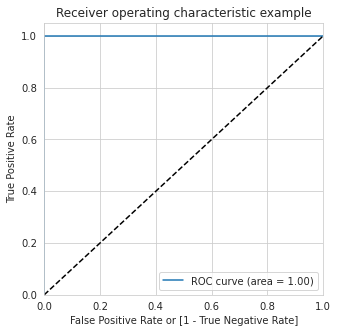

In [227]:
draw_roc(y_train,predict_train)

# Precision and Recall

In [228]:
#Using sklearn utilities for the same

In [229]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

1.0

In [230]:
recall_score(y_train,predict_train)  

1.0

# Making predictions on the test set

In [231]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [1 0 0 ... 0 0 0]


In [232]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[1683  236]
 [ 151   30]]


In [233]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [234]:
# Let's check the overall accuracy.
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.8157142857142857

In [235]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

0.16574585635359115

In [236]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

0.877019280875456

# Final Observation:

In [237]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :100.0 %
Train Data Sensitivity :100.0 %
Train Data Specificity :100.0 %
Test Data Accuracy     :81.57 %
Test Data Sensitivity  :16.57 %
Test Data Specificity  :87.7 %
